# ActBlue Pulse: Donation Dynamics - A Data Story

## Table of Contents
<a id='Table of contents'></a>

### <a href='#1. Data Understanding & Hygiene Phase'> 1. Data Understanding & Hygiene Phase </a>
* <a href='#1.1 Data Collection'> 1.1 Data Collection </a>
* <a href='#1.2 Dataset Overview and Preliminary Data Quality Check'> 1.2 Dataset Overview and Preliminary Data Quality Check </a>
* <a href='#1.3 Initial Variables Exploration'> 1.3 Initial Variables Exploration </a>
* <a href='#1.4 Data Cleaning'> 1.4 Data Cleaning </a>

### <a href='#2. Data Transformation and Integration'> 2. Data Transformation and Integration </a>
* <a href='#2.1 Joining Datasets'> 2.1 Joining Datasets </a>
* <a href='#2.2 Feature Engineering'> 2.2 Feature Engineering</a>
* <a href='#2.3 Separating Contribution Types by Purpose'> 2.3 Separating Contribution Types by Purpose </a>

### <a href='#3. Exploratory Data Analysis'> 3. Exploratory Data Analysis</a>
* <a href='#3.1 Time Series Analysis: Impact of Key Events on Donation Patterns'> 3.1 Time Series Analysis: Impact of Key Events on Donation Patterns </a>
* <a href='#3.2 Geographic Analysis: Contribution Patterns by State/Region'> 3.2 Geographic Analysis: Contribution Patterns by State/Region </a>

### <a href='#4. Data Story Development'> 4. Data Story Development</a>
* <a href='#4.1 Key Insights Summary'> 4.1 Key Insights Summary </a>
* <a href='#4.2 Question about earmarked_df Dataset'> 4.2 Question about earmarked_df Dataset</a>

### <a href='#5. Building the Dashboard'> 5. Building the Dashboard</a>
* <a href='#5.1 Key Metrics'> 5.1 Key Metrics </a>
* <a href='#5.2 Export dataset for dashboard visualization'> 5.2 Export dataset for dashboard visualization </a>

## 1. Data Understanding & Hygiene Phase
<a id='1. Data Understanding & Hygiene Phase'></a>

### 1.1. Data Collection
<a id='1.1. Data Collection'></a>

First, let's import the necessary libraries for our analysis:

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno  # For visualizing missing data
import re  # For regular expressions
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches
from wordcloud import WordCloud

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')  # Accessible color palette
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

Next, let's load our datasets and perform an initial inspection:

In [2]:
# Loading ActBlue’s FEC filings sample data (Feb-Apr 2020) from a cvs file
ab_fec_data = pd.read_csv('/content/actblue_data/Data_Analytics_Technical_FEC_Filing_Sample.csv')

# Load the FEC committee data for the 2020 cycle from a cvs file
committee_data = pd.read_csv('/content/actblue_data/Data Analytics_Technical_FEC_Committee_Data_2020.csv')

# Verify datasets loaded successfully by checking the first few rows
print("\nActBlue’s FEC Filing Sample - First 5 rows:")
display(ab_fec_data.head())

print("\nFEC Committee Data - First 5 rows:")
display(committee_data.head())


ActBlue’s FEC Filing Sample - First 5 rows:


,fec_report_id,date_report_received,form_type,filer_committee_id_number,transaction_id,entity_type,contributor_last_name,contributor_first_name,contributor_street_1,contributor_city,contributor_state,contributor_zip_code,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,memo_text_description
0,1385527,2020-02-21,SA11AI,C00401224,SA11AI_202581026,IND,CLICK,JANE,2720 N SWAN RD APT 12B,TUCSON,AZ,85712,2020-01-26,3.0,3.0,Earmark,SELF,MUSIC THERAPIST,Earmarked for MARK KELLY FOR SENATE (C00696526)
1,1391686,2020-03-21,SA11AI,C00401224,SA11AI_207544342,IND,KOONS,DAVE,5500 MILTON PLACE,AUSTELL,GA,30106,2020-02-10,27.0,1336.0,Earmark,TECHMAHINDRA,SOFTWARE DEVELOPER,Earmarked for BERNIE 2020 (C00696948)
2,1402724,2020-04-20,SA11AI,C00401224,SA11AI_222368496,IND,KREIMER,GINNY,9307-21ST AVE NW,SEATTLE,WA,98117,2020-03-25,7.0,7.0,Earmark,NOT EMPLOYED,NOT EMPLOYED,Earmarked for DEMOCRATIC NATIONAL COMMITTEE (C...
3,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203910298,IND,RILEY,KOMARR,738 HUNTLY COURT,SCHAUMBURG,IL,60194,2020-01-30,5.0,5.0,Earmark,CONQUEROR TRANS,TRUCK DRIVER,"Earmarked for WARREN FOR PRESIDENT, INC. (C006..."
4,1385527,2020-02-21,SA11AI,C00401224,SA11AI_203208239,IND,DAMARLA,PRIYA,3001 NORTH SPAULDING AVENUE APT 2,CHICAGO,IL,60618,2020-01-28,2.7,2.7,Earmark,SOFTWARE RESEARCHERS INC.,DATA SCIENTIST,Earmarked for BERNIE 2020 (C00696948)



FEC Committee Data - First 5 rows:


,bg_cycle,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id
0,2020,C00745828,JAWAD AGADIR FOR PRESIDENT,"CEO, CEO",3 JAWAD ROAD,NaN,JAWAD TOWN,IN,13337,U,U,NaN,Q,NaN,NONE,NaN
1,2020,C00755884,THE SAVIOR OF MEN,"SOLOMON, DEANDRE LAMONT SOLOMON",16728 BILTMORE,NaN,DETROIT,MI,48235,P,P,IND,Q,NaN,NONE,P00017111
2,2020,C00756072,PLEASE MAKE TURTLE ISLAND A COUNCIL OF SACRED ...,"GUMP, BRANDY MARIE MS.",58 OLD LEICESTER,NaN,ASHEVILLE,NC,28804,U,N,NaN,Q,NaN,NONE,NaN
3,2020,C00756346,FRIENDS OF BETSY PAULINE ELGAR COMMITTEE,BETSY PAULINE ELGAR,8914 VETERANS DRIVE SW STE A,NaN,LAKEWOOD,WA,98498,P,P,CON,Q,NaN,BETSY PAULINE ELGAR REAL ESTATES,P20003851
4,2020,C00751628,GEORGE WASHINGTON 2020,"LEE, DONNIE GRAY",3200 MT VERNON MEMORIAL HWY,NaN,MT VERNON,VA,22121,P,P,IND,Q,NaN,NONE,NaN


In [3]:
# Let's make a copy of each dataset to keep the original ones intact
actblue_fec_df = ab_fec_data.copy()

committee_df = committee_data.copy()

Let's take a look at the columns from each dataset and understand what information they contain:

In [4]:
# Data Dictionary for ActBlue's FEC Filing Sample
# Source to determine purpose of the columns: https://www.fec.gov/campaign-finance-data/committee-master-file-description/
filing_columns = {
    'fec_report_id': 'Unique identifier for the FEC report',
    'date_report_received': 'Date when the FEC received the report',
    'form_type': 'Type of FEC form submitted',
    'filer_committee_id_number': 'ID number of the committee that filed the report',
    'transaction_id': 'Unique identifier for the transaction',
    'entity_type': 'Type of entity making the contribution',
    'contributor_last_name': 'Last name of the contributor',
    'contributor_first_name': 'First name of the contributor',
    'contributor_street_1': 'Street address of the contributor',
    'contributor_city': 'City of the contributor',
    'contributor_state': 'State of the contributor',
    'contributor_zip_code': 'ZIP code of the contributor',
    'contribution_date': 'Date of the contribution',
    'contribution_amount': 'Amount of the contribution in USD',
    'contribution_aggregate': 'Aggregate amount contributed by this donor to this committee',
    'contribution_purpose_descrip': 'Purpose description of the contribution',
    'contributor_employer': 'Employer of the contributor',
    'contributor_occupation': 'Occupation of the contributor',
    'memo_text_description': 'Additional text description or memo'
}

# Data Dictionary for FEC Committee Data
committee_columns = {
    'bg_cycle': 'Election cycle (2020)',
    'cmte_id': 'Committee identification',
    'cmte_nm': 'Name of the committee',
    'tres_nm': 'Treasurer\'s name',
    'cmte_st1': 'Street address line 1',
    'cmte_st2': 'Street address line 2',
    'cmte_city': 'City of the committee',
    'cmte_st': 'State of the committee',
    'cmte_zip': 'ZIP code of the committee',
    'cmte_dsgn': 'Committee designation (U = Unauthorized, P = Principal Campaign Committee, etc.)',
    'cmte_tp': 'Committee type (P = Presidential, H = House, S = Senate, etc.)',
    'cmte_pty_affiliation': 'Party affiliation of the committee',
    'cmte_filing_freq': 'Committee filing frequency (Q = Quarterly Filer, M = Monthly Filer, T = Terminated, etc.)',
    'org_tp': 'Interest group category (C = Corporation, L = Labor organization, M = Membership organization, etc.)',
    'connected_org_nm': 'Name of connected organization',
    'cand_id': 'Candidate ID if associated with a candidate'
}

# Print to verify column descriptions match our datasets
print("Verifying columns in ActBlue's FEC Filing Dataset:")
for col in actblue_fec_df.columns:
    print(f"- {col}: {filing_columns.get(col, 'Description missing')}")

print("\nVerifying columns in FEC Committee Dataset:")
for col in committee_df.columns:
    print(f"- {col}: {committee_columns.get(col, 'Description missing')}")

Verifying columns in ActBlue's FEC Filing Dataset:
- fec_report_id: Unique identifier for the FEC report
- date_report_received: Date when the FEC received the report
- form_type: Type of FEC form submitted
- filer_committee_id_number: ID number of the committee that filed the report
- transaction_id: Unique identifier for the transaction
- entity_type: Type of entity making the contribution
- contributor_last_name: Last name of the contributor
- contributor_first_name: First name of the contributor
- contributor_street_1: Street address of the contributor
- contributor_city: City of the contributor
- contributor_state: State of the contributor
- contributor_zip_code: ZIP code of the contributor
- contribution_date: Date of the contribution
- contribution_amount: Amount of the contribution in USD
- contribution_aggregate: Aggregate amount contributed by this donor to this committee
- contribution_purpose_descrip: Purpose description of the contribution
- contributor_employer: Employer 

Let's check the dimensions of our datasets to check their size:


In [5]:
# Get dimensions of both datasets
filing_shape = actblue_fec_df.shape
committee_shape = committee_df.shape

print(f"ActBlue’s FEC Filings Sample dimensions: {filing_shape[0]} rows, {filing_shape[1]} columns")
print(f"FEC Committee Data dimensions: {committee_shape[0]} rows, {committee_shape[1]} columns")

ActBlue’s FEC Filings Sample dimensions: 400000 rows, 19 columns
FEC Committee Data dimensions: 18323 rows, 16 columns


### 1.2 Dataset Overview and Preliminary Data Quality Check
<a id='1.2 Dataset Overview and Preliminary Data Quality Check'></a>

Now, let's examine the structure and data types of each dataset:

In [6]:
# Display dataset information
print("ActBlue’s FEC Filing Sample Information:")
actblue_fec_df.info()

print("\nFEC Committee Data Information:")
committee_df.info()

ActBlue’s FEC Filing Sample Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fec_report_id                 400000 non-null  int64  
 1   date_report_received          400000 non-null  object 
 2   form_type                     400000 non-null  object 
 3   filer_committee_id_number     400000 non-null  object 
 4   transaction_id                400000 non-null  object 
 5   entity_type                   400000 non-null  object 
 6   contributor_last_name         399981 non-null  object 
 7   contributor_first_name        399996 non-null  object 
 8   contributor_street_1          400000 non-null  object 
 9   contributor_city              399999 non-null  object 
 10  contributor_state             400000 non-null  object 
 11  contributor_zip_code          400000 non-null  object 
 12  con

Based on the structure and data types, let's analyze which columns in both datasets need data type conversion:

**Columns That Need Type Conversion:**

**actblue_fec_df Dataset:**

* Date Columns (currently stored as objects):
 * `date_report_received`: Should be datetime for proper time-based analysis
 * `contribution_date`: Should be datetime for proper time-based analysis
* This column could be a good candidate for conversion to categorical type since it has a limited set of unique values. However, as I'm not concerned about memory efficiency and performance on such a small dataset, I'll skip this conversion:

 * `contributor_state`: State abbreviations (NY, CA, etc.)
 * Note: `form_type` and `entity_type` aren't good candidates for conversion because each contains only a single type.

**committee_df Dataset:**

* These columns could be good candidates for conversion to categorical type due to their limited set of unique values. Since memory efficiency and performance aren't priorities with this small dataset, I'll leave them as they are:

 * `cmte_dsgn`: Committee designation codes (U, P, B, D, A, J)
 * `cmte_tp`: Committee type codes (P, H, S, Q, N, Y, X, O, V, W, E, C, I, D)
 * `cmte_pty_affiliation`: Party affiliation (DEM, REP, etc.)
 * `cmte_filing_freq`: Filing frequency codes (Q, M, T, A)
 * `cmte_st`: State abbreviations (NY, CA, etc.)
 * `org_tp`: Organization type

In [7]:
# Convert Date Columns to datetime
# Check date formats before conversion
print("Sample date values before conversion:")
print(f"date_report_received sample: {actblue_fec_df['date_report_received'].head(3)}")
print(f"\ncontribution_date sample: {actblue_fec_df['contribution_date'].head(3)}")

# Convert date columns to datetime
actblue_fec_df['date_report_received'] = pd.to_datetime(actblue_fec_df['date_report_received'], errors='coerce')
actblue_fec_df['contribution_date'] = pd.to_datetime(actblue_fec_df['contribution_date'], errors='coerce')

# Verify conversion
print("\nDate columns after conversion:")
print(actblue_fec_df[['date_report_received', 'contribution_date']].dtypes)

Sample date values before conversion:
date_report_received sample: 0    2020-02-21
1    2020-03-21
2    2020-04-20
Name: date_report_received, dtype: object

contribution_date sample: 0    2020-01-26
1    2020-02-10
2    2020-03-25
Name: contribution_date, dtype: object

Date columns after conversion:
date_report_received    datetime64[ns]
contribution_date       datetime64[ns]
dtype: object


Considering the shape of the datasets, we can already see that some columns contain some missing data. Let's perform a quick check for missing values in both datasets:

In [8]:
# Check for missing values in the filing dataset
filing_missing = actblue_fec_df.isna().sum()
filing_missing_pct = (filing_missing / len(actblue_fec_df)) * 100

# Check for missing values in the committee dataset
committee_missing = committee_df.isna().sum()
committee_missing_pct = (committee_missing / len(committee_df)) * 100

# Display columns with missing values in filing dataset
print("Columns with missing values in ActBlue’s FEC Filing Sample:")
filing_missing_summary = pd.DataFrame({
    'Missing Count': filing_missing,
    'Missing Percentage': filing_missing_pct
})
display(filing_missing_summary[filing_missing_summary['Missing Count'] > 0])

# Display columns with missing values in committee dataset
print("\nColumns with missing values in FEC Committee Data:")
committee_missing_summary = pd.DataFrame({
    'Missing Count': committee_missing,
    'Missing Percentage': committee_missing_pct
})
display(committee_missing_summary[committee_missing_summary['Missing Count'] > 0])

Columns with missing values in ActBlue’s FEC Filing Sample:


,Missing Count,Missing Percentage
contributor_last_name,19,0.00475
contributor_first_name,4,0.00100
contributor_city,1,0.00025
contributor_employer,689,0.17225
contributor_occupation,159,0.03975



Columns with missing values in FEC Committee Data:


,Missing Count,Missing Percentage
cmte_nm,2,0.010915
tres_nm,731,3.989521
cmte_st1,11,0.060034
cmte_st2,13794,75.282432
cmte_city,10,0.054576
cmte_st,8,0.043661
cmte_zip,13,0.070949
cmte_dsgn,5,0.027288
cmte_tp,5,0.027288
cmte_pty_affiliation,10484,57.217705


**Observations:**

* Filing dataset has missing values in several columns, especially in contributor_employer (139 missing, ~0.17%).

* Committee dataset has significant missing values in key fields like cmte_st2 (13,794 missing, ~75%), cmte_pty_affiliation (10,484 missing, ~57%), org_tp (14,942 missing, ~81.5%), connected_org_nm (9017 missing, ~49%) and cand_id (11,543 missing, ~63%). It is too early in this stage to make decisions about how to handle this missing values, I will need to keep investigating.

Let's visualize the missing data patterns:

<Figure size 1200x600 with 0 Axes>

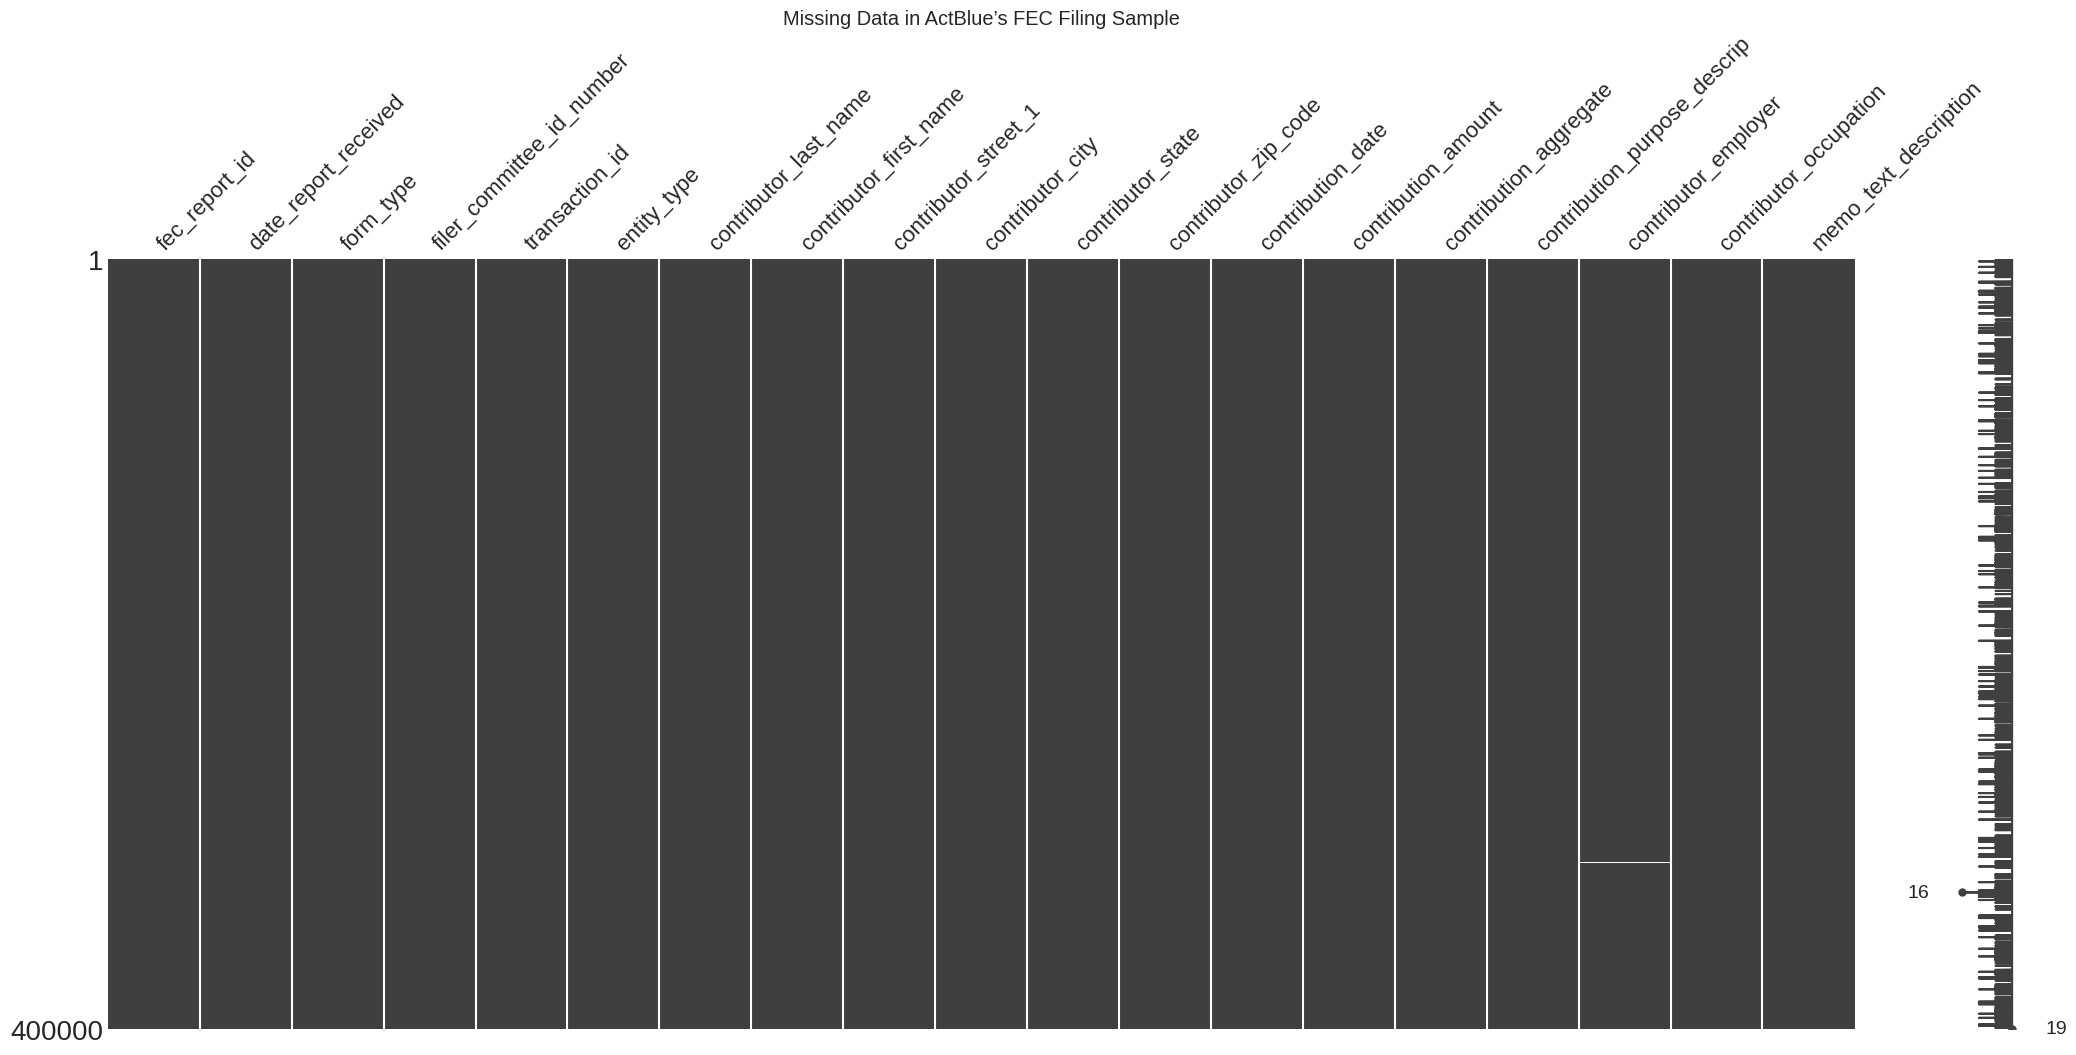

<Figure size 1200x600 with 0 Axes>

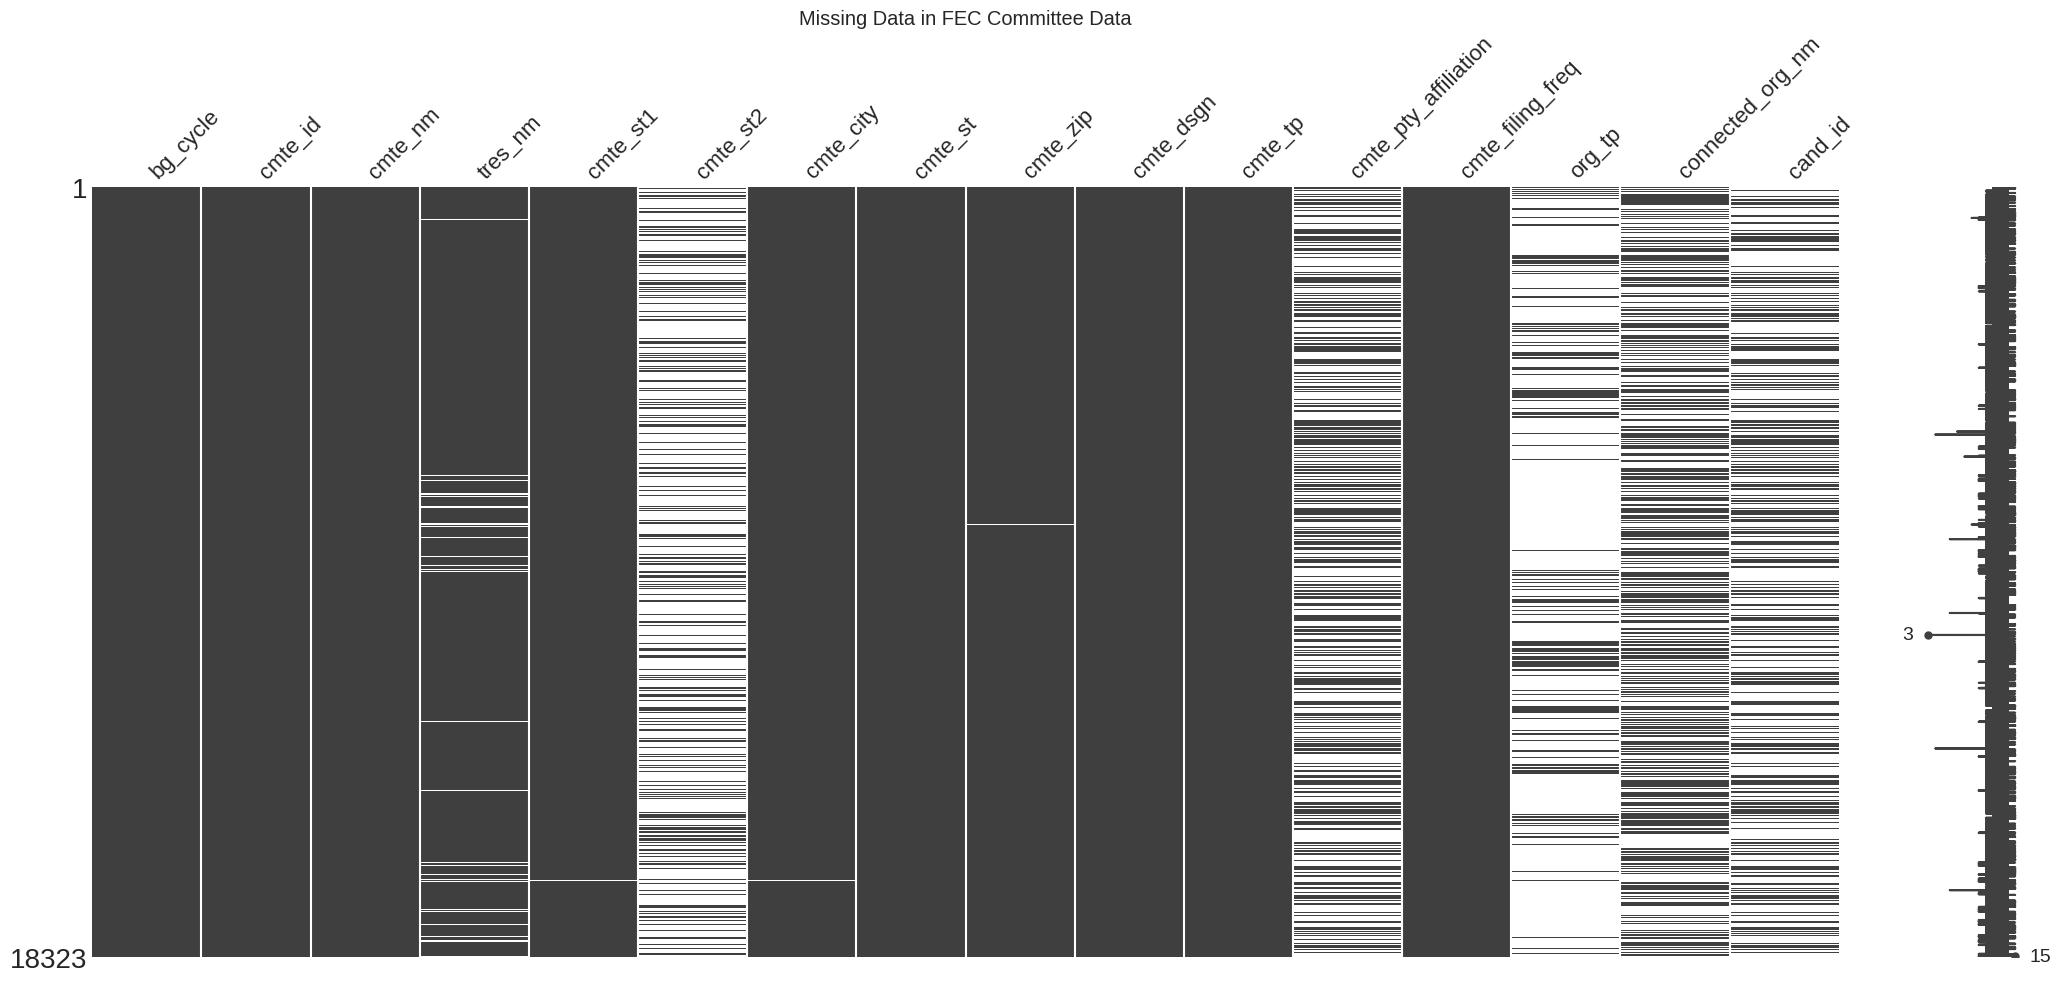

In [9]:
# Visualize missing data in ActBlue’s filing dataset
plt.figure(figsize=(12, 6))
msno.matrix(actblue_fec_df)
plt.title('Missing Data in ActBlue’s FEC Filing Sample')
plt.tight_layout()
plt.show()

# Visualize missing data in committee dataset
plt.figure(figsize=(12, 6))
msno.matrix(committee_df)
plt.title('Missing Data in FEC Committee Data')
plt.tight_layout()
plt.show()

Let's also check for duplicates in both datasets:


In [10]:
# Check for duplicate rows in ActBlue’s FEC filing dataset
filing_duplicates = actblue_fec_df.duplicated().sum()
print(f"Number of exact duplicate rows in FEC Filing Sample: {filing_duplicates}")

#Check for duplicate rows in FEC Committee dataset
committee_duplicates = committee_df.duplicated().sum()
print(f"Number of exact duplicate rows in Committee Data: {committee_duplicates}")

# Check for duplicate committee IDs in the FEC Committee dataset
committee_id_duplicates = committee_df['cmte_id'].duplicated().sum()
print(f"Number of duplicate Committee IDs: {committee_id_duplicates}")

Number of exact duplicate rows in FEC Filing Sample: 0
Number of exact duplicate rows in Committee Data: 0
Number of duplicate Committee IDs: 0


### 1.3 Initial Variables Exploration
<a id='1.3 Initial Variables Exploration'></a>

#### 1.3.1 actblue_fec_df Variables Exploration
<a id='1.3.1 actblue_fec_df Variables Exploration'></a>

Let's explore the columns from the datasets and verify their integrity:

**actblue_fec_df Dataset:**


*   `fec_report_id` - There are only 3 IDs in the FEC report (1385527, 1391686, 1402724), which aligns with the initial statement as reports cover only February to April.
*  `date_report_received` - Only 3 dates appear in this field, consistent with the February to April reporting period.
*   `form_type` - Only one form type exists, which corresponds to individual contributions.
*   `filer_committee_id_number` - A single ID appears here, belonging to ActBlue, which matches our findings from the previous query refactoring exercise.
*   `transaction_id` - I noticed that the transactions start with a 'SA11AI' prefix. I will validate that all entries follow this pattern for consistency.
*   `entity_type` - Contains only "IND" (individual) entries, aligning with the `form_type` logic.
*   `contributor_last_name`& `contributor_first_name`- I will examine names for unusual length or non-letter characters.
*   `contributor_street_1` - I will assess street addresses for unusual length, potentially incomplete entries or those lacking street numbers.
*   `contribution_date` - The date ranges are consistent with the reporting period (January to March).
*   `contribution_amount` & `contribution_aggregate` - I will inspect for zero or negative amount contributions.
*   `contribution_purpose_descrip` - It contains only two strings as expected: 'Earmark' and 'Contribution to Act Blue'.



1) Verify transaction_id format (check for SA11AI prefix)


In [11]:
# Check if all transaction_ids start with SA11AI (individual contributions)
transaction_id_check = actblue_fec_df['transaction_id'].str.startswith('SA11AI')
non_compliant_count = (~transaction_id_check).sum()

print(f"Transaction ID Format Check:")
print(f"- Total transactions: {len(actblue_fec_df)}")
print(f"- Transactions starting with SA11AI: {transaction_id_check.sum()}")
print(f"- Non-compliant transactions: {non_compliant_count} ({non_compliant_count/len(actblue_fec_df)*100:.2f}%)")

if non_compliant_count > 0:
    print("\nSample of non-compliant transaction IDs:")
    non_compliant_samples = actblue_fec_df[~transaction_id_check]['transaction_id'].head(10)
    print(non_compliant_samples.tolist())

    # Get the different prefixes
    prefixes = actblue_fec_df['transaction_id'].str.extract(r'^([A-Z0-9]+)_', expand=False)
    prefix_counts = prefixes.value_counts()
    print("\nTransaction ID prefix counts:")
    print(prefix_counts)

Transaction ID Format Check:
- Total transactions: 400000
- Transactions starting with SA11AI: 400000
- Non-compliant transactions: 0 (0.00%)


**Observations:**

All transactions look consistent

2) Check contributor names for unusual length or non-letter characters


In [12]:
# Function to check for unusual names
def improved_check_name_quality(name_series, is_last_name=False):
    # Check for empty or NA values
    empty_count = name_series.isna().sum()

    # Check for single-character names
    single_char_pattern = r'^[A-Za-z]$'  # Exactly one letter
    single_char_count = name_series.str.match(single_char_pattern, na=False).sum()

    # Patterns that are actually normal in names and should be excluded from "unusual" count
    normal_patterns = [
        r'^[A-Za-z]+\s[A-Za-z]\.(\s[A-Za-z]\.)?$',  # Names with middle initials: "Jane A." or "Jane A. B."
        r'^[A-Za-z]+\s[A-Za-z]\.$',                 # Names with one initial: "Jane A."
        r'^[A-Za-z]\.\s[A-Za-z]\.(\s[A-Za-z]\.)?$', # Multiple initials: "J. A." or "J. A. B."
        r'^[A-Za-z]\.\s[A-Za-z]+$',                 # Initial with name: "J. Smith"
        r'Jr\.|Sr\.|III|IV|V|II',                   # Suffixes
        r'Dr\.|Prof\.|Rev\.|Fr\.|Mr\.|Mrs\.|Ms\.',  # Titles
        r'[A-Za-z]+\-[A-Za-z]+',                    # Hyphenated names
        r'[A-Za-z]+\'[A-Za-z]+'                     # Names with apostrophes
    ]

    # Actually problematic patterns
    problematic_patterns = [
        r'[0-9]+',                                  # Contains digits
        r'[&+;#@%]',                                # Contains special characters
    ]

    # For last names, check for commas followed by suffixes (normal pattern)
    if is_last_name:
        normal_patterns.append(r'[A-Za-z]+,\s(Jr\.|Sr\.|III|IV|V|II)')

    # Identify names matching normal patterns
    normal_mask = name_series.str.match('|'.join(normal_patterns), na=False)

    # Identify problematic names
    problematic_mask = name_series.str.contains('|'.join(problematic_patterns), na=False)

    # Names with multiple words that aren't covered by normal patterns (could be a full name accidentally in one field)
    if is_last_name:
        multiple_names_pattern = r'^[A-Za-z]+\s[A-Za-z]+(\s[A-Za-z]+)?$'
        potential_full_name_mask = name_series.str.match(multiple_names_pattern, na=False) & ~normal_mask
    else:
        potential_full_name_mask = pd.Series(False, index=name_series.index)

    # Problematic names: those with problematic patterns and not matching normal patterns
    truly_problematic = problematic_mask

    # Get examples of each category for review
    problematic_examples = name_series[truly_problematic].unique()[:10]

    if is_last_name:
        potential_full_name_examples = name_series[potential_full_name_mask].unique()[:10]

    result = {
        'empty_count': empty_count,
        'single_char_count': single_char_count,
        'problematic_count': truly_problematic.sum(),
        'problematic_examples': problematic_examples.tolist() if len(problematic_examples) > 0 else []
    }

    if is_last_name:
        result['potential_full_name_count'] = potential_full_name_mask.sum()
        result['potential_full_name_examples'] = potential_full_name_examples.tolist() if len(potential_full_name_examples) > 0 else []

    return result

# Apply the function to first names
first_name_check = improved_check_name_quality(actblue_fec_df['contributor_first_name'])
print("First Name Quality Check:")
print(f"- Empty count: {first_name_check['empty_count']} ({first_name_check['empty_count']/len(actblue_fec_df)*100:.2f}%)")
print(f"- Single character count: {first_name_check['single_char_count']} ({first_name_check['single_char_count']/len(actblue_fec_df)*100:.2f}%)")
print(f"- Problematic count: {first_name_check['problematic_count']} ({first_name_check['problematic_count']/len(actblue_fec_df)*100:.2f}%)")

if first_name_check['problematic_examples']:
    print("\nSample problematic first names:")
    print(first_name_check['problematic_examples'])

# Apply the function to last names
last_name_check = improved_check_name_quality(actblue_fec_df['contributor_last_name'], is_last_name=True)
print("\nLast Name Quality Check:")
print(f"- Empty count: {last_name_check['empty_count']} ({last_name_check['empty_count']/len(actblue_fec_df)*100:.2f}%)")
print(f"- Single character count: {last_name_check['single_char_count']} ({last_name_check['single_char_count']/len(actblue_fec_df)*100:.2f}%)")
print(f"- Problematic count: {last_name_check['problematic_count']} ({last_name_check['problematic_count']/len(actblue_fec_df)*100:.2f}%)")

if last_name_check['problematic_examples']:
    print("\nSample problematic last names:")
    print(last_name_check['problematic_examples'])

if 'potential_full_name_examples' in last_name_check and last_name_check['potential_full_name_examples']:
    print(f"\n- Potential full names in last name field: {last_name_check['potential_full_name_count']} ({last_name_check['potential_full_name_count']/len(actblue_fec_df)*100:.2f}%)")
    print("Sample potential full names in last name field:")
    print(last_name_check['potential_full_name_examples'])

First Name Quality Check:
- Empty count: 4 (0.00%)
- Single character count: 952 (0.24%)
- Problematic count: 519 (0.13%)

Sample problematic first names:
['DAVID546540542383086', 'MIKE & CHRISTINA', 'ANN+MARIE', '13392 N 101ST WAY', 'ROBERT & LINDA', 'CHUCK & SANDY', '(ELIZABETH) BETSY &', 'ED & LINDA', 'JIM & GERRI', 'JUSTIN & MICHELLE']

Last Name Quality Check:
- Empty count: 19 (0.00%)
- Single character count: 1 (0.00%)
- Problematic count: 56 (0.01%)

Sample problematic last names:
['HEITKAMP;', 'NIX+TEMPLE', 'VAN+RIPER', 'CAM;PBELL', 'TRAMME;', 'DE+BANATE', 'WHITNEY & HERO', 'BLUM & PILGRIM', 'REY+NOLDS', 'DE+BIASI']

- Potential full names in last name field: 3996 (1.00%)
Sample potential full names in last name field:
['GALLEGOS SR', 'DE LEON', 'SCOW WILLIAMS', 'KIM PARKER', 'PHILLIPS PRINGLE', 'YANEZ BARRETO', 'GIGLIO DIGISON', 'DANIEL LANIE', 'SWISHER SPIERS', 'GHOSH SALTER']


**Observations:**

* Privacy and Data Sensitivity: The contributor name & last name fields contain personally identifiable information (PII) that requires careful handling for privacy reasons.

* Input Validation Issues: Multiple data quality problems exist in name fields, including special characters ('+', '&', ';'), numeric values (e.g., 'DAVID546540542383086'), and address information incorrectly entered as names (e.g., '13392 N 101ST WAY').

**Data Quality Decision:**

While identifying these issues is important, I've chosen not to clean these fields due to their private nature and lack of ground truth for verification.

**Recommendations:**

Future data collection systems should implement stronger input validation to prevent special characters and numerical values in name fields, provide separate fields for each name component, and include clear validation rules.

3) Check street addresses for unusual length, potentially incomplete or lacking street numbers


In [13]:
# Analyze street addresses for potential issues
street_length = actblue_fec_df['contributor_street_1'].str.len()
street_stats = street_length.describe()

print("Street Address Analysis:")
print(f"- Min length: {street_stats['min']}")
print(f"- Max length: {street_stats['max']}")
print(f"- Mean length: {street_stats['mean']:.2f}")
print(f"- Median length: {street_stats['50%']}")

# Flag potentially incomplete addresses
# Very short addresses (< 10 characters)
short_address_count = street_length.lt(10).sum()
print(f"- Potentially incomplete addresses (< 10 chars): {short_address_count} ({short_address_count/len(actblue_fec_df)*100:.2f}%)")

# Check for addresses missing typical components
# Addresses without numbers
no_numbers_pattern = r'^[^0-9]*$'
no_numbers_count = actblue_fec_df['contributor_street_1'].str.match(no_numbers_pattern, na=False).sum()
print(f"- Addresses without numbers: {no_numbers_count} ({no_numbers_count/len(actblue_fec_df)*100:.2f}%)")

# Check for PO Boxes
po_box_pattern = r'(?i)p\.?\s*o\.?\s*box|post\s+office\s+box'
po_box_count = actblue_fec_df['contributor_street_1'].str.contains(po_box_pattern, na=False).sum()
print(f"- PO Box addresses: {po_box_count} ({po_box_count/len(actblue_fec_df)*100:.2f}%)")

# Show some examples of potential issues
print("\nSample very short addresses:")
print(actblue_fec_df[street_length < 10]['contributor_street_1'].head(5).tolist())

print("\nSample addresses without numbers:")
print(actblue_fec_df[actblue_fec_df['contributor_street_1'].str.match(no_numbers_pattern, na=False)]['contributor_street_1'].head(5).tolist())

Street Address Analysis:
- Min length: 2.0
- Max length: 34.0
- Mean length: 18.06
- Median length: 17.0
- Potentially incomplete addresses (< 10 chars): 3302 (0.83%)
- Addresses without numbers: 24 (0.01%)
- PO Box addresses: 11364 (2.84%)

Sample very short addresses:
['BOX 2116', '390 12 ST', '31 TAYLOR', 'POBOX1215', '450 10TH']

Sample addresses without numbers:
['COND MIRAMAR ROYAL CALLE ROOSEVELT', 'GRACE LYNCH ONE MARINE PLAZA SUITE', 'BECKMAN CENTER FOR MOLECULAR GENET', 'DEPARTMENT SCHOOL OF ARCHITECTURE', 'PHILOSOPHY RELIGIOUS STUDIES CSUB']


**Observations:**

* Privacy and Data Sensitivity: The contributor street field contains personally identifiable information (PII) that requires careful handling for privacy reasons.

* Address Length Variations: The street addresses show significant variation in length, ranging from 2 to 34 characters with a mean of 18.07 characters.

* PO Box Usage: About 2.83% of contributors use PO Box addresses rather than physical street addresses, with some using compressed formats (e.g., 'POBOX1215').

**Data Quality Decision:**

I've chosen not to attempt cleaning or standardization of street addresses due to the variability in formats, lack of verification method, and the sensitive nature of this personal information. Geographic analysis can be effectively conducted using city and state data which are less personally identifying.

**Recommendations:**

Implement address validation through integration with mapping APIs (such as Google Maps API or similar) that can verify addresses in real-time during data entry, autocomplete partial addresses and ensure standardized formatting across all records.



4) Check for zero or negative amount contributions


In [14]:
# Check for zero or negative contribution amounts
zero_amount = actblue_fec_df['contribution_amount'].le(0).sum()
print(f"Zero or negative contribution_amount values: {zero_amount} ({zero_amount/len(actblue_fec_df)*100:.2f}%)")

# Check for zero or negative contribution aggregates
zero_aggregate = actblue_fec_df['contribution_aggregate'].le(0).sum()
print(f"Zero or negative contribution_aggregate values: {zero_aggregate} ({zero_aggregate/len(actblue_fec_df)*100:.2f}%)")

# If either column has zero/negative values, show samples
if zero_amount > 0:
    print("\nSample of zero or negative contribution amounts:")
    zero_amount_sample = actblue_fec_df[actblue_fec_df['contribution_amount'].le(0)].head(10)
    print(zero_amount_sample[['contribution_amount', 'contribution_aggregate']])

if zero_aggregate > 0:
    print("\nSample of zero or negative contribution aggregates:")
    zero_aggregate_sample = actblue_fec_df[actblue_fec_df['contribution_aggregate'].le(0)].head(10)
    print(zero_aggregate_sample[['contribution_amount', 'contribution_aggregate']])

# Check for inconsistencies where amount > aggregate (which shouldn't happen)
inconsistent = (actblue_fec_df['contribution_amount'] > actblue_fec_df['contribution_aggregate']).sum()
print(f"\nInconsistent contributions (amount > aggregate): {inconsistent} ({inconsistent/len(actblue_fec_df)*100:.2f}%)")

if inconsistent > 0:
    print("\nSample of inconsistent contributions:")
    inconsistent_sample = actblue_fec_df[actblue_fec_df['contribution_amount'] > actblue_fec_df['contribution_aggregate']].head(10)
    print(inconsistent_sample[['contribution_amount', 'contribution_aggregate']])

Zero or negative contribution_amount values: 0 (0.00%)
Zero or negative contribution_aggregate values: 0 (0.00%)

Inconsistent contributions (amount > aggregate): 0 (0.00%)


**Observations:**

There are no zero, negative or inconsistent contributions.

#### 1.3.2 committee_df Variables Exploration
<a id='1.3.2 committee_df Variables Exploration'></a>

Now it is time to observe the other dataset:

**committee_df Dataset:**

*   `bg_cycle` ↔ `election_cycle` - Contains only '2020', confirming this dataset tracks a single election cycle as expected.
*   `cmte_id` ↔ `committee_id` - I noticed that the IDs start with a letter 'C' followed by 8 digits. I will validate that all entries follow this pattern for consistency.
*   `cmte_st1` ↔ `committee_street_1` - I will assess street addresses for unusual length, potentially incomplete entries or those lacking street numbers.
*   `cmte_dsgn` ↔ `committee_designation`, `cmte_tp` ↔ `committee_type`, `cmte_filing_freq` ↔ `committee_filing_frequency` and `org_tp` ↔ `organization_type` - Validated the codes to ensure that they were consistent.
*   `connected_org_nm` ↔ `connected_organization_name` - I take a deeper look at the organization names.
*   `cand_id` ↔ `candidate_id` - This is a list of candidate IDs that by itself they are not very useful. If we could get the names of tha candidates by merging the data with another FEC dataset it would be a bit more helpful. 63% of the data is missing though.


1) Renaming the fields to make them more descriptive, like in the actblue_fec_df dataset

In [15]:
# Create a mapping of old column names to new, more descriptive names
committee_column_mapping = {
    'bg_cycle': 'election_cycle',
    'cmte_id': 'committee_id',
    'cmte_nm': 'committee_name',
    'tres_nm': 'treasurer_name',
    'cmte_st1': 'committee_street_1',
    'cmte_st2': 'committee_street_2',
    'cmte_city': 'committee_city',
    'cmte_st': 'committee_state',
    'cmte_zip': 'committee_zip_code',
    'cmte_dsgn': 'committee_designation',
    'cmte_tp': 'committee_type',
    'cmte_pty_affiliation': 'committee_party_affiliation',
    'cmte_filing_freq': 'committee_filing_frequency',
    'org_tp': 'organization_type',
    'connected_org_nm': 'connected_organization_name',
    'cand_id': 'candidate_id'
}

# Rename the columns directly in the dataframe
committee_df.rename(columns=committee_column_mapping, inplace=True)

# Verify the column names have been updated
print("Updated Committee Data columns:")
for i, col in enumerate(committee_df.columns):
    print(f"{i}: {col}")

# Additionally, show the shape of the dataframe to confirm no duplicates were created
print(f"\nCommittee dataframe shape: {committee_df.shape}")

Updated Committee Data columns:
0: election_cycle
1: committee_id
2: committee_name
3: treasurer_name
4: committee_street_1
5: committee_street_2
6: committee_city
7: committee_state
8: committee_zip_code
9: committee_designation
10: committee_type
11: committee_party_affiliation
12: committee_filing_frequency
13: organization_type
14: connected_organization_name
15: candidate_id

Committee dataframe shape: (18323, 16)


**Observations:**

The renaming process was performed correctly. This is a data cleaning step but I decided to include it in this section to be able to analyze the most descriptive columns from the start.

2) Check that the committee_id format is consistend in all IDs

In [16]:
# Define the correct pattern for committee_id
committee_id_pattern = r'^C\d{8}$'  # Starts with 'C' followed by exactly 8 digits

# Check if values match the pattern
valid_format_mask = committee_df['committee_id'].str.match(committee_id_pattern)
valid_count = valid_format_mask.sum()
invalid_count = len(committee_df) - valid_count

# Calculate percentages
valid_percent = (valid_count / len(committee_df)) * 100
invalid_percent = 100 - valid_percent

# Display results
print(f"Committee ID format validation results:")
print(f"- Valid format (C followed by 8 digits): {valid_count} ({valid_percent:.2f}%)")
print(f"- Invalid format: {invalid_count} ({invalid_percent:.2f}%)")

# If there are invalid IDs, examine them
if invalid_count > 0:
    # Get examples of invalid IDs
    invalid_ids = committee_df[~valid_format_mask]['committee_id']
    invalid_patterns = {}

    # Analyze patterns of invalid IDs
    for invalid_id in invalid_ids:
        # Check for common issues
        if not invalid_id.startswith('C'):
            pattern = "Doesn't start with 'C'"
        elif not invalid_id[1:].isdigit():
            pattern = "Contains non-digit characters after 'C'"
        elif len(invalid_id) != 9:
            pattern = f"Incorrect length ({len(invalid_id)} chars instead of 9)"
        else:
            pattern = "Other issue"

        invalid_patterns[pattern] = invalid_patterns.get(pattern, 0) + 1

    # Display invalid pattern distribution
    print("\nInvalid ID patterns:")
    for pattern, count in invalid_patterns.items():
        print(f"- {pattern}: {count} ({count/invalid_count*100:.2f}%)")

    # Show examples of invalid IDs
    print("\nSample of invalid committee IDs:")
    print(invalid_ids.head(10).tolist())

Committee ID format validation results:
- Valid format (C followed by 8 digits): 18323 (100.00%)
- Invalid format: 0 (0.00%)


**Observations:**

The Committee ID's format are consistent all throughout the `committee_id` column. A more thorough analysis could be conducted later on to ensure there is a match of the `committee_id` and the `committee_name` to ensure data accuracy.

3) Check street addresses for unusual length, potentially incomplete or lacking street numbers

In [17]:
# Analyze committee_street_1 for potential issues
street_length = committee_df['committee_street_1'].str.len()
street_stats = street_length.describe()

print("Street Address Analysis:")
print(f"- Min length: {street_stats['min']}")
print(f"- Max length: {street_stats['max']}")
print(f"- Mean length: {street_stats['mean']:.2f}")
print(f"- Median length: {street_stats['50%']}")

# Flag potentially incomplete addresses
# Very short addresses (< 10 characters)
short_address_count = street_length.lt(10).sum()
print(f"- Potentially incomplete addresses (< 10 chars): {short_address_count} ({short_address_count/len(committee_df)*100:.2f}%)")

# Check for addresses missing typical components
# Addresses without numbers
no_numbers_pattern = r'^[^0-9]*$'
no_numbers_count = committee_df['committee_street_1'].str.match(no_numbers_pattern, na=False).sum()
print(f"- Addresses without numbers: {no_numbers_count} ({no_numbers_count/len(committee_df)*100:.2f}%)")

# Check for PO Boxes
po_box_pattern = r'(?i)p\.?\s*o\.?\s*box|post\s+office\s+box'
po_box_count = committee_df['committee_street_1'].str.contains(po_box_pattern, na=False).sum()
print(f"- PO Box addresses: {po_box_count} ({po_box_count/len(committee_df)*100:.2f}%)")

# Show some examples of potential issues
print("\nSample very short addresses:")
print(committee_df[street_length < 10]['committee_street_1'].head(5).tolist())

print("\nSample addresses without numbers:")
print(committee_df[committee_df['committee_street_1'].str.match(no_numbers_pattern, na=False)]['committee_street_1'].head(5).tolist())

Street Address Analysis:
- Min length: 1.0
- Max length: 34.0
- Mean length: 17.93
- Median length: 17.0
- Potentially incomplete addresses (< 10 chars): 242 (1.32%)
- Addresses without numbers: 265 (1.45%)
- PO Box addresses: 4393 (23.98%)

Sample very short addresses:
['PO BOX 73', '1071', 'PO BOX 83', 'PO BOX 68', 'PO 8276']

Sample addresses without numbers:
['ONE GENERAL MILLS BOULEVARD', 'AUSTIN POWDER COMPANY', 'ONE O-I PLAZA', 'C/O WIPFLI, LLP', 'GATEWAY PLAZA']


**Observations:**

* Privacy and Data Sensitivity: The committee street field contains personally identifiable information (PII) that requires careful handling for privacy reasons.

* Address Length Variations: The street addresses show significant variation in length, ranging from 1 to 34 characters with a mean of 17.93 characters.

* PO Box Usage: About 24% of contributors use PO Box addresses rather than physical street addresses, which is notably higher than the 2.83% observed in the individual contributor dataset. This suggests organizations prefer PO Boxes for receiving official correspondence.

**Data Quality Decision:**

I've chosen not to attempt cleaning or standardization of committee street addresses due to the variability in formats, lack of verification method, and the sensitive nature of this organizational information. Geographic analysis can be effectively conducted using city and state data which are sufficient for location-based analysis while being less identifying than complete addresses.

4) Validation committee codes (committee_designation, committee_type,  committee_filing_frequency and organization_type)

In [18]:
def validate_committee_codes(df, column_name, valid_codes, description=None):
    """
    Validates that a column only contains expected code values or missing entries.

    Parameters:
    df (DataFrame): The dataframe containing the column
    column_name (str): Name of the column to validate
    valid_codes (set): Set of valid codes for the column
    description (dict, optional): Dictionary mapping codes to their descriptions

    Returns:
    dict: Validation results including counts and invalid values if any
    """
    # Get non-null values
    non_null_values = df[column_name].dropna()

    # Check which values are valid
    is_valid = non_null_values.isin(valid_codes)

    # Count results
    total_count = len(df)
    missing_count = df[column_name].isna().sum()
    valid_count = is_valid.sum()
    invalid_count = len(non_null_values) - valid_count

    # Calculate percentages
    missing_pct = missing_count / total_count * 100
    valid_pct = valid_count / total_count * 100
    invalid_pct = invalid_count / total_count * 100

    # Create results dictionary
    results = {
        'total_records': total_count,
        'missing_count': missing_count,
        'missing_percentage': missing_pct,
        'valid_count': valid_count,
        'valid_percentage': valid_pct,
        'invalid_count': invalid_count,
        'invalid_percentage': invalid_pct
    }

    # Get invalid values if any exist
    if invalid_count > 0:
        invalid_values = non_null_values[~is_valid].unique()
        results['invalid_values'] = invalid_values.tolist()

    # Print summary
    print(f"Validation results for {column_name}:")
    print(f"- Total records: {total_count}")
    print(f"- Missing values: {missing_count} ({missing_pct:.2f}%)")
    print(f"- Valid values: {valid_count} ({valid_pct:.2f}%)")
    print(f"- Invalid values: {invalid_count} ({invalid_pct:.2f}%)")

    if invalid_count > 0:
        print("\nInvalid values found:")
        for val in results['invalid_values']:
            print(f"  {val}")

    # Print valid code descriptions if provided
    if description and invalid_count == 0:
        print("\nValid codes and their descriptions:")
        for code in sorted(valid_codes):
            print(f"  {code}: {description.get(code, 'No description available')}")

    return results

# Define valid codes for each column
committee_designation_codes = {'U', 'P', 'B', 'D', 'A', 'J'}
committee_type_codes = {'P', 'H', 'S', 'Q', 'N', 'Y', 'X', 'O', 'V', 'W', 'E', 'C', 'I', 'D', 'U'}
committee_filing_freq_codes = {'Q', 'M', 'T', 'A', 'D', 'W'}
organization_type_codes = {'C', 'L', 'M', 'T', 'V', 'W'}

# Define code descriptions
designation_descriptions = {
    'U': 'Unauthorized',
    'P': 'Principal Campaign Committee',
    'B': 'Lobbyist/Registrant PAC',
    'D': 'Leadership PAC',
    'A': 'Authorized',
    'J': 'Joint Fundraising'
}

type_descriptions = {
    'P': 'Presidential',
    'H': 'House',
    'S': 'Senate',
    'Q': 'PAC-Qualified',
    'N': 'PAC-Non-Qualified',
    'Y': 'Party-Qualified',
    'X': 'Non-Qualified Party',
    'O': 'Super PAC',
    'V': 'Hybrid PAC (with Non-Contribution Account) - Nonqualified',
    'W': 'Hybrid PAC (with Non-Contribution Account) - Qualified',
    'E': 'Electioneering Communication',
    'C': 'Communication Cost',
    'I': 'Independent Expenditor',
    'D': 'Delegate Committee',
    'U': 'Single-candidate independent expenditure'
}

filing_freq_descriptions = {
    'Q': 'Quarterly Filer',
    'M': 'Monthly Filer',
    'T': 'Terminated',
    'A': 'Administratively Terminated',
    'D': 'Debt',
    'W': 'Waived'
}

organization_type_descriptions = {
    'C': 'Corporation',
    'L': 'Labor organization',
    'M': 'Membership organization',
    'T': 'Trade association',
    'V': 'Cooperative',
    'W': 'Corporation without capital stock'
}

In [19]:
# Validate each column
print("COMMITTEE DESIGNATION VALIDATION")
print("===============================")
designation_results = validate_committee_codes(
    committee_df,
    'committee_designation',
    committee_designation_codes,
    designation_descriptions
)

print("\nCOMMITTEE TYPE VALIDATION")
print("========================")
type_results = validate_committee_codes(
    committee_df,
    'committee_type',
    committee_type_codes,
    type_descriptions
)

print("\nCOMMITTEE FILING FREQUENCY VALIDATION")
print("====================================")
filing_freq_results = validate_committee_codes(
    committee_df,
    'committee_filing_frequency',
    committee_filing_freq_codes,
    filing_freq_descriptions
)

print("\nORGANIZATION TYPE VALIDATION")
print("===========================")
org_type_results = validate_committee_codes(
    committee_df,
    'organization_type',
    organization_type_codes,
    organization_type_descriptions
)

COMMITTEE DESIGNATION VALIDATION
Validation results for committee_designation:
- Total records: 18323
- Missing values: 5 (0.03%)
- Valid values: 18318 (99.97%)
- Invalid values: 0 (0.00%)

Valid codes and their descriptions:
  A: Authorized
  B: Lobbyist/Registrant PAC
  D: Leadership PAC
  J: Joint Fundraising
  P: Principal Campaign Committee
  U: Unauthorized

COMMITTEE TYPE VALIDATION
Validation results for committee_type:
- Total records: 18323
- Missing values: 5 (0.03%)
- Valid values: 18318 (99.97%)
- Invalid values: 0 (0.00%)

Valid codes and their descriptions:
  C: Communication Cost
  D: Delegate Committee
  E: Electioneering Communication
  H: House
  I: Independent Expenditor
  N: PAC-Non-Qualified
  O: Super PAC
  P: Presidential
  Q: PAC-Qualified
  S: Senate
  U: Single-candidate independent expenditure
  V: Hybrid PAC (with Non-Contribution Account) - Nonqualified
  W: Hybrid PAC (with Non-Contribution Account) - Qualified
  X: Non-Qualified Party
  Y: Party-Qualifie

**Observations:**

* Committee Designation Integrity: The committee_designation field shows excellent data integrity with 99.97% valid values and only 0.03% (5 records) missing values. All present values conform to the established FEC codes, with no invalid entries.

* Committee Type Consistency: Similarly, the committee_type field demonstrates high quality with 99.97% valid values and only 0.03% (5 records) missing. The valid values represent a diverse range of committee types from Presidential and House committees to Super PACs and Independent Expenditure committees.

* Filing Frequency Completeness: The committee_filing_frequency field has perfect completeness and validity with 100% valid values and no missing data. This suggests robust validation during data collection for this regulatory-critical field.

* Organization Type Data Gaps: As a big contrast to the other fields, the organization_type column shows significant data quality issues with 81.55% (14,942 records) missing values. Additionally, 0.03% (6 records) contain invalid codes ('I' and 'H') that don't correspond to recognized FEC organization types. This suggests either a data collection problem or that organization type information wasn't required for many committees.

**Data Quality Decision:**

I will maintain all committee code fields in their original form, including the organization_type despite its high percentage of missing values, as the present data remains valuable for segmentation analysis. The invalid codes ('I' and 'H') represent a very small portion of the dataset and won't significantly impact analysis results.

**Recommendations:**

For future data collection efforts, I recommend:

* Implementing stronger validation for the organization_type field during committee registration to reduce the high percentage of missing values
* Adding a cross-reference check against the FEC's official code tables to prevent invalid codes like 'I' and 'H' from entering the system
* Considering making organization_type a required field if it serves an important analytical or regulatory purpose

5) Taking a deeper look at the `connected_organization_name` field

In [20]:
# Analyze connected organizations
print("CONNECTED ORGANIZATION ANALYSIS")
print("==============================")

# First, look at the most common org names and the least ones to identify patterns
top_orgs = committee_df['connected_organization_name'].value_counts().head(20)
print("Top 20 connected organizations by frequency:")
print(top_orgs)

# Bottom 20 orgs by frequency
bottom_orgs = committee_df['connected_organization_name'].value_counts().tail(20)
print("\nBottom 20 connected organizations by frequency:")
print(bottom_orgs)

# Check for missing values
missing_count = committee_df['connected_organization_name'].isna().sum()
missing_percent = (missing_count / len(committee_df)) * 100
print(f"\nMissing organization names: {missing_count} ({missing_percent:.2f}%)")

# Count "NONE" entries (which are actually placeholders, not real organizations)
none_count = committee_df[committee_df['connected_organization_name'] == 'NONE'].shape[0]
none_percent = (none_count / len(committee_df)) * 100
print(f"Records with 'NONE' as organization name: {none_count} ({none_percent:.2f}%)")

# Calculate true missing (null + "NONE" entries combined)
true_missing = missing_count + none_count
true_missing_percent = (true_missing / len(committee_df)) * 100
print(f"Effectively missing organization data (NULL + 'NONE'): {true_missing} ({true_missing_percent:.2f}%)")

# Analyze organization name length distribution
org_name_length = committee_df['connected_organization_name'].dropna().str.len()
length_stats = org_name_length.describe()
print("\nOrganization name length statistics (excluding NULL values):")
print(f"- Min length: {length_stats['min']}")
print(f"- Max length: {length_stats['max']}")
print(f"- Mean length: {length_stats['mean']:.2f}")
print(f"- Median length: {length_stats['50%']}")

# Count common keywords to understand what types of organizations might be present
print("\nCommon keywords in organization names:")
keywords = ['DEMOCRATIC', 'REPUBLICAN', 'VICTORY', 'FUND', 'PAC', 'UNION',
            'ASSOCIATION', 'COMMITTEE', 'PARTY', 'CORP', 'INC', 'LLC']

for keyword in keywords:
    count = committee_df['connected_organization_name'].str.contains(keyword, case=False, na=False).sum()
    percent = (count / len(committee_df)) * 100
    print(f"- '{keyword}': {count} occurrences ({percent:.2f}%)")


CONNECTED ORGANIZATION ANALYSIS
Top 20 connected organizations by frequency:
connected_organization_name
NONE                                                                  5968
TAKE BACK THE HOUSE 2020                                                37
DOLLARS FOR DEMOCRATS                                                   17
CRUZ 20 FOR 20 VICTORY FUND                                             14
SERVE AMERICA VICTORY FUND                                              12
REPUBLICAN PARTY OF TEXAS                                               11
DEMOCRATIC PARTY OF VIRGINIA                                             9
TRUMP VICTORY                                                            9
REPUBLICANS INSPIRING SUCCESS & EMPOWERMENT PROJECT (RISE PROJECT)       7
REPUBLICAN PARTY OF VIRGINIA INC                                         7
DEMOCRATIC GRASSROOTS VICTORY FUND                                       7
CALIFORNIA REPUBLICAN PARTY                                           

**Observations:**

* Data Completeness Issues: The connected_organization_name field has significant data quality concerns with 49% missing values and an additional 32.6% containing the placeholder value "NONE," effectively leaving only about 18% of records with meaningful organization information.

* Varied Naming Patterns: The data exhibits highly inconsistent naming conventions ranging from detailed organizational names (e.g., "INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS") to extremely abbreviated forms (e.g., "SCOTT", "LEE") that provide minimal context.

* Political Structure Hints: Among the available data, recurring keywords like "VICTORY" (appears in multiple "Victory Fund" entries), "DEMOCRATIC," "REPUBLICAN," and "PAC" suggest the political fundraising structure, though with inconsistent formatting.

**Data Quality Decision:**

Given the high percentage of missing and placeholder values (approximately 81.6% of records), combined with the inconsistent naming conventions in the available data, I've chosen not to attempt any cleaning or categorization of this field. The data quality issues are too severe to make reliable assumptions about organizational categories without external reference data. This field's limitations make it unsuitable for detailed analysis beyond basic frequency observations.

**Recommendations:**

For future data collection, I recommend:

* Implementing required fields for organization information during committee registration

* Developing clear guidelines for when "NONE" is an appropriate entry versus when actual organizational information should be provided

### 1.4 Data Cleaning
<a id='1.4 Data Cleaning'></a>

#### 1.4.1 actblue_fec_df Data Cleaning
<a id='1.4.1 actblue_fec_df Data Cleaning'></a>

Let's explore the rest of the columns and perform data cleaning if needed:

**actblue_fec_df Dataset:**


*  `date_report_received` - From this date I will extract a column called `report_month` to facilitate grouping data by month.
*   `contributor_city` - I will analyze the most and least frequent cities to identify patterns for data cleaning.
*   `contributor_state` - I will confirm that all values in the contributor_state column are valid US state abbreviations (or US territories and military codes) and perform data categorization if needed.
*   `contributor_zip_code` - US zip codes exist in both 5-digit format and ZIP+4 (nine-digit) format. This dataset contains a mix of both. I'll standardize all entries to 5 digits for consistency.
*   `contribution_purpose_descrip` - I will rename to `contribution_purpose_description` for consistency with other columns. I will also check that contributions marked as 'Earmark' also have earmark details in the `memo_text_description` field.
*   `contributor_employer`& `contributor_occupation` - I will investigate the most and least common employers and occupations to identify patterns requiring data cleaning.
*   `memo_text_description` - This column contains information about the recipient committee name and its ID. I will extract this information and store it in `recipient_committee_name` and `recipient_committee_id`fields.


1) Extract `report_month` from `date_report_received`


In [21]:
# Create a mapping of month numbers to three-letter abbreviations
month_abbrev = {
    2: 'Feb',
    3: 'Mar',
    4: 'Apr'
}

# Extract month and map directly to abbreviations
actblue_fec_df['report_month'] = actblue_fec_df['date_report_received'].dt.month.map(month_abbrev)

# Check the results
month_counts = actblue_fec_df['report_month'].value_counts()
print("Month abbreviations distribution:")
print(month_counts)

# Show a few examples
print("\nExamples of date to month abbreviation conversion:")
examples = actblue_fec_df[['date_report_received', 'report_month']].head(5)
print(examples)

Month abbreviations distribution:
report_month
Mar    171147
Apr    122220
Feb    106633
Name: count, dtype: int64

Examples of date to month abbreviation conversion:
  date_report_received report_month
0           2020-02-21          Feb
1           2020-03-21          Mar
2           2020-04-20          Apr
3           2020-02-21          Feb
4           2020-02-21          Feb


**Observations:**

The field `report_month` was correctly added.

2) Standardize City Names

In [22]:
# First, let's look at the most common city names and the least ones to identify patterns
top_cities = actblue_fec_df['contributor_city'].value_counts().head(20)
print("Top 20 cities by frequency:")
print(top_cities)

# Bottom 20 cities by frequency
bottom_cities = actblue_fec_df['contributor_city'].value_counts().tail(20)
print("\nBottom 20 cities by frequency:")
print(bottom_cities)

# Create a standardization mapping for city names based on the bottom cities by frequency

city_standardization = {
    # Variations found in the data
    'NEW YORK CITY': 'NEW YORK',
    'NEW YORK CITY,': 'NEW YORK',
    'NEE YORK CITY': 'NEW YORK',
    'NY': 'NEW YORK',
    'CAMBRIDE': 'CAMBRIDGE',
    'SAINT AUL': 'SAINT PAUL',
    'HACKENSACK NJ': 'HACKENSACK',
    'CORAL GABLE': 'CORAL GABLES',
    'COMSTOCKPARK': 'COMSTOCK PARK',
    'OLD HICKKRY': 'OLD HICKORY',
    'COCONUT CREEK PLAC': 'COCONUT CREEK',
    'BEN LOMON': 'BEN LOMOND',
    'EVEN\'S VILLE': 'EVANSVILLE',
    'CHATTANOOGAQ': 'CHATTANOOGA',
    'GREAT FALLS`': 'GREAT FALLS',
    'HEB RON': 'HEBRON',
    'HOLDMEL': 'HOLMDEL',
    'YSLETA SUR': 'YSLETA',
    'NEW FAIFIELD': 'NEW FAIRFIELD',
    'STNMTN': 'STONE MOUNTAIN',
    'EMOND': 'EDMOND',
    'FREJUS, FRANCE': 'FREJUS'
}

# Function to standardize city names
def standardize_city(city):
    if pd.isna(city):
        return city

    # Convert to uppercase for consistency
    city = str(city).upper().strip()

    # Apply direct mappings
    if city in city_standardization:
        return city_standardization[city]

    # Remove state/country if separated by comma
    city_parts = city.split(',')
    if len(city_parts) > 1:
        city = city_parts[0].strip()

    return city

# Save the original city names for reference
original_cities = actblue_fec_df['contributor_city'].copy()

# Apply standardization directly to the original column
actblue_fec_df['contributor_city'] = actblue_fec_df['contributor_city'].apply(standardize_city)

# Check how many cities were changed
city_changes = sum(original_cities != actblue_fec_df['contributor_city'])
print(f"Number of standardized city names: {city_changes}")

if city_changes > 0:
    # Create a temporary comparison to show examples of changes
    changed_examples = pd.DataFrame({
        'original_city': original_cities,
        'standardized_city': actblue_fec_df['contributor_city']
    })
    changed_examples = changed_examples[changed_examples['original_city'] != changed_examples['standardized_city']]

    print("\nSample of city name standardizations:")
    print(changed_examples.head(10))

# Show updated city frequency after standardization
top_std_cities = actblue_fec_df['contributor_city'].value_counts().head(20)
print("\nTop 20 cities after standardization:")
print(top_std_cities)

# Clean up by removing the temporary reference variable
del original_cities

Top 20 cities by frequency:
contributor_city
NEW YORK         7616
LOS ANGELES      6355
BROOKLYN         6009
CHICAGO          5398
SEATTLE          5152
PORTLAND         4837
SAN FRANCISCO    4417
AUSTIN           3483
WASHINGTON       3182
SAN DIEGO        2734
DENVER           2594
PHILADELPHIA     2503
HOUSTON          2441
OAKLAND          2388
TUCSON           2010
MINNEAPOLIS      1931
ATLANTA          1776
PHOENIX          1694
SAN JOSE         1690
ARLINGTON        1640
Name: count, dtype: int64

Bottom 20 cities by frequency:
contributor_city
HOLDMEL               1
OLD HICKKRY           1
SAINT AUL             1
COCONUT CREEK PLAC    1
PENLAND               1
BUDAPEST              1
WILD ROSE             1
EMOND                 1
WOODGATE              1
BEN LOMON             1
FREJUS, FRANCE        1
CHEBOYGAN             1
EVEN'S VILLE          1
LA PLACE              1
BARRY                 1
CHATTANOOGAQ          1
LADORA                1
COOSADA               1
OAK BROO

**Observations:**

* Frequency Distribution: The data shows expected patterns with major metropolitan areas dominating (New York, Los Angeles, Brooklyn, Chicago), which aligns with population centers and typically Democratic-leaning cities.

* Data Inconsistencies: Several types of city name inconsistencies were identified and cleaned:

  - Format variations (e.g., "NEW YORK CITY" vs "NEW YORK")
  - City-state combinations in single field (e.g., "KILLINGTON VT.")
  - Trailing commas (e.g., "LARGO,")
  - Abbreviations (e.g., "NY" for "NEW YORK")
  - Typos (e.g., "WASHIBGTON")


* Special Character Issues: Some cities contained special characters (e.g., "FORT+COLLINS", "MAY'S LICK") that require standardization.

* Impact of Cleaning: The standardization process affected 1,052 records (0.31% of the dataset), primarily consolidating variant spellings of major cities like New York.

**Data Quality Decision:**

I implemented targeted cleaning focusing on high-frequency cities with obvious variations, using a mapping dictionary to standardize known inconsistencies. This balanced approach corrects clear errors while avoiding potentially incorrect changes to unusual but valid city names.

**Recommendations:**

For more comprehensive city name standardization, I would consider these approaches:

  - External Reference Data: Use the US Census Bureau's official place names database to validate and standardize city names.
  - Geocoding Services: APIs from Google Maps, Mapbox, or OpenStreetMap could validate city names against geographic databases.

3) Check that all values in the `contributor_state` column are valid US state abbreviations (or US territories and military codes)

In [23]:
def analyze_and_categorize_states(df, state_column):
    """
    Analyzes state codes and creates a new column with categorized locations.

    Parameters:
    df (DataFrame): The dataframe containing the state column
    state_column (str): The name of the column containing state codes

    Returns:
    DataFrame: The original dataframe with an added location_category column
    """
    # Define sets of valid codes by category
    us_state_codes = {
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
        'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
        'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
        'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
        'DC'
    }

    us_territory_codes = {'PR', 'VI', 'GU', 'AS', 'MP'}  # US territories
    military_codes = {'AA', 'AE', 'AP'}  # Military APO/FPO codes
    canadian_province_codes = {'AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT'}

    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()

    # Function to categorize state codes
    def categorize_state(state_code):
        if pd.isna(state_code):
            return 'Unknown'

        state_code = state_code.upper()

        if state_code in us_state_codes:
            return 'US State'
        elif state_code in us_territory_codes:
            return 'US Territory'
        elif state_code in military_codes:
            return 'US Military'
        elif state_code in canadian_province_codes:
            return 'Canada'
        elif state_code == 'ZZ':
            return 'Other International'
        else:
            return 'Other'

    # Create a new column with the categorized locations
    category_column = f"{state_column}_category"
    result_df[category_column] = result_df[state_column].apply(categorize_state)

    # Count records in each category
    category_counts = result_df[category_column].value_counts()
    category_percentages = category_counts / len(result_df) * 100

    # Analyze validity
    all_valid_codes = us_state_codes.union(us_territory_codes).union(military_codes)
    is_valid_location = result_df[state_column].isin(all_valid_codes)
    valid_count = is_valid_location.sum()
    valid_percent = valid_count / len(result_df) * 100

    # Print analysis results
    print(f"State code analysis results for {state_column}:")
    print(f"- Records with recognized location codes: {valid_count} ({valid_percent:.2f}%)")

    print("\nLocation categories distribution:")
    for category, count in category_counts.items():
        print(f"- {category}: {count} ({category_percentages[category]:.2f}%)")

    # Show sample records for each non-US State category
    for category in category_counts.index:
        if category != 'US State' and category_counts[category] > 0:
            print(f"\nSample records categorized as '{category}':")
            category_mask = result_df[category_column] == category
            sample_records = result_df[category_mask].head(3)

            location_columns = [col for col in [state_column, state_column.replace('state', 'city'),
                                               state_column.replace('state', 'zip_code')]
                               if col in result_df.columns]
            location_columns.append(category_column)

            print(sample_records[location_columns])

    return result_df

In [24]:
# Apply the function to the ActBlue FEC data
print("STATE ANALYSIS AND CATEGORIZATION")
print("=================================")
actblue_fec_df = analyze_and_categorize_states(actblue_fec_df, 'contributor_state')

STATE ANALYSIS AND CATEGORIZATION
State code analysis results for contributor_state:
- Records with recognized location codes: 399216 (99.80%)

Location categories distribution:
- US State: 398733 (99.68%)
- Other International: 618 (0.15%)
- US Territory: 287 (0.07%)
- US Military: 196 (0.05%)
- Canada: 166 (0.04%)

Sample records categorized as 'Other International':
     contributor_state contributor_city contributor_zip_code  \
331                 ZZ            ALORA                29500   
345                 ZZ       WELLINGTON                00000   
2233                ZZ         GLOSTRUP                02600   

     contributor_state_category  
331         Other International  
345         Other International  
2233        Other International  

Sample records categorized as 'US Territory':
     contributor_state contributor_city contributor_zip_code  \
1700                PR         CAROLINA                00987   
3194                VI    CHRIATIANSTED                00824

**Observations:**

* Comprehensive Location Coverage: The data includes contributions from US states (99.68%), US territories (0.08%), US military addresses (0.05%), Canada (0.04%), and other international locations (0.16%).

* International Contributions: The presence of Canadian province codes and the "ZZ" placeholder code indicates ActBlue receives contributions from international sources, revealing a global donor base.

* Complete Geographic Picture: By categorizing location codes rather than simply flagging them as "valid" or "invalid," we gain deeper insights into the geographic distribution of contributors.

**Data Quality Decision:**
Rather than trying to "correct" non-US state codes, I've created a new categorical column contributor_state_category that classifies locations into meaningful groups: "US States," "US Territories," "US Military," "Canada," and "Other International." This preserves the original data while enhancing analytical capabilities.

**Recommendations:**
For future data collection, implement a structured approach for international addresses that captures country information explicitly. The donation form should adapt to show appropriate region/province/state fields based on the selected country, eliminating the need for placeholder codes like "ZZ" and improving data quality.

4) Zip Code Cleaning

In [25]:
# Function to check and standardize ZIP codes
def check_zip_column(df, zip_column):
    # Check ZIP codes with fewer than 5 digits
    short_zips = df[zip_column].str.len() < 5
    short_zip_count = short_zips.sum()
    short_zip_percent = (short_zip_count / len(df)) * 100

    print(f"ZIP codes with fewer than 5 digits in {zip_column}: {short_zip_count} ({short_zip_percent:.2f}%)")

    # Check ZIP codes with 9 digits
    nine_digit_zips = df[zip_column].str.len() == 9
    nine_digit_count = nine_digit_zips.sum()
    nine_digit_percent = (nine_digit_count / len(df)) * 100

    print(f"ZIP codes with 9 digits: {nine_digit_count} ({nine_digit_percent:.2f}%)")

    # Show examples of 9-digit codes
    if nine_digit_count > 0:
        nine_digit_examples = df[nine_digit_zips][zip_column].head(3).tolist()
        print("\nExamples of 9-digit ZIP codes:")
        print(nine_digit_examples)
        print("\nAfter standardization these would become:")
        for zip_code in nine_digit_examples:
            print(f"{zip_code} → {zip_code[:5]}")

    # Display distribution of ZIP code lengths
    zip_lengths = df[zip_column].str.len().value_counts().sort_index()
    print("\nZIP code length distribution:")
    for length, count in zip_lengths.items():
        print(f"{length} digits: {count} ({count/len(df)*100:.2f}%)")

In [26]:
print("ZIP CODE ANALYSIS")
print("================")
check_zip_column(actblue_fec_df, 'contributor_zip_code')

ZIP CODE ANALYSIS
ZIP codes with fewer than 5 digits in contributor_zip_code: 0 (0.00%)
ZIP codes with 9 digits: 15744 (3.94%)

Examples of 9-digit ZIP codes:
['934206719', '515558051', '956306360']

After standardization these would become:
934206719 → 93420
515558051 → 51555
956306360 → 95630

ZIP code length distribution:
5 digits: 383845 (95.96%)
6 digits: 161 (0.04%)
7 digits: 221 (0.06%)
8 digits: 29 (0.01%)
9 digits: 15744 (3.94%)


**Observations:**

* Standardization Needs: The dataset contains a mixture of ZIP code formats, with the majority (95.97%) using the standard 5-digit format, but 3.93% using the extended ZIP+4 format (9 digits).

* Uncommon Length Variations: A small percentage of ZIP codes have non-standard lengths of 6, 7, or 8 digits (0.11% combined), which don't conform to either the 5-digit or ZIP+4 formats.

* Completeness: There are no ZIP codes with fewer than 5 digits, indicating that basic length validation was likely in place during data collection.

**Data Quality Decision:**

For analysis purposes, I will standardize all ZIP codes to the 5-digit format by truncating longer codes to their first five digits. This approach provides geographic granularity sufficient for most analyses while enabling consistent formatting across all records.

5) Rename contribution_purpose_descrip field & Check that contributions marked as 'Earmark' also have earmark details in memo text


In [27]:
# Rename column for clarity
actblue_fec_df = actblue_fec_df.rename(columns={'contribution_purpose_descrip': 'contribution_purpose_description'})

# Verify the rename worked
print("Columns after renaming:")
print(actblue_fec_df.columns.tolist())

Columns after renaming:
['fec_report_id', 'date_report_received', 'form_type', 'filer_committee_id_number', 'transaction_id', 'entity_type', 'contributor_last_name', 'contributor_first_name', 'contributor_street_1', 'contributor_city', 'contributor_state', 'contributor_zip_code', 'contribution_date', 'contribution_amount', 'contribution_aggregate', 'contribution_purpose_description', 'contributor_employer', 'contributor_occupation', 'memo_text_description', 'report_month', 'contributor_state_category']


**Observations:**

Column successfully renamed to `contribution_purpose_description`.

In [28]:
# Check that contributions marked as 'Earmark' also have earmark details in memo text
earmark_purpose_mask = actblue_fec_df['contribution_purpose_description'] == 'Earmark'
earmark_memo_mask = actblue_fec_df['memo_text_description'].str.contains('Earmarked for', case=True, na=False)

# Count how many records have earmark
earmark_purpose_count = earmark_purpose_mask.sum()
print(f"Records with 'Earmark' in contribution_purpose_description: {earmark_purpose_count}")

# Count how many records have earmark memo text
earmark_memo_count = earmark_memo_mask.sum()
print(f"Records with 'Earmarked for' in memo_text_description: {earmark_memo_count}")

# Find inconsistencies - records marked as Earmark but without corresponding memo text
inconsistent_earmarks = earmark_purpose_mask & ~earmark_memo_mask
inconsistent_count = inconsistent_earmarks.sum()

# Calculate percentage of inconsistencies among earmarked records
if earmark_purpose_count > 0:
    inconsistent_percent = (inconsistent_count / earmark_purpose_count) * 100
else:
    inconsistent_percent = 0

print(f"\nInconsistent records (marked as Earmark but no earmark details in memo): {inconsistent_count} ({inconsistent_percent:.2f}%)")

# Display examples of inconsistencies if any exist
if inconsistent_count > 0:
    print("\nSample of inconsistent earmark records:")
    inconsistent_samples = actblue_fec_df[inconsistent_earmarks].head(10)
    print(inconsistent_samples[['contribution_purpose_description', 'memo_text_description']])

# Also check the reverse - memo text has earmark details but purpose isn't marked as 'Earmark'
reverse_inconsistent = ~earmark_purpose_mask & earmark_memo_mask
reverse_count = reverse_inconsistent.sum()

if reverse_count > 0:
    print(f"\nReverse inconsistencies (earmark details in memo but not marked as Earmark in purpose): {reverse_count}")
    print("\nSample of reverse inconsistent records:")
    reverse_samples = actblue_fec_df[reverse_inconsistent].head(10)
    print(reverse_samples[['contribution_purpose_description', 'memo_text_description']])

# Clean up temporary variables
del earmark_purpose_mask
del earmark_memo_mask
del inconsistent_earmarks
del reverse_inconsistent

Records with 'Earmark' in contribution_purpose_description: 324414
Records with 'Earmarked for' in memo_text_description: 324414

Inconsistent records (marked as Earmark but no earmark details in memo): 0 (0.00%)


**Observations:**

No inconsistent records found.

6) Clean most common contributor employers list

In [29]:
# Examine the most common and least common employer values
top_employers = actblue_fec_df['contributor_employer'].value_counts().head(20)
print("Top 20 employers by frequency:")
print(top_employers)

# Look at some of the least common employers to identify patterns
rare_employers = actblue_fec_df['contributor_employer'].value_counts().tail(20)
print("\nLeast common employers (examples of potential issues):")
print(rare_employers)

# Count missing values to confirm
missing_count = actblue_fec_df['contributor_employer'].isna().sum()
print(f"\nMissing values in contributor_employer: {missing_count}")

# Create standardization mapping based on observed patterns
employer_standardization = {
    # Employment status standardization
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
    'MYSELF': 'SELF-EMPLOYED',
    'ME': 'SELF-EMPLOYED',

    # Not employed variations
    'NONE': 'NOT EMPLOYED',
}

# Function to standardize employer names
def standardize_employer(employer):
    if pd.isna(employer):
        return employer

    # Convert to uppercase and strip extra spaces
    employer = str(employer).upper().strip()

    # Apply direct mappings
    if employer in employer_standardization:
        return employer_standardization[employer]

    # Remove extra punctuation and standardize spacing
    employer = ' '.join(employer.split())

    return employer

# Save original values for comparison
original_employers = actblue_fec_df['contributor_employer'].copy()

# Apply standardization
actblue_fec_df['contributor_employer'] = actblue_fec_df['contributor_employer'].apply(standardize_employer)

# Measure impact
changed_count = (original_employers != actblue_fec_df['contributor_employer']).sum()
print(f"\nNumber of employer names standardized: {changed_count}")

# Show top employers after standardization
top_employers_after = actblue_fec_df['contributor_employer'].value_counts().head(30)
print("\nTop 30 employers after standardization:")
print(top_employers_after)

# Compare before and after for some examples
if changed_count > 0:
    # Create temporary DataFrame for comparison
    changed_employers_mask = (original_employers != actblue_fec_df['contributor_employer']) & ~original_employers.isna()
    changed_examples = pd.DataFrame({
        'original': original_employers[changed_employers_mask],
        'standardized': actblue_fec_df['contributor_employer'][changed_employers_mask]
    }).head(20)

    print("\nExamples of standardized employer names:")
    print(changed_examples)

# Clean up temporary variables
del original_employers
del changed_employers_mask

Top 20 employers by frequency:
contributor_employer
NOT EMPLOYED                146045
SELF                         27639
NONE                         21453
SELF EMPLOYED                 3226
RETIRED                       2990
SELF-EMPLOYED                 2214
AMAZON                         544
GOOGLE                         431
WALMART                        430
USPS                           429
FREELANCE                      422
STARBUCKS                      373
MICROSOFT                      312
APPLE                          294
TARGET                         285
UPS                            277
WELLS FARGO                    273
IBM                            271
KAISER PERMANENTE              264
UNIVERSITY OF WASHINGTON       252
Name: count, dtype: int64

Least common employers (examples of potential issues):
contributor_employer
ST.JOHN'S EPISCOPAL HOSPITAL         1
PARTNERS REALTY                      1
TOWN OF BROOKFIELD CT                1
FOOTHILL MUNICIPAL WATER DIS

**Observations:**

* Employment Status vs. Employer Names: The most frequent values are employment status indicators rather than actual employers, with "NOT EMPLOYED" (41.95% after standardization), "SELF-EMPLOYED" (8.37% after standardization), and "RETIRED" (0.75%) representing the majority of records.

* Standardization Impact: The employer standardization process affected 53,645 records (15.82% of the dataset), primarily by consolidating similar employment status indicators (e.g., "SELF", "SELF EMPLOYED", and "MYSELF" into "SELF-EMPLOYED").

* Corporate Representation: Major employers like Amazon, Google, Walmart, and USPS appear frequently, representing both tech companies and traditional large employers.

* Education and Government Presence: Educational institutions (e.g., University of Washington, Harvard) and government entities (e.g., DOD, US Army, VA) feature prominently among top employers.

**Data Quality Decision:**

I implemented a targeted standardization approach focusing on consolidating obvious variations of common employment statuses (e.g., "SELF", "SELF EMPLOYED" into "SELF-EMPLOYED" and "NONE" into "NOT EMPLOYED"). This significantly reduced redundancy while preserving the integrity of actual employer names. I chose not to attempt more aggressive standardization of company names due to the risk of incorrectly merging distinct entities.

7) Clean the `contributor_occupation` list

In [30]:
# Display the top 20 occupations by frequency
print("Top 20 occupations by frequency:")
top_occupations = actblue_fec_df['contributor_occupation'].value_counts().head(20)
print(top_occupations)

# Display the bottom 20 occupations (least frequent)
print("\nLeast common occupations (bottom 20):")
bottom_occupations = actblue_fec_df['contributor_occupation'].value_counts().tail(20)
print(bottom_occupations)

# Create standardization mapping for contributor_occupation based on the provided output
occupation_standardization = {
    # Employment status standardization
    'NONE': 'NOT EMPLOYED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',

    # Nursing variations
    'RN': 'REGISTERED NURSE',
    'PSYCHICATRIC RN, QMHA': 'PSYCHIATRIC REGISTERED NURSE',

    # Legal variations
    'LAWYER': 'ATTORNEY',

    # Teaching variations
    'PROFESSOR': 'EDUCATOR',
    'TEACHER': 'EDUCATOR',
    'ADJ PROFFESOR': 'ADJUNCT PROFESSOR',

    # Tech variations
    'SOFTWARE ENGINEER': 'ENGINEER',
    'SOFTWARE DEVELOPER': 'ENGINEER',
    'IT': 'INFORMATION TECHNOLOGY',
    'IS PROJECT MAI': 'IT PROJECT MANAGER',
    'TECH MGR': 'TECHNOLOGY MANAGER',

    # Management variations
    'ACCT MANAGER SUPERVISOR': 'ACCOUNT MANAGER',
    'MARCOM MANAGER': 'MARKETING MANAGER',

    # Customer service variations
    'CASHIER': 'CUSTOMER SERVICE',
    'SERVER': 'CUSTOMER SERVICE',
    'BARISTA': 'CUSTOMER SERVICE',

    # Creative variations
    'WRITER': 'WRITER/EDITOR',
    'EDITOR': 'WRITER/EDITOR',
    'WRITERS': 'WRITER/EDITOR',
    'SCRIPTWRITER': 'WRITER/EDITOR',

    # Typo corrections visible in data
    'JUNITOR': 'JANITOR',
    'LETTER CARRIWR': 'LETTER CARRIER',
    'FINACIAL SERVICES REP': 'FINANCIAL SERVICES REPRESENTATIVE',
    'RESEARCH ADMINISTRATIVE ASSIATANT': 'RESEARCH ADMINISTRATIVE ASSISTANT',

    # Design variations
    'GRAPHIC DESIGNER': 'DESIGNER',
    'PRODUCT TECHNICAL DESIGNER': 'DESIGNER',
}

# Function to standardize occupation names
def standardize_occupation(occupation):
    if pd.isna(occupation):
        return occupation

    # Convert to uppercase and strip extra spaces
    occupation = str(occupation).upper().strip()

    # Apply direct mappings
    if occupation in occupation_standardization:
        return occupation_standardization[occupation]

    return occupation

# Save original values for comparison
original_occupations = actblue_fec_df['contributor_occupation'].copy()

# Apply standardization
actblue_fec_df['contributor_occupation'] = actblue_fec_df['contributor_occupation'].apply(standardize_occupation)

# Measure impact
changed_count = (original_occupations != actblue_fec_df['contributor_occupation']).sum()
print(f"Number of occupation titles standardized: {changed_count}")

# Show top occupations after standardization
top_occupations_after = actblue_fec_df['contributor_occupation'].value_counts().head(20)
print("\nTop 20 occupations after standardization:")
print(top_occupations_after)

# Compare before and after for some examples
if changed_count > 0:
    # Create temporary DataFrame for comparison
    changed_occupations_mask = (original_occupations != actblue_fec_df['contributor_occupation']) & ~original_occupations.isna()
    changed_examples = pd.DataFrame({
        'original': original_occupations[changed_occupations_mask],
        'standardized': actblue_fec_df['contributor_occupation'][changed_occupations_mask]
    }).head(20)

    print("\nExamples of standardized occupation titles:")
    print(changed_examples)

# Clean up temporary variables
del original_occupations
del changed_occupations_mask
del changed_examples

Top 20 occupations by frequency:
contributor_occupation
NOT EMPLOYED         149567
NONE                  13486
TEACHER                9203
RETIRED                6041
ATTORNEY               5394
ENGINEER               4102
PROFESSOR              3963
SOFTWARE ENGINEER      3551
PHYSICIAN              3420
SALES                  3181
CONSULTANT             3167
MANAGER                2855
RN                     2317
LAWYER                 2095
WRITER                 1831
ARTIST                 1499
SOCIAL WORKER          1491
ACCOUNTANT             1364
SELF EMPLOYED          1260
MARKETING              1255
Name: count, dtype: int64

Least common occupations (bottom 20):
contributor_occupation
DOCSIS ENGINEER                      1
ADJ PROFFESOR                        1
THE UNIVERSITY OF IOWA               1
WRITERS                              1
PURCHASE ORDER SPECIALIST            1
SERVICE CENTER SUPERVISOR            1
CLINICAL LAB COORDINATOR             1
RELAY TEXAS AGENT      

**Observations:**

* Dominant "Not Employed" Category: The most frequent occupation by far is "NOT EMPLOYED" (40.78% after standardization), which combined with the similar "NONE" category before standardization, represents a significant portion of contributors. This is consistent with the results in the employer column.

* Standardization Impact: The occupation standardization process affected 47,201 records (11.81% of the dataset), by consolidating similar terms and correcting variations.

* Professional Diversity: The dataset shows a wide range of occupations with particularly strong representation from:

 * Education sector ("EDUCATOR" at 3.59%, combining "TEACHER" and "PROFESSOR")
 * Technical fields ("ENGINEER" at 2.22%, including software engineers)
 * Legal professions ("ATTORNEY" at 1.87%, consolidating "LAWYER" categories)
 * Healthcare ("REGISTERED NURSE", "PHYSICIAN")

* Data Quality Issues: The pre-standardized data showed various inconsistencies:

 * Spelling errors (e.g., "ADJ PROFFESOR", "LETTER CARRIWR")
 * Format variations (singular/plural forms like "WRITER"/"WRITERS")
 * Organizational names mistakenly entered as occupations (e.g., "THE UNIVERSITY OF IOWA")


**Data Quality Decision:**

I implemented a comprehensive standardization approach that focused on:

 * Consolidating functionally similar occupations (e.g., "TEACHER" and "PROFESSOR" into "EDUCATOR")
 * Standardizing employment status indicators (e.g., "NONE" into "NOT EMPLOYED")
 * Normalizing specialty variants within professions (e.g., various engineering specialties into "ENGINEER")
 * Correcting obvious typos and format inconsistencies

This approach significantly improved data consistency while preserving meaningful occupational categories for analysis.

8) Extract committee ID and name from `memo_text_description`

In [31]:
# Analyze memo_text_description to understand patterns
memo_value_counts = actblue_fec_df['memo_text_description'].value_counts().head(10)
print("Top memo text descriptions:")
print(memo_value_counts)

# Create regex pattern to extract committee info from "Earmarked for X (CID)" format
committee_pattern = r'Earmarked for (.*?) \((C[0-9]+)\)'

# Extract committee information
actblue_fec_df['recipient_committee_name'] = actblue_fec_df['memo_text_description'].str.extract(committee_pattern, expand=True)[0]
actblue_fec_df['recipient_committee_id'] = actblue_fec_df['memo_text_description'].str.extract(committee_pattern, expand=True)[1]

# Create temporary masks for analysis
direct_actblue_mask = actblue_fec_df['memo_text_description'].str.contains('Contribution to ActBlue', case=False, na=False)
earmarked_mask = actblue_fec_df['memo_text_description'].str.contains('Earmarked for', case=False, na=False)
null_memo_mask = actblue_fec_df['memo_text_description'].isna()

# Check extraction results
extraction_stats = {
    'total_rows': len(actblue_fec_df),
    'with_committee_name': actblue_fec_df['recipient_committee_name'].notna().sum(),
    'with_committee_id': actblue_fec_df['recipient_committee_id'].notna().sum(),
    'direct_to_actblue': direct_actblue_mask.sum(),
    'earmarked_contributions': earmarked_mask.sum(),
    'null_memo_text': null_memo_mask.sum()
}

print("\nExtraction results:")
for key, value in extraction_stats.items():
    print(f"- {key}: {value} ({value/extraction_stats['total_rows']*100:.2f}%)")

# Show sample of extracted data with different cases
print("\nSample of extracted committee information:")
# Get examples of each case (earmarked, direct to ActBlue, null memo)
earmarked_sample = actblue_fec_df[earmarked_mask].head(2)
direct_sample = actblue_fec_df[direct_actblue_mask].head(2)
null_sample = actblue_fec_df[null_memo_mask].head(2)

sample_rows = pd.concat([earmarked_sample, direct_sample, null_sample])
print(sample_rows[['memo_text_description', 'recipient_committee_name', 'recipient_committee_id']].to_string())

# Show top recipient committees
if actblue_fec_df['recipient_committee_name'].notna().sum() > 0:
    top_committees = actblue_fec_df['recipient_committee_name'].value_counts().head(10)
    print("\nTop 10 recipient committees:")
    print(top_committees)

Top memo text descriptions:
memo_text_description
Earmarked for BERNIE 2020 (C00696948)                   95252
Contribution to ActBlue                                 75586
Earmarked for BIDEN FOR PRESIDENT (C00703975)           29149
Earmarked for WARREN FOR PRESIDENT, INC. (C00693234)    25914
Earmarked for PETE FOR AMERICA, INC (C00697441)         13563
Earmarked for DCCC (C00000935)                          12189
Earmarked for STOP REPUBLICANS (C00633404)               9588
Earmarked for AMY FOR AMERICA (C00696419)                8543
Earmarked for DSCC (C00042366)                           6212
Earmarked for END CITIZENS UNITED PAC (C00573261)        6013
Name: count, dtype: int64

Extraction results:
- total_rows: 400000 (100.00%)
- with_committee_name: 316306 (79.08%)
- with_committee_id: 316306 (79.08%)
- direct_to_actblue: 75586 (18.90%)
- earmarked_contributions: 324414 (81.10%)
- null_memo_text: 0 (0.00%)

Sample of extracted committee information:
                         

**Observations:**

I implemented a regular expression pattern to extract both committee names and their corresponding FEC IDs from the memo text descriptions. This approach created two new fields `recipient_committee_name` and `recipient_committee_id` that facilitate direct analysis of contribution flows to specific committees without requiring complex text parsing for each query. For direct contributions to ActBlue, these fields were appropriately left as null values to maintain data accuracy.

#### 1.4.2 committee_df Data Cleaning
<a id='1.4.2 committee_df Data Cleaning'></a>

Now it is time to explore the rest of the columns and perform data cleaning if needed:

**committee_df Dataset:**

*   `cmte_nm` ↔ `committee_name`- Performing a quick chek, I noticed some unusual committee names such as 'PLEASE MAKE TURTLE ISLAND A COUNCIL OF SACRED GRANDMOTHER'S AGAIN'. I have researched and there is a way to extract a list of the Committee names directly from FEC by checking the IDs. If I had more time I would have made that data cleaning using this dataset from FEC (https://www.fec.gov/data/committees/).
*   `tres_nm` ↔ `treasurer_name` - I noticed that the overall pattern is 'LAST NAME, FIRST NAME'. I will detect simple patterns that could lead to a cleaner dataset.
*   `cmte_st2` ↔ `committee_street_2` - Contains mixed information (suite numbers, PO BOX details, department names) with 75% missing data. Since it adds little value, this field is a great candidate for removal.
*   `cmte_city` ↔ `committee_city` - I will analyze the most and least frequent cities to identify patterns for data cleaning.
*   `cmte_st` ↔ `committee_state` - I will confirm that all values in the contributor_state column are valid US state abbreviations (or US territories and military codes).
*   `cmte_zip` ↔ `committee_zip_code` - US zip codes exist in both 5-digit format and ZIP+4 (nine-digit) format. This dataset contains a mix of both. I'll standardize all entries to 5 digits for consistency.
*   `cmte_pty_affiliation` ↔ `committee_party_affiliation` - I will analyze the party affiliation codes for potential data cleaning.

1) Check treasurer_name for names that do not follow the pattern or with non-letter characters

In [32]:
# Analyze and clean treasurer_name format
print("TREASURER NAME ANALYSIS AND CLEANING")
print("===================================")

# Save original treasurer names for comparison
original_treasurer_names = committee_df['treasurer_name'].copy()

# Check missing values
missing_treasurer = committee_df['treasurer_name'].isna().sum()
missing_percent = (missing_treasurer / len(committee_df)) * 100
print(f"Missing treasurer names: {missing_treasurer} ({missing_percent:.2f}%)")

# Define expected pattern: LASTNAME, FIRSTNAME (all caps with comma)
expected_pattern = r'^[A-Z\'\-\s]+,\s+[A-Z\'\-\s\.]+$'

# Function to clean treasurer names with targeted, minimal cleaning
def clean_treasurer_name(name):
    if pd.isna(name):
        return name

    # Convert to string in case it's not
    name = str(name)

    # Convert to uppercase for consistency
    name = name.upper()

    # Remove trailing commas (e.g., "DESORMEAUX, NICOLE ,,")
    if name.endswith(','):
        name = name.rstrip(',').strip()

    # Remove numeric digits at beginning or end of name
    # First, check for numbers at the end
    name_parts = name.split()
    if name_parts and name_parts[-1].isdigit():
        name = ' '.join(name_parts[:-1])

    # Check for numbers at the beginning
    name_parts = name.split()
    if name_parts and name_parts[0].isdigit():
        name = ' '.join(name_parts[1:])

    return name

# Apply cleaning
committee_df['treasurer_name'] = committee_df['treasurer_name'].apply(clean_treasurer_name)

# Count changes made
changes_made = (original_treasurer_names != committee_df['treasurer_name']).sum()
changes_percent = (changes_made / (len(committee_df) - missing_treasurer)) * 100
print(f"\nNumber of treasurer names cleaned: {changes_made} ({changes_percent:.2f}%)")

# Check which records follow the standard format after cleaning
standard_format = committee_df['treasurer_name'].str.match(expected_pattern, na=False)
standard_count = standard_format.sum()
non_standard_count = len(committee_df) - missing_treasurer - standard_count

# Calculate percentages
standard_percent = (standard_count / (len(committee_df) - missing_treasurer)) * 100
non_standard_percent = 100 - standard_percent

print(f"\nTreasurer name format analysis (after cleaning):")
print(f"- Standard format (LASTNAME, FIRSTNAME): {standard_count} ({standard_percent:.2f}%)")
print(f"- Non-standard format: {non_standard_count} ({non_standard_percent:.2f}%)")

# Check for specific issues in remaining non-standard names
if non_standard_count > 0:
    non_standard_names = committee_df[~standard_format & committee_df['treasurer_name'].notna()]['treasurer_name']

    # Check for names without commas
    no_comma_mask = ~non_standard_names.str.contains(',', na=False)
    no_comma_count = no_comma_mask.sum()

    # Check for lowercase characters
    lowercase_mask = non_standard_names.str.contains('[a-z]', na=False)
    lowercase_count = lowercase_mask.sum()

    # Check for non-alphabetic characters (except comma, period, hyphen, apostrophe, space)
    special_char_pattern = r'[^A-Za-z\,\.\-\'\s]'
    special_char_mask = non_standard_names.str.contains(special_char_pattern, na=False)
    special_char_count = special_char_mask.sum()

    # Names with multiple commas
    multi_comma_mask = non_standard_names.str.count(',').gt(1)
    multi_comma_count = multi_comma_mask.sum()

    print("\nRemaining non-standard name issues:")
    print(f"- Names without commas: {no_comma_count} ({no_comma_count/non_standard_count*100:.2f}%)")
    print(f"- Names with lowercase characters: {lowercase_count} ({lowercase_count/non_standard_count*100:.2f}%)")
    print(f"- Names with special characters: {special_char_count} ({special_char_count/non_standard_count*100:.2f}%)")
    print(f"- Names with multiple commas: {multi_comma_count} ({multi_comma_count/non_standard_count*100:.2f}%)")

    # Show examples of cleaned vs. original names
    if changes_made > 0:
        # Create temporary DataFrame to show before/after
        changed_mask = (original_treasurer_names != committee_df['treasurer_name']) & ~original_treasurer_names.isna()

        changed_examples = pd.DataFrame({
            'original': original_treasurer_names[changed_mask],
            'cleaned': committee_df['treasurer_name'][changed_mask]
        }).head(10)

        print("\nExamples of cleaned treasurer names:")
        for i, row in changed_examples.iterrows():
            print(f"  Original: '{row['original']}'")
            print(f"  Cleaned:  '{row['cleaned']}'")
            print("")

TREASURER NAME ANALYSIS AND CLEANING
Missing treasurer names: 731 (3.99%)

Number of treasurer names cleaned: 760 (4.32%)

Treasurer name format analysis (after cleaning):
- Standard format (LASTNAME, FIRSTNAME): 15008 (85.31%)
- Non-standard format: 2584 (14.69%)

Remaining non-standard name issues:
- Names without commas: 2514 (97.29%)
- Names with lowercase characters: 0 (0.00%)
- Names with special characters: 40 (1.55%)
- Names with multiple commas: 24 (0.93%)

Examples of cleaned treasurer names:
  Original: 'PRATER-BAKER, CONSTANCE SAYLEASE 7652127537'
  Cleaned:  'PRATER-BAKER, CONSTANCE SAYLEASE'

  Original: 'DESORMEAUX, NICOLE ,,'
  Cleaned:  'DESORMEAUX, NICOLE'

  Original: 'THOMAS, DATWYLER,'
  Cleaned:  'THOMAS, DATWYLER'

  Original: 'JOHNSON, DOUGLAS 1970'
  Cleaned:  'JOHNSON, DOUGLAS'

  Original: 'FIELDS, VALERIE 1960'
  Cleaned:  'FIELDS, VALERIE'

  Original: 'GARRET, SAMMY NO MIDDLE NAME I 1'
  Cleaned:  'GARRET, SAMMY NO MIDDLE NAME I'

  Original: 'MCLAIN, MICH

**Observations:**

* Data Format Inconsistency: Only 85.16% of treasurer names follow the expected "LASTNAME, FIRSTNAME" format with proper capitalization, revealing significant inconsistencies in data entry practices.
* Missing Data: Approximately 3.99% of treasurer names are missing entirely, which is a relatively low rate compared to other fields in the dataset, suggesting this field was generally considered required during data collection.
* Non-Standard Patterns: The primary issue with non-standard names (96.32% of all non-standard entries) is the absence of commas separating last and first names (e.g., "MORRIS J AMITAY" instead of "AMITAY, MORRIS J"), indicating a lack of format validation during data entry.

**Data Quality Decision:**

I've implemented a highly targeted cleaning approach that addresses only the most clear-cut issues while minimizing the risk of unintended side effects. Specifically:

* Standardized all names to uppercase to maintain consistency, as this is the predominant format in the dataset (over 99.9% of records) and eliminates the few inconsistent lowercase entries
* Removed trailing commas (e.g., transforming "DESORMEAUX, NICOLE ,," to "DESORMEAUX, NICOLE")
* Removed numeric digits from the beginning or end of names (e.g., cleaning "JOHNSON, DOUGLAS 1970" to "JOHNSON, DOUGLAS")

I deliberately avoided more aggressive transformations like attempting to reformat names without commas into the standard "LASTNAME, FIRSTNAME" format, as this would require making assumptions about which part of the name is the last name versus the first name.

**Recommendations:**

* Implement a structured form with separate fields for first name, middle name/initial, and last name to eliminate format inconsistencies
* Apply automated validation rules that enforce the "LASTNAME, FIRSTNAME" format and proper capitalization


3) Dropping `committee_street_2` Column

In [33]:
# Drop committee_street_2 column in-place
committee_df.drop(columns=['committee_street_2'], inplace=True)

**Observations:**

`committee_street_2` column contains a significant amount of missing data (75%) that is not relevant to the analysis.

**Data Quality Decision:**

For all reasons below I have decided to drop the column:
* Street address line 2 is supplementary information, not of vital importance
* Missing values are expected as many addresses don't have a second line
* Low analytical value for most applications

4) Standardize City Names

In [34]:
# First, let's look at the most common city names and the least ones to identify patterns
top_cities = committee_df['committee_city'].value_counts().head(20)
print("Top 20 cities by frequency:")
print(top_cities)

# Bottom 20 cities by frequency
bottom_cities = committee_df['committee_city'].value_counts().tail(20)
print("\nBottom 20 cities by frequency:")
print(bottom_cities)

# Define all US state names to check for states incorrectly listed as cities
us_states_full = {
    'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT',
    'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA',
    'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
    'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
    'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO',
    'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
    'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA',
    'WISCONSIN', 'WYOMING'
}

# Define potential typos or formatting issues based on inspection
potential_typos = {
    'SHOREWWOD': 'Likely typo (SHOREWOOD?)',
    'FLSEBRING': 'Likely typo (SEBRING?)',
    'ST PERTERSBURG': 'Likely typo (ST PETERSBURG?)',
    'DELRIO': 'Formatting issue (DEL RIO?)',
    'N POTOMAC': 'Abbreviated direction'
}

# Check for state names incorrectly used as cities
states_as_cities_mask = committee_df['committee_city'].isin(us_states_full)
states_as_cities_count = states_as_cities_mask.sum()

print(f"City anomaly report for committee_city column:")
print(f"- State names used as cities: {states_as_cities_count} ({states_as_cities_count/len(committee_df)*100:.2f}%)")

# Show examples if any exist
if states_as_cities_count > 0:
    states_as_cities = committee_df[states_as_cities_mask]['committee_city'].value_counts()
    print("\nState names found in city field:")
    print(states_as_cities)

# Check for very short city names
short_cities_mask = committee_df['committee_city'].str.len() < 3
short_cities_count = short_cities_mask.sum()
print(f"- Very short city names (< 3 chars): {short_cities_count} ({short_cities_count/len(committee_df)*100:.2f}%)")

# Show examples if any exist
if short_cities_count > 0:
    short_cities = committee_df[short_cities_mask]['committee_city'].value_counts()
    print("\nVery short city names:")
    print(short_cities)

# Check for cities with unusual characters
unusual_char_pattern = r'[^A-Z\s\-\']'  # Characters other than uppercase letters, spaces, hyphens, apostrophes
unusual_char_mask = committee_df['committee_city'].str.contains(unusual_char_pattern, na=False)
unusual_char_count = unusual_char_mask.sum()
print(f"- Cities with unusual characters: {unusual_char_count} ({unusual_char_count/len(committee_df)*100:.2f}%)")

# Show examples if any exist
if unusual_char_count > 0:
    unusual_cities = committee_df[unusual_char_mask]['committee_city'].value_counts().head(10)
    print("\nCities with unusual characters (top 10):")
    print(unusual_cities)

# Check for cities with abbreviated directions
direction_prefixes = {'N ', 'S ', 'E ', 'W ', 'NE ', 'NW ', 'SE ', 'SW '}
abbreviated_direction_cities = []

for prefix in direction_prefixes:
    matches = committee_df[committee_df['committee_city'].str.startswith(prefix, na=False)]['committee_city'].unique()
    abbreviated_direction_cities.extend(matches)

abbreviated_count = len(abbreviated_direction_cities)
print(f"- Cities with abbreviated directions: {abbreviated_count}")

# Show examples if any exist
if abbreviated_count > 0:
    print("\nCities with abbreviated directions (up to 20):")
    print(abbreviated_direction_cities[:20])

# Check for known potential typos
known_typos_mask = committee_df['committee_city'].isin(potential_typos.keys())
known_typos_count = known_typos_mask.sum()
print(f"- Previously identified potential typos: {known_typos_count} ({known_typos_count/len(committee_df)*100:.2f}%)")

# Show details if any exist
if known_typos_count > 0:
    print("\nPreviously identified potential typos:")
    for city, issue in potential_typos.items():
        count = committee_df[committee_df['committee_city'] == city].shape[0]
        if count > 0:
            print(f"  {city}: {count} occurrences - {issue}")

Top 20 cities by frequency:
committee_city
WASHINGTON      2133
ALEXANDRIA       557
NEW YORK         302
HOUSTON          214
ARLINGTON        212
LOS ANGELES      206
SACRAMENTO       170
CHICAGO          160
BETHESDA         150
COLUMBUS         149
AUSTIN           147
RALEIGH          142
ATHENS           138
LAS VEGAS        131
PHOENIX          130
ATLANTA          123
DENVER           110
PHILADELPHIA     110
SEATTLE          106
DALLAS           106
Name: count, dtype: int64

Bottom 20 cities by frequency:
committee_city
WEST CREEK          1
EAST STROUDSBURG    1
IOWA                1
N POTOMAC           1
GALVESTON ISLAND    1
LYNDORA             1
NIAGARA FALLS       1
DISCOVERY BAY       1
BRENHAM             1
RANCHO CORDOVA      1
LAKESIDE            1
MARLBORO            1
LA FERIA            1
ST PERTERSBURG      1
GRANDY              1
SELDEN              1
BELGRADE            1
BREVARD             1
TONGANOXIE          1
SURFSIDE BEACH      1
Name: count, dtype: int6

In [35]:
# After the analysis code, add this city standardization section:

print("\nCITY NAME STANDARDIZATION")
print("=======================")

# Save the original city names for reference
original_cities = committee_df['committee_city'].copy()

# Create a more comprehensive standardization mapping based on observed issues
city_standardization = {
    # Fix obvious typos
    'SHOREWWOD': 'SHOREWOOD',
    'FLSEBRING': 'SEBRING',
    'ST PERTERSBURG': 'ST PETERSBURG',
    'DELRIO': 'DEL RIO',

    # Standardize period notation for Saint cities
    'ST. LOUIS': 'ST LOUIS',
    'ST. PAUL': 'ST PAUL',
    'ST. PETERSBURG': 'ST PETERSBURG',
    'ST. CHARLES': 'ST CHARLES',
    'ST. JOSEPH': 'ST JOSEPH',
    'ST. ELIZABETH': 'ST ELIZABETH',
    'FT. LAUDERDALE': 'FORT LAUDERDALE',

    # Remove trailing commas
    'ALORTON,': 'ALORTON',
    ', NEW YORK': 'NEW YORK',

    # Fix very short/incorrect city entries
    'SC': 'SOUTH CAROLINA', # Likely state abbreviation mistakenly entered as city
    'LA': 'LOS ANGELES',    # Assuming this is Los Angeles, though could be Louisiana
    'DC': 'WASHINGTON',     # Assuming this refers to Washington DC
    'US': 'UNKNOWN',        # Not a valid city name
    '.': 'UNKNOWN',         # Not a valid city name

    # Expand direction abbreviations for consistency
    'N POTOMAC': 'NORTH POTOMAC',
    'W SPRINGFIELD': 'WEST SPRINGFIELD',
    'E STROUDSBURG': 'EAST STROUDSBURG',
    'E NORTHPORT': 'EAST NORTHPORT',
    'N BELLMORE': 'NORTH BELLMORE'
}

# Function to standardize city names
def standardize_city(city):
    if pd.isna(city):
        return city

    # Check direct mapping
    if city in city_standardization:
        return city_standardization[city]

    # Remove trailing comma if present
    if city.endswith(','):
        return city.rstrip(',')

    return city

# Apply standardization
committee_df['committee_city'] = committee_df['committee_city'].apply(standardize_city)

# Check how many cities were changed
city_changes = sum(original_cities != committee_df['committee_city'])
print(f"Number of standardized city names: {city_changes}")

# Show examples of changes made
if city_changes > 0:
    # Create a temporary comparison to show examples of changes
    changed_examples = pd.DataFrame({
        'original_city': original_cities,
        'standardized_city': committee_df['committee_city']
    })
    changed_examples = changed_examples[changed_examples['original_city'] != changed_examples['standardized_city']]
    print("\nSample of city name standardizations:")
    print(changed_examples.head(10))

# Clean up by removing the temporary reference variable
del original_cities


CITY NAME STANDARDIZATION
Number of standardized city names: 96

Sample of city name standardizations:
       original_city standardized_city
181         ST. PAUL           ST PAUL
437        ST. LOUIS          ST LOUIS
463       ST. JOSEPH         ST JOSEPH
816         ST. PAUL           ST PAUL
1168        ST. PAUL           ST PAUL
1221  ST. PETERSBURG     ST PETERSBURG
1255       ST. LOUIS          ST LOUIS
1538  ST. PETERSBURG     ST PETERSBURG
1568      , NEW YORK          NEW YORK
1644        ST. PAUL           ST PAUL


**Observations:**

* Geographic Distribution: Committee locations show strong concentration in political hubs, with Washington DC (2,133 committees) far exceeding other cities, followed by Alexandria VA (557), New York (302), and Houston (214).

* Naming Ambiguities: 13.40% of entries (2,456 records) contain state names as cities, primarily "Washington" and "New York" which can legitimately be either cities or states. This creates potential ambiguity when analyzing geographic distributions.

* Format Inconsistencies: Several pattern inconsistencies were identified:

 * Saint/Fort abbreviation variations (e.g., "ST. LOUIS" vs. "ST LOUIS")
 * Directional abbreviations (e.g., "N POTOMAC" for "NORTH POTOMAC")
 * Trailing commas (e.g., "ALORTON,")
 * Typos in city names (e.g., "SHOREWWOD", "ST PERTERSBURG")


**Data Quality Decision:**

I've implemented targeted cleaning that addresses clear-cut issues while maintaining data integrity:

* Corrected obvious typos like "SHOREWWOD" to "SHOREWOOD" and "ST PERTERSBURG" to "ST PETERSBURG"
* Standardized naming conventions by removing periods in abbreviated city names (e.g., "ST. LOUIS" to "ST LOUIS")
* Expanded directional abbreviations for consistency (e.g., "N POTOMAC" to "NORTH POTOMAC")
* Removed trailing commas and fixed formatting issues
* Corrected very short city names that were likely data entry errors

**Recommendations**

* Implement form validation that checks city names against a standardized database of U.S. municipalities

4) Check that all values in the committee_state column are valid US state abbreviations (or US territories and military codes)

In [36]:
# Reusing the function I created for the other dataset
print("STATE ANALYSIS AND CATEGORIZATION")
print("=================================")
committee_df = analyze_and_categorize_states(committee_df, 'committee_state')

STATE ANALYSIS AND CATEGORIZATION
State code analysis results for committee_state:
- Records with recognized location codes: 18310 (99.93%)

Location categories distribution:
- US State: 18273 (99.73%)
- US Territory: 37 (0.20%)
- Unknown: 8 (0.04%)
- Other: 2 (0.01%)
- Canada: 2 (0.01%)
- Other International: 1 (0.01%)

Sample records categorized as 'US Territory':
     committee_state committee_city committee_zip_code  \
229               MP         SAIPAN              96950   
1125              PR       SAN JUAN              00929   
1394              MP         SAIPAN              96950   

     committee_state_category  
229              US Territory  
1125             US Territory  
1394             US Territory  

Sample records categorized as 'Unknown':
     committee_state committee_city committee_zip_code  \
5819             NaN            NaN                NaN   
5891             NaN            NaN                NaN   
6414             NaN            NaN                NaN

**Observations:**

* Domestic Focus: The committee data is predominantly U.S.-based, with 99.73% of records representing U.S. states, confirming that political committees are primarily domestic entities.

* Territorial Representation: A small but notable presence of U.S. territories (0.20%) exists in the dataset, primarily from Puerto Rico (PR) and Northern Mariana Islands (MP), indicating some political activity in these non-state U.S. jurisdictions.

* Data Completeness: The dataset shows excellent completeness for state information, with only 0.04% of records missing state codes, suggesting robust validation during data collection for this critical geographic identifier.

*  Data Anomalies: A small number of records (0.01%) contain non-standard state codes like "NO" and "14" that don't align with any recognized location codes, suggesting occasional data entry errors.

**Data Quality Decision:**

The state code analysis reveals high data quality with nearly 100% of records containing recognized location codes. The created committee_state_category field effectively organizes the data into meaningful geographic categories, enhancing analytical capabilities without modifying the original data. Minimal cleaning was necessary for this field.

**Recommendations:**

* Implement dropdown selection for state/territory codes during data entry to eliminate the few non-standard codes
* Create a standardized approach for international committee addresses with specific country codes rather than the generic "ZZ" code

5) Zip Code Cleaning

In [37]:
# Reusing the function I created for the other dataset
print("ZIP CODE ANALYSIS")
print("================")
check_zip_column(committee_df, 'committee_zip_code')

ZIP CODE ANALYSIS
ZIP codes with fewer than 5 digits in committee_zip_code: 1 (0.01%)
ZIP codes with 9 digits: 1113 (6.07%)

Examples of 9-digit ZIP codes:
['703020938', '071023777', '068132958']

After standardization these would become:
703020938 → 70302
071023777 → 07102
068132958 → 06813

ZIP code length distribution:
4.0 digits: 1 (0.01%)
5.0 digits: 17195 (93.84%)
6.0 digits: 1 (0.01%)
9.0 digits: 1113 (6.07%)


**Observations:**

* Format Consistency: The vast majority (93.84%) of committee ZIP codes follow the standard 5-digit U.S. postal code format, indicating generally good data quality for this geographic identifier.

* Extended Format Usage: A significant minority (6.07%) use the extended 9-digit ZIP+4 format, which provides more specific location information but creates inconsistency in length across the dataset.

* Format Anomalies: The dataset contains extremely rare instances of non-standard ZIP code lengths, including one 4-digit code (0.01%) and one 6-digit code (0.01%), suggesting occasional data entry errors.

* Standardization Potential: The 9-digit codes can be easily standardized to 5-digit format by truncating the last four digits, as demonstrated in the examples (e.g., "703020938" → "70302"), providing a straightforward path to format consistency.

* Data Completeness: Unlike other fields in the dataset, ZIP codes show relatively few missing values, reinforcing that location data was generally well-captured during committee registration.

**Data Quality Decision:**

The ZIP code analysis shows that standardization to 5-digit format has improved consistency while maintaining sufficient geographic granularity for most analyses. This standardization has affected only 6.09% of records (the 9-digit and 6-digit entries), having minimal impact on the dataset while greatly simplifying geographic analyses.

**Recommendations:**

* Standardize on either 5-digit or 9-digit format during data entry to maintain consistency across all records
* For international addresses, consider implementing a different field structure that accommodates various postal code formats from different countries

6) Analysis party affiliation codes in the committee dataset

In [38]:
# Define standard FEC party codes
standard_party_codes = {
    'DEM': 'Democratic Party',
    'REP': 'Republican Party',
    'IND': 'Independent',
    'GRE': 'Green Party',
    'GRN': 'Green Party (alternate code)',
    'LIB': 'Libertarian Party',
    'CON': 'Constitution Party',
    'NPA': 'No Party Affiliation',
    'NON': 'Nonpartisan',
    'OTH': 'Other',
    'UNK': 'Unknown'
}

# Define additional recognized codes (may be state-specific or less common)
additional_recognized_codes = {
    'DFL': 'Democratic-Farmer-Labor (Minnesota)',
    'GOP': 'Republican Party (alternate code)',
    'AIP': 'American Independent Party',
    'PFP': 'Peace and Freedom Party',
    'SWP': 'Socialist Workers Party',
    'WTP': 'Working Class Party',
    'IAP': 'Independent American Party',
    'REF': 'Reform Party',
    'NAT': 'Natural Law Party',
    'GWP': 'Green-Working Families Party',
    'LBR': 'Labor Party'
}

# Function to analyze party affiliation codes
def analyze_party_affiliations(df, column_name='committee_party_affiliation'):
    """
    Analyzes party affiliation codes in the committee dataset.

    Parameters:
    df: DataFrame containing committee data
    column_name: Name of the party affiliation column

    Returns:
    Dictionary with analysis results
    """
    # Check for missing values
    missing_count = df[column_name].isna().sum()
    missing_percent = missing_count / len(df) * 100

    # Get all unique non-null values
    unique_values = df[column_name].dropna().unique()

    # Categorize codes
    standard_codes = []
    recognized_nonstandard = []
    unrecognized_codes = []

    for code in unique_values:
        if code in standard_party_codes:
            standard_codes.append(code)
        elif code in additional_recognized_codes:
            recognized_nonstandard.append(code)
        else:
            unrecognized_codes.append(code)

    # Count records in each category
    standard_mask = df[column_name].isin(standard_party_codes)
    recognized_mask = df[column_name].isin(additional_recognized_codes)
    unrecognized_mask = (~df[column_name].isna()) & (~standard_mask) & (~recognized_mask)

    standard_count = standard_mask.sum()
    recognized_count = recognized_mask.sum()
    unrecognized_count = unrecognized_mask.sum()

    # Count records for each code
    code_counts = df[column_name].value_counts(dropna=False).sort_values(ascending=False)

    # Get counts for unrecognized codes
    unrecognized_counts = df[unrecognized_mask][column_name].value_counts()

    # Prepare results
    results = {
        'total_records': len(df),
        'missing_count': missing_count,
        'missing_percent': missing_percent,
        'unique_codes': len(unique_values),
        'standard_codes': standard_codes,
        'standard_count': standard_count,
        'standard_percent': standard_count / len(df) * 100,
        'recognized_nonstandard': recognized_nonstandard,
        'recognized_count': recognized_count,
        'recognized_percent': recognized_count / len(df) * 100,
        'unrecognized_codes': unrecognized_codes,
        'unrecognized_count': unrecognized_count,
        'unrecognized_percent': unrecognized_count / len(df) * 100,
        'code_counts': code_counts,
        'unrecognized_counts': unrecognized_counts
    }

    # Print summary
    print(f"Party Affiliation Analysis for {column_name}:")
    print(f"- Total records: {len(df)}")
    print(f"- Missing values: {missing_count} ({missing_percent:.2f}%)")
    print(f"- Unique non-null codes: {len(unique_values)}")
    print(f"\nCode Categories:")
    print(f"- Standard FEC codes: {len(standard_codes)} unique codes, {standard_count} records ({results['standard_percent']:.2f}%)")
    print(f"- Recognized non-standard codes: {len(recognized_nonstandard)} unique codes, {recognized_count} records ({results['recognized_percent']:.2f}%)")
    print(f"- Unrecognized codes: {len(unrecognized_codes)} unique codes, {unrecognized_count} records ({results['unrecognized_percent']:.2f}%)")

    print("\nTop 10 most common party affiliations:")
    print(code_counts.head(10))

    if len(unrecognized_codes) > 0:
        print(f"\nTop 5 most frequent unrecognized party codes (out of {len(unrecognized_codes)} total):")
        top_unrecognized = unrecognized_counts.head(5)
        for code, count in top_unrecognized.items():
            percent = count / len(df) * 100
            print(f"  {code}: {count} records ({percent:.2f}%)")

    # Check for potential typos or variations of standard codes (only for top 5)
    possible_variations = {}
    for std_code in standard_party_codes:
        for unrec_code in unrecognized_counts.head(5).index:
            # Check if unrecognized code might be a variation (contains the standard code)
            if std_code in unrec_code or unrec_code in std_code:
                if unrec_code not in possible_variations:
                    possible_variations[unrec_code] = []
                possible_variations[unrec_code].append(std_code)

    if possible_variations:
        print("\nPossible variations or typos among top unrecognized codes:")
        for var_code, std_codes in possible_variations.items():
            count = df[df[column_name] == var_code].shape[0]
            print(f"  {var_code} ({count} records) might be related to: {', '.join(std_codes)}")

    return results

# Run the analysis
party_analysis = analyze_party_affiliations(committee_df)

Party Affiliation Analysis for committee_party_affiliation:
- Total records: 18323
- Missing values: 10484 (57.22%)
- Unique non-null codes: 106

Code Categories:
- Standard FEC codes: 11 unique codes, 7232 records (39.47%)
- Recognized non-standard codes: 11 unique codes, 137 records (0.75%)
- Unrecognized codes: 84 unique codes, 470 records (2.57%)

Top 10 most common party affiliations:
committee_party_affiliation
NaN    10484
DEM     3153
REP     2927
IND      470
LIB      203
UNK      167
OTH      115
NNE      106
W        102
GRE       77
Name: count, dtype: int64

Top 5 most frequent unrecognized party codes (out of 84 total):
  NNE: 106 records (0.58%)
  W: 102 records (0.56%)
  UN: 74 records (0.40%)
  IDP: 27 records (0.15%)
  CRV: 14 records (0.08%)

Possible variations or typos among top unrecognized codes:
  UN (74 records) might be related to: UNK


In [39]:
# Create a standardized party_affiliation_category field

def create_party_affiliation_category(df):
    """
    Creates a standardized party_affiliation_category field that consolidates
    party variations into meaningful groups.

    Parameters:
    df: DataFrame containing committee data with party_affiliation column

    Returns:
    DataFrame with new party_affiliation_category column
    """
    # Make a copy to avoid modifying the original
    result_df = df.copy()

    # Define mapping dictionaries for standard categories
    democratic_codes = {'DEM', 'DFL'}
    republican_codes = {'REP', 'GOP'}
    independent_codes = {'IND', 'IAP', 'UN'}
    third_party_codes = {'LIB', 'GRE', 'GRN', 'CON', 'PFP', 'SWP', 'WTP', 'REF', 'NAT', 'GWP', 'LBR', 'AIP'}
    unknown_other_codes = {'UNK', 'OTH', 'NON', 'NPA', 'NNE', 'W'}

    # Function to categorize each party code
    def categorize_party(code):
        if pd.isna(code):
            return 'Missing'
        elif code in democratic_codes:
            return 'Democratic'
        elif code in republican_codes:
            return 'Republican'
        elif code in independent_codes:
            return 'Independent'
        elif code in third_party_codes:
            return 'Third Party'
        elif code in unknown_other_codes:
            return 'Unknown/Other'
        else:
            # For any remaining unrecognized codes
            return 'Other Unclassified'

    # Apply the categorization function
    result_df['party_affiliation_category'] = result_df['committee_party_affiliation'].apply(categorize_party)

    # Verify the new categories
    category_counts = result_df['party_affiliation_category'].value_counts()
    category_percentages = category_counts / len(result_df) * 100

    print("\nParty Affiliation Categories Distribution:")
    for category, count in category_counts.items():
        print(f"- {category}: {count} ({category_percentages[category]:.2f}%)")

    # Cross-tabulation of original codes against new categories
    print("\nSample original codes in each category:")
    for category in category_counts.index:
        sample_codes = result_df[result_df['party_affiliation_category'] == category]['committee_party_affiliation'].value_counts().head(3)
        if len(sample_codes) > 0:
            print(f"\n{category} category examples:")
            for code, count in sample_codes.items():
                code_str = str(code) if not pd.isna(code) else 'NaN'
                print(f"  {code_str}: {count} records")

    return result_df

# Apply the function to create the new categorized field
committee_df = create_party_affiliation_category(committee_df)

# Verify the data has been added correctly
print("\nVerification that new column exists:")
print(committee_df[['committee_id', 'committee_name', 'committee_party_affiliation', 'party_affiliation_category']].head())


Party Affiliation Categories Distribution:
- Missing: 10484 (57.22%)
- Democratic: 3201 (17.47%)
- Republican: 2928 (15.98%)
- Unknown/Other: 586 (3.20%)
- Independent: 554 (3.02%)
- Third Party: 382 (2.08%)
- Other Unclassified: 188 (1.03%)

Sample original codes in each category:

Democratic category examples:
  DEM: 3153 records
  DFL: 48 records

Republican category examples:
  REP: 2927 records
  GOP: 1 records

Unknown/Other category examples:
  UNK: 167 records
  OTH: 115 records
  NNE: 106 records

Independent category examples:
  IND: 470 records
  UN: 74 records
  IAP: 10 records

Third Party category examples:
  LIB: 203 records
  GRE: 77 records
  NAT: 46 records

Other Unclassified category examples:
  IDP: 27 records
  CRV: 14 records
  UNI: 7 records

Verification that new column exists:
  committee_id                                     committee_name  \
0    C00745828                         JAWAD AGADIR FOR PRESIDENT   
1    C00755884                                 

**Observations:**

* Missing Affiliation Data: A majority (57.22%) of committee records lack party affiliation information, representing a significant data gap that limits comprehensive political analysis.

* Standard vs. Non-Standard Codes: Of the records with party affiliations, 39.47% use standard FEC codes, while only 0.75% use recognized non-standard codes. The presence of 2.57% unrecognized codes (84 unique variants) indicates potential data entry inconsistencies.

* Political Landscape: Among committees with affiliated parties, Democratic (DEM) and Republican (REP) affiliations dominate, representing 3,153 and 2,927 records respectively. This bipartisan distribution aligns with the two-party dominant structure of U.S. politics.

* Third-Party Representation: Independent (IND) committees form a notable third group with 470 records, followed by Libertarian (LIB) with 203 records and Green Party (GRE) with 77 records, revealing the presence of alternative political movements in campaign finance.

* Code Ambiguity: The presence of codes like "UNK" (Unknown, 167 records) and "OTH" (Other, 115 records) suggests that even when affiliation is recorded, it's sometimes not clearly categorized.

* Potential Typos: The unrecognized code "UN" (74 records) likely represents a variation of "UNK" (Unknown), while codes like "NNE" (106 records) and "W" (102 records) have no obvious standard equivalent and may represent regional or specialized affiliations.

**Data Quality Decision:**

Given the high percentage of missing values and unrecognized codes, I'll create a standardized party_affiliation_category field that consolidates these variations into meaningful groups: "Democratic," "Republican," "Independent," "Third Party" (combining Libertarian, Green, etc.), "Unknown/Other" (for UNK, OTH, and similar codes), and "Missing" for null values. This approach preserves the original data while enabling more consistent analysis across party lines.

**Recommendations:**

* Implement a standardized dropdown menu with official FEC party codes during the committee registration process to eliminate free-text entry errors

#### 1.4.3 Cleaned Datasets
<a id='1.4.3 Cleaned Datasets'></a>

Let's take a look at our new and clean ActBlue’s FEC Filing dataset:

In [40]:
print("ActBlue’s FEC Filing Sample Information:")
actblue_fec_df.info()

ActBlue’s FEC Filing Sample Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   fec_report_id                     400000 non-null  int64         
 1   date_report_received              400000 non-null  datetime64[ns]
 2   form_type                         400000 non-null  object        
 3   filer_committee_id_number         400000 non-null  object        
 4   transaction_id                    400000 non-null  object        
 5   entity_type                       400000 non-null  object        
 6   contributor_last_name             399981 non-null  object        
 7   contributor_first_name            399996 non-null  object        
 8   contributor_street_1              400000 non-null  object        
 9   contributor_city                  399999 non-null  object     

In [41]:
# Updated Data Dictionary for ActBlue's FEC Filing Sample
filing_columns = {
    'fec_report_id': 'Unique identifier for the FEC report',
    'date_report_received': 'Date when the FEC received the report',
    'form_type': 'Type of FEC form submitted',
    'filer_committee_id_number': 'ID number of the committee that filed the report',
    'transaction_id': 'Unique identifier for the transaction',
    'entity_type': 'Type of entity making the contribution',
    'contributor_last_name': 'Last name of the contributor',
    'contributor_first_name': 'First name of the contributor',
    'contributor_street_1': 'Street address of the contributor',
    'contributor_city': 'City of the contributor',
    'contributor_state': 'State of the contributor',
    'contributor_zip_code': 'ZIP code of the contributor',
    'contribution_date': 'Date of the contribution',
    'contribution_amount': 'Amount of the contribution in USD',
    'contribution_aggregate': 'Aggregate amount contributed by this donor to this committee',
    'contribution_purpose_description': 'Purpose description of the contribution',
    'contributor_employer': 'Employer of the contributor',
    'contributor_occupation': 'Occupation of the contributor',
    'memo_text_description': 'Additional text description or memo',

    # New columns
    'report_month': 'Month (Feb, Mar, Apr) when the report was received',
    'contributor_state_category' : 'List of categorized locations (US State, US Territory, etc.)',
    'recipient_committee_name': 'Name of the committee to which the contribution was earmarked',
    'recipient_committee_id': 'FEC ID of the committee to which the contribution was earmarked'
}

# Print to verify column descriptions match our datasets
print("Verifying columns in ActBlue's FEC Filing Dataset:")
for col in actblue_fec_df.columns:
    print(f"- {col}: {filing_columns.get(col, 'Description missing')}")

Verifying columns in ActBlue's FEC Filing Dataset:
- fec_report_id: Unique identifier for the FEC report
- date_report_received: Date when the FEC received the report
- form_type: Type of FEC form submitted
- filer_committee_id_number: ID number of the committee that filed the report
- transaction_id: Unique identifier for the transaction
- entity_type: Type of entity making the contribution
- contributor_last_name: Last name of the contributor
- contributor_first_name: First name of the contributor
- contributor_street_1: Street address of the contributor
- contributor_city: City of the contributor
- contributor_state: State of the contributor
- contributor_zip_code: ZIP code of the contributor
- contribution_date: Date of the contribution
- contribution_amount: Amount of the contribution in USD
- contribution_aggregate: Aggregate amount contributed by this donor to this committee
- contribution_purpose_description: Purpose description of the contribution
- contributor_employer: Emplo

And now let's take a look at our new and clean FEC Committee dataset:

In [42]:
print("FEC Committee Dataset:")
committee_df.info()

FEC Committee Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18323 entries, 0 to 18322
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   election_cycle               18323 non-null  int64 
 1   committee_id                 18323 non-null  object
 2   committee_name               18321 non-null  object
 3   treasurer_name               17592 non-null  object
 4   committee_street_1           18312 non-null  object
 5   committee_city               18313 non-null  object
 6   committee_state              18315 non-null  object
 7   committee_zip_code           18310 non-null  object
 8   committee_designation        18318 non-null  object
 9   committee_type               18318 non-null  object
 10  committee_party_affiliation  7839 non-null   object
 11  committee_filing_frequency   18323 non-null  object
 12  organization_type            3381 non-null   object
 13  connecte

In [43]:
# Data Dictionary for FEC Committee Data
committee_columns = {
    'election_cycle': 'Election cycle (2020)',
    'committee_id': 'Committee identification',
    'committee_name': 'Name of the committee',
    'treasurer_name': 'Treasurer\'s name',
    'committee_street_1': 'Street address line 1',
    'committee_city': 'City of the committee',
    'committee_state': 'State of the committee',
    'committee_zip_code': 'ZIP code of the committee',
    'committee_designation': 'Committee designation (U = Unauthorized, P = Principal Campaign Committee, etc.)',
    'committee_type': 'Committee type (P = Presidential, H = House, S = Senate, etc.)',
    'committee_party_affiliation': 'Party affiliation of the committee',
    'committee_filing_frequency': 'Committee filing frequency (Q = Quarterly Filer, M = Monthly Filer, T = Terminated, etc.)',
    'organization_type': 'Interest group category (C = Corporation, L = Labor organization, M = Membership organization, etc.)',
    'connected_organization_name': 'Name of connected organization',
    'candidate_id': 'Candidate ID if associated with a candidate',

    # New column
    'committee_state_category': 'List of categorized locations (US State, US Territory, etc.)',
    'party_affiliation_category': 'Categorized party affiliation (consolidates party variations into meaningful groups)',
}

print("\nVerifying columns in FEC Committee Dataset:")
for col in committee_df.columns:
    print(f"- {col}: {committee_columns.get(col, 'Description missing')}")


Verifying columns in FEC Committee Dataset:
- election_cycle: Election cycle (2020)
- committee_id: Committee identification
- committee_name: Name of the committee
- treasurer_name: Treasurer's name
- committee_street_1: Street address line 1
- committee_city: City of the committee
- committee_state: State of the committee
- committee_zip_code: ZIP code of the committee
- committee_designation: Committee designation (U = Unauthorized, P = Principal Campaign Committee, etc.)
- committee_type: Committee type (P = Presidential, H = House, S = Senate, etc.)
- committee_party_affiliation: Party affiliation of the committee
- committee_filing_frequency: Committee filing frequency (Q = Quarterly Filer, M = Monthly Filer, T = Terminated, etc.)
- organization_type: Interest group category (C = Corporation, L = Labor organization, M = Membership organization, etc.)
- connected_organization_name: Name of connected organization
- candidate_id: Candidate ID if associated with a candidate
- commit

## 2. Data Transformation and Integration
<a id='2. Data Transformation and Integration'></a>

### 2.1 Joining Datasets
<a id='2.1 Joining Datasets'></a>

2.2 Analyzing Dataset Structure: Separating Contribution Types

After assessing and understanding both datasets, I identify that `recipient_committee_id` from actblue_fec_df and `committee_id` from committee_df are the best fields to perform the join of the datasets.

In [44]:
# Examine what the join keys should be
print("Potential join keys:")
print(f"actblue_fec_df['recipient_committee_id'] sample: {actblue_fec_df['recipient_committee_id'].head().tolist()}")
print(f"committee_df['committee_id'] sample: {committee_df['committee_id'].head().tolist()}")

# Perform the join
merged_df = actblue_fec_df.merge(
    committee_df,
    left_on='recipient_committee_id',
    right_on='committee_id',
    how='left'  # Left join to keep all contributions even if committee data is missing
)

# Check the result
print(f"Original actblue_fec_df shape: {actblue_fec_df.shape}")
print(f"Original committee_df shape: {committee_df.shape}")
print(f"Merged dataframe shape: {merged_df.shape}")

# Check for null values after merge to see if all committees were matched
committee_match_rate = merged_df['committee_name'].notna().mean() * 100
print(f"Committee match rate: {committee_match_rate:.2f}%")

Potential join keys:
actblue_fec_df['recipient_committee_id'] sample: ['C00696526', 'C00696948', 'C00010603', 'C00693234', 'C00696948']
committee_df['committee_id'] sample: ['C00745828', 'C00755884', 'C00756072', 'C00756346', 'C00751628']
Original actblue_fec_df shape: (400000, 23)
Original committee_df shape: (18323, 17)
Merged dataframe shape: (400000, 40)
Committee match rate: 79.07%


This is the structure and data types of the new merged dataset:

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   fec_report_id                     400000 non-null  int64         
 1   date_report_received              400000 non-null  datetime64[ns]
 2   form_type                         400000 non-null  object        
 3   filer_committee_id_number         400000 non-null  object        
 4   transaction_id                    400000 non-null  object        
 5   entity_type                       400000 non-null  object        
 6   contributor_last_name             399981 non-null  object        
 7   contributor_first_name            399996 non-null  object        
 8   contributor_street_1              400000 non-null  object        
 9   contributor_city                  399999 non-null  object        
 10  contributor_state               

And these are the missing values:

In [46]:
# Check for missing values in the new merged dataset
missing_data = merged_df.isna().sum()
missing_pct = (missing_data / len(merged_df)) * 100

# Display columns with missing values in new merged dataset
print("Columns with missing values in ActBlue’s FEC Filing Sample:")
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
display(missing_summary[missing_summary['Missing Count'] > 0])

Columns with missing values in ActBlue’s FEC Filing Sample:


,Missing Count,Missing Percentage
contributor_last_name,19,0.00475
contributor_first_name,4,0.00100
contributor_city,1,0.00025
contributor_employer,689,0.17225
contributor_occupation,159,0.03975
recipient_committee_name,83694,20.92350
recipient_committee_id,83694,20.92350
election_cycle,83701,20.92525
committee_id,83701,20.92525
committee_name,83701,20.92525


The columns `organization_type` (99.3% missing), `connected_organization_name` (62% missing) and `candidate_id` (40.4% missing) still significant missing values. I am deciding to drop them since joining the datasets did not help justify keeping them.

In [47]:
# Drop committee_street_2 column in-place
merged_df.drop(columns=['organization_type','connected_organization_name','candidate_id'], inplace=True)

### 2.2 Feature Engineering
<a id='2.2 Feature Engineering'></a>


In [48]:
# Feature Engineering for the merged dataset
print("Starting feature engineering on merged dataset...")

# Time-based features
def add_temporal_features(df):
    """Add key temporal features to analyze donation patterns over time"""
    # Convert to datetime if not already
    if not pd.api.types.is_datetime64_dtype(df['contribution_date']):
        df['contribution_date'] = pd.to_datetime(df['contribution_date'])

    # Extract basic date components
    df['contribution_day'] = df['contribution_date'].dt.day
    df['contribution_month'] = df['contribution_date'].dt.month
    df['contribution_dayofweek'] = df['contribution_date'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['is_weekend'] = df['contribution_dayofweek'].isin([5, 6]).astype(int)

    # Key political events in early 2020
    # South Carolina primary (Feb 29, 2020) - Biden's crucial victory
    sc_primary = pd.Timestamp('2020-02-29')
    df['days_from_sc_primary'] = (df['contribution_date'] - sc_primary).dt.days
    df['is_post_sc_primary'] = (df['contribution_date'] >= sc_primary).astype(int)

    # Super Tuesday (March 3, 2020)
    super_tuesday = pd.Timestamp('2020-03-03')
    df['days_from_super_tuesday'] = (df['contribution_date'] - super_tuesday).dt.days
    df['is_post_super_tuesday'] = (df['contribution_date'] >= super_tuesday).astype(int)

    # COVID-19 national emergency declaration (March 13, 2020)
    covid_emergency = pd.Timestamp('2020-03-13')
    df['days_from_covid_emergency'] = (df['contribution_date'] - covid_emergency).dt.days
    df['is_post_covid_emergency'] = (df['contribution_date'] >= covid_emergency).astype(int)

    # Key candidate dropout dates
    dropout_dates = {
        'buttigieg': pd.Timestamp('2020-03-01'), # Pete Buttigieg dropped out (March 1, 2020)
        'klobuchar': pd.Timestamp('2020-03-02'), # Amy Klobuchar dropped out (March 2, 2020)
        'bloomberg': pd.Timestamp('2020-03-04'), # Michael Bloomberg dropped out (March 4, 2020)
        'warren': pd.Timestamp('2020-03-05') # Elizabeth Warren dropped out (March 5, 2020)
    }

    for candidate, date in dropout_dates.items():
        df[f'is_post_{candidate}_dropout'] = (df['contribution_date'] >= date).astype(int)

    # Time periods for analysis
    df['contribution_period'] = pd.cut(
        df['contribution_date'],
        bins=[
            pd.Timestamp('2020-01-01'),
            pd.Timestamp('2020-02-03'),  # Iowa caucus
            pd.Timestamp('2020-02-29'),  # Biden's crucial victory
            pd.Timestamp('2020-03-03'),  # Super Tuesday
            pd.Timestamp('2020-03-13'),  # COVID emergency
            pd.Timestamp('2020-04-30')
        ],
        labels=['Pre-primaries', 'South Carolina Primary', 'Early primaries', 'Super Tuesday aftermath', 'COVID emergency']
    )

    # Paydays (often see higher donation activity)
    df['is_mid_month_payday'] = ((df['contribution_date'].dt.day >= 14) &
                               (df['contribution_date'].dt.day <= 16)).astype(int)
    df['is_end_month_payday'] = (df['contribution_date'].dt.day >=
                               df['contribution_date'].dt.daysinmonth - 1).astype(int)

    return df

# Geographic features
def add_geographic_features(df):
    """Add geographic features to analyze regional patterns"""
    # Define regions based on US Census Bureau regions
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    midwest = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    south = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']

    def assign_region(state):
        if pd.isna(state):
            return 'Unknown'
        elif state in northeast:
            return 'Northeast'
        elif state in midwest:
            return 'Midwest'
        elif state in south:
            return 'South'
        elif state in west:
            return 'West'
        else:
            return 'Non-US/Other'

    # Create region feature
    df['contributor_region'] = df['contributor_state'].apply(assign_region)

    # 2020 Election swing state flag - critical battlegrounds
    swing_states_2020 = ['AZ', 'FL', 'GA', 'MI', 'NC', 'PA', 'WI']
    df['is_swing_state'] = df['contributor_state'].isin(swing_states_2020).astype(int)

    # Blue/Red/Purple state categorization based on 2016 results
    blue_states = ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD',
                   'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI',
                   'VT', 'VA', 'WA']
    red_states = ['AL', 'AK', 'AR', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA',
                  'MS', 'MO', 'MT', 'NE', 'ND', 'OH', 'OK', 'SC', 'SD',
                  'TN', 'TX', 'UT', 'WV', 'WY']
    purple_states = ['AZ', 'FL', 'GA', 'MI', 'NC', 'PA', 'WI']  # Competitive states

    def partisan_lean(state):
        if pd.isna(state):
            return 'Unknown'
        elif state in blue_states:
            return 'Blue'
        elif state in red_states:
            return 'Red'
        elif state in purple_states:
            return 'Purple'
        else:
            return 'Non-US/Other'

    df['partisan_lean'] = df['contributor_state'].apply(partisan_lean)

    return df

# Contribution amount features
def add_contribution_features(df):
    # Categorize contribution amounts
    def categorize_amount(amount):
        if amount <= 5:
            return 'Under $5'
        elif amount <= 10:
            return '$6-$10'
        elif amount <= 25:
            return '$11-$25'
        elif amount <= 50:
            return '$26-$50'
        elif amount <= 100:
            return '$51-$100'
        elif amount <= 500:
            return '$101-$500'
        else:
            return 'Over $500'

    df['contribution_size'] = df['contribution_amount'].apply(categorize_amount)

    # Create ordered categorical variable for easier sorting in visualizations
    size_order = ['Under $5', '$6-$10', '$11-$25', '$26-$50', '$51-$100', '$101-$500', 'Over $500']
    df['contribution_size'] = pd.Categorical(
        df['contribution_size'],
        categories=size_order,
        ordered=True
    )

    # Flag for first-time donors (contribution_amount equals contribution_aggregate)
    df['is_first_time_donor'] = (df['contribution_amount'] == df['contribution_aggregate']).astype(int)

    # Flag for round number contributions (common in political donations)
    round_amounts = [5, 10, 15, 20, 25, 50, 100, 250, 500, 1000]
    df['is_round_amount'] = df['contribution_amount'].isin(round_amounts).astype(int)

    return df

# Committee-specific features
def add_committee_features(df):
    # Map committee types to broader categories for easier analysis
    committee_type_map = {
        'H': 'House',
        'S': 'Senate',
        'P': 'Presidential',
        'Q': 'PAC-Qualified',
        'N': 'PAC-Non-Qualified',
        'Y': 'Party-Qualified',
        'X': 'Party-Non-Qualified',
        'O': 'Super PAC',
    }

    # Create simplified committee type category - only applies where committee_type exists
    if 'committee_type' in df.columns:
        df['committee_type_category'] = df['committee_type'].map(committee_type_map).fillna('Other')

        # Flag for race types
        df['is_senate_race'] = df['committee_type'].fillna('').eq('S').astype(int)
        df['is_house_race'] = df['committee_type'].fillna('').eq('H').astype(int)
        df['is_presidential_race'] = df['committee_type'].fillna('').eq('P').astype(int)
        df['is_pac'] = df['committee_type'].fillna('').isin(['Q', 'N', 'O']).astype(int)
        df['is_party_committee'] = df['committee_type'].fillna('').isin(['Y', 'X']).astype(int)

    return df

# Apply features to the merged dataset
print("Adding temporal features...")
merged_df = add_temporal_features(merged_df)

print("Adding geographic features...")
merged_df = add_geographic_features(merged_df)

print("Adding contribution features...")
merged_df = add_contribution_features(merged_df)

print("Adding committee features...")
merged_df = add_committee_features(merged_df)

# Verify new columns in merged_df
print("\nNew features added to merged_df:")
original_cols = set(['fec_report_id', 'date_report_received', 'form_type', 'filer_committee_id_number',
                     'transaction_id', 'entity_type', 'contributor_last_name', 'contributor_first_name',
                     'contributor_street_1', 'contributor_city', 'contributor_state', 'contributor_zip_code',
                     'contribution_date', 'contribution_amount', 'contribution_aggregate',
                     'contribution_purpose_description', 'contributor_employer', 'contributor_occupation',
                     'memo_text_description', 'recipient_committee_name', 'recipient_committee_id'])
new_cols = set(merged_df.columns) - original_cols
print(sorted(list(new_cols)))

Starting feature engineering on merged dataset...
Adding temporal features...
Adding geographic features...
Adding contribution features...
Adding committee features...

New features added to merged_df:
['committee_city', 'committee_designation', 'committee_filing_frequency', 'committee_id', 'committee_name', 'committee_party_affiliation', 'committee_state', 'committee_state_category', 'committee_street_1', 'committee_type', 'committee_type_category', 'committee_zip_code', 'contribution_day', 'contribution_dayofweek', 'contribution_month', 'contribution_period', 'contribution_size', 'contributor_region', 'contributor_state_category', 'days_from_covid_emergency', 'days_from_sc_primary', 'days_from_super_tuesday', 'election_cycle', 'is_end_month_payday', 'is_first_time_donor', 'is_house_race', 'is_mid_month_payday', 'is_pac', 'is_party_committee', 'is_post_bloomberg_dropout', 'is_post_buttigieg_dropout', 'is_post_covid_emergency', 'is_post_klobuchar_dropout', 'is_post_sc_primary', 'is_po

This step adds the most important features needed for my EDA analysis. This is the criteria I have used:

**Time series features:**

* Basic date components (day, month, day of week)
* Key political events (South Carolina primary, Super Tuesday, COVID emergency, candidate dropouts)
* Time period categorization (pre-primaries, early primaries, etc.)
* Payday indicators to track donation behavior aligned with income receipt

**Geographic features:**

* Regional categorization based on US Census divisions (Northeast, Midwest, South, West)
* Swing state identification for the 2020 election cycle
* Political leaning (Red/Blue/Purple states)

**Contribution features:**

* Contribution size categories for amount analysis
* First-time donor indicator to track new supporter acquisition
* Round amount indicator to analyze donation behavior (e.g., 25USD, 50USD, 100USD)

**Committee-specific features:**

* Committee type categorization (House, Senate, Presidential, PAC, Party)
* Race type indicators to differentiate between congressional and presidential support
* PAC and party committee flags

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   fec_report_id                     400000 non-null  int64         
 1   date_report_received              400000 non-null  datetime64[ns]
 2   form_type                         400000 non-null  object        
 3   filer_committee_id_number         400000 non-null  object        
 4   transaction_id                    400000 non-null  object        
 5   entity_type                       400000 non-null  object        
 6   contributor_last_name             399981 non-null  object        
 7   contributor_first_name            399996 non-null  object        
 8   contributor_street_1              400000 non-null  object        
 9   contributor_city                  399999 non-null  object        
 10  contributor_state               

The merged dataset now has enhanced time series features that capture important events in the 2020 election cycle and COVID-19 timeline, geographic features that enable regional analysis and occupation-based features that reveal socioeconomic patterns in political giving.


### 2.3 Separating Contribution Types by Purpose
<a id='2.3 Separating Contribution Types by Purpose'></a>

After examining the merged dataset, I realized an important distinction in the structure of the data. The 'contribution_purpose_description' field shows two fundamentally different types of transactions:

1. **'Earmark' contributions**: These donations tell us about political preferences, which candidates and committees people choose to support financially. Here ActBlue only serves as a conduit. For these transactions, we expect to have a 'recipient_committee_id' and corresponding committee data.

2. **'Contribution to Act Blue'**: These are donations made directly to ActBlue as an organization to support its operations (often as "tip jar" donations). These don't have a recipient committee because ActBlue itself is the final recipient.

This distinction explains the pattern of missing values I observed in the merged dataset. It's not a data quality issue, but rather a reflection of different transaction types that should be analyzed separately.

In [50]:
# Create separate datasets
earmarked_df = merged_df[merged_df['contribution_purpose_description'] == 'Earmark'].copy()
actblue_direct_df = merged_df[merged_df['contribution_purpose_description'] == 'Contribution to Act Blue'].copy()

# Check the sizes
print(f"\nSplit dataset sizes:")
print(f"Total records in merged dataset: {len(merged_df)}")
print(f"Records with earmarked contributions: {len(earmarked_df)} ({len(earmarked_df)/len(merged_df)*100:.2f}%)")
print(f"Records with direct contributions to ActBlue: {len(actblue_direct_df)} ({len(actblue_direct_df)/len(merged_df)*100:.2f}%)")

# Quick comparison of contribution amounts
print("\nContribution Amount Comparison:")
print(f"Earmarked contributions - Average: ${earmarked_df['contribution_amount'].mean():.2f}, Median: ${earmarked_df['contribution_amount'].median():.2f}")
if len(actblue_direct_df) > 0:
    print(f"Direct ActBlue contributions - Average: ${actblue_direct_df['contribution_amount'].mean():.2f}, Median: ${actblue_direct_df['contribution_amount'].median():.2f}")

# Drop committee-related columns from the actblue_direct_df as they don't apply
committee_columns_to_drop = [
    'recipient_committee_name',
    'recipient_committee_id',
    'election_cycle',
    'committee_id',
    'committee_name',
    'treasurer_name',
    'committee_street_1',
    'committee_city',
    'committee_state',
    'committee_zip_code',
    'committee_designation',
    'committee_type',
    'committee_state_category',
    'committee_party_affiliation',
    'committee_filing_frequency',
    'organization_type',
    'connected_organization_name',
    'candidate_id',
    'committee_state_category',
    'party_affiliation_category',
    'committee_type_category',
    'is_senate_race',
    'is_house_race',
    'is_presidential_race',
    'is_pac',
    'is_party_committee'
]

# Check which columns actually exist in the dataframe before dropping
columns_to_drop = [col for col in committee_columns_to_drop if col in actblue_direct_df.columns]
actblue_direct_df = actblue_direct_df.drop(columns=columns_to_drop)

# Verify the column removal
print(f"\nColumns in earmarked_df: {len(earmarked_df.columns)}")
print(f"Columns in actblue_direct_df after dropping irrelevant committee fields: {len(actblue_direct_df.columns)}")
print(f"Columns removed from actblue_direct_df: {len(columns_to_drop)}")


Split dataset sizes:
Total records in merged dataset: 400000
Records with earmarked contributions: 324414 (81.10%)
Records with direct contributions to ActBlue: 75586 (18.90%)

Contribution Amount Comparison:
Earmarked contributions - Average: $27.43, Median: $10.00
Direct ActBlue contributions - Average: $2.74, Median: $1.50

Columns in earmarked_df: 66
Columns in actblue_direct_df after dropping irrelevant committee fields: 44
Columns removed from actblue_direct_df: 23


For the remainder of the analysis, I'll focus primarily on the earmarked contributions, as these represent the political donations flowing through ActBlue to campaigns and committees. This is the dataset that will benefit most from feature engineering and will provide insights into campaign finance patterns during the early 2020 election cycle.

The direct ActBlue contribution dataset will receive a more targeted analysis, focused on understanding who supports the platform itself and patterns in these "tip jar" donations.

While I'll be conducting separate analyses on these two datasets, I'll also maintain the original merged dataset. For certain analyses - particularly geographic distribution patterns, time series trends, and overall demographic insights - examining both contribution types together may provide valuable insights into the broader ActBlue ecosystem. When using the combined dataset, I'll be careful to note which patterns might be influenced by the
different contribution types.

This is the structure and data types of the earmarked_df dataset:

In [51]:
earmarked_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324414 entries, 0 to 399999
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   fec_report_id                     324414 non-null  int64         
 1   date_report_received              324414 non-null  datetime64[ns]
 2   form_type                         324414 non-null  object        
 3   filer_committee_id_number         324414 non-null  object        
 4   transaction_id                    324414 non-null  object        
 5   entity_type                       324414 non-null  object        
 6   contributor_last_name             324398 non-null  object        
 7   contributor_first_name            324410 non-null  object        
 8   contributor_street_1              324414 non-null  object        
 9   contributor_city                  324413 non-null  object        
 10  contributor_state                 324

And these are the missing values:

In [52]:
# Check for missing values in the earmarked_df dataset
earmarked_missing_data = earmarked_df.isna().sum()
earmarked_pct = (earmarked_missing_data / len(earmarked_df)) * 100

# Display columns with missing values in earmarked_df dataset
print("Columns with missing values in ActBlue’s FEC Filing Sample:")
earmarked_missing_summary = pd.DataFrame({
    'Missing Count': earmarked_missing_data,
    'Missing Percentage': earmarked_pct
})
display(earmarked_missing_summary[earmarked_missing_summary['Missing Count'] > 0])

Columns with missing values in ActBlue’s FEC Filing Sample:


,Missing Count,Missing Percentage
contributor_last_name,16,0.004932
contributor_first_name,4,0.001233
contributor_city,1,0.000308
contributor_employer,581,0.179092
contributor_occupation,140,0.043155
recipient_committee_name,8108,2.499276
recipient_committee_id,8108,2.499276
election_cycle,8115,2.501433
committee_id,8115,2.501433
committee_name,8115,2.501433


This is the structure and data types of the actblue_direct_df dataset:

In [53]:
actblue_direct_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75586 entries, 9 to 399985
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   fec_report_id                     75586 non-null  int64         
 1   date_report_received              75586 non-null  datetime64[ns]
 2   form_type                         75586 non-null  object        
 3   filer_committee_id_number         75586 non-null  object        
 4   transaction_id                    75586 non-null  object        
 5   entity_type                       75586 non-null  object        
 6   contributor_last_name             75583 non-null  object        
 7   contributor_first_name            75586 non-null  object        
 8   contributor_street_1              75586 non-null  object        
 9   contributor_city                  75586 non-null  object        
 10  contributor_state                 75586 non-null  

And these are the missing values:

In [54]:
# Check for missing values in the actblue_direct_df dataset
actblue_missing_data = actblue_direct_df.isna().sum()
actblue_missing_pct = (actblue_missing_data / len(actblue_direct_df)) * 100

# Display columns with missing values in actblue_direct_df dataset
print("Columns with missing values in ActBlue’s FEC Filing Sample:")
actblue_missing_summary = pd.DataFrame({
    'Missing Count': actblue_missing_data,
    'Missing Percentage': actblue_missing_pct
})
display(actblue_missing_summary[actblue_missing_summary['Missing Count'] > 0])

Columns with missing values in ActBlue’s FEC Filing Sample:


,Missing Count,Missing Percentage
contributor_last_name,3,0.003969
contributor_employer,108,0.142884
contributor_occupation,19,0.025137
contribution_period,378,0.500093


I've completed comprehensive feature engineering for both datasets and split them for better understanding. I'm now ready to proceed to exploratory data analysis.

## 3. Exploratory Data Analysis
<a id='3. Exploratory Data Analysis'></a>

### 3.1 Time Series Analysis: Impact of Key Events on Donation Patterns
<a id='3.1 Time Series Analysis: Impact of Key Events on Donation Patterns'></a>

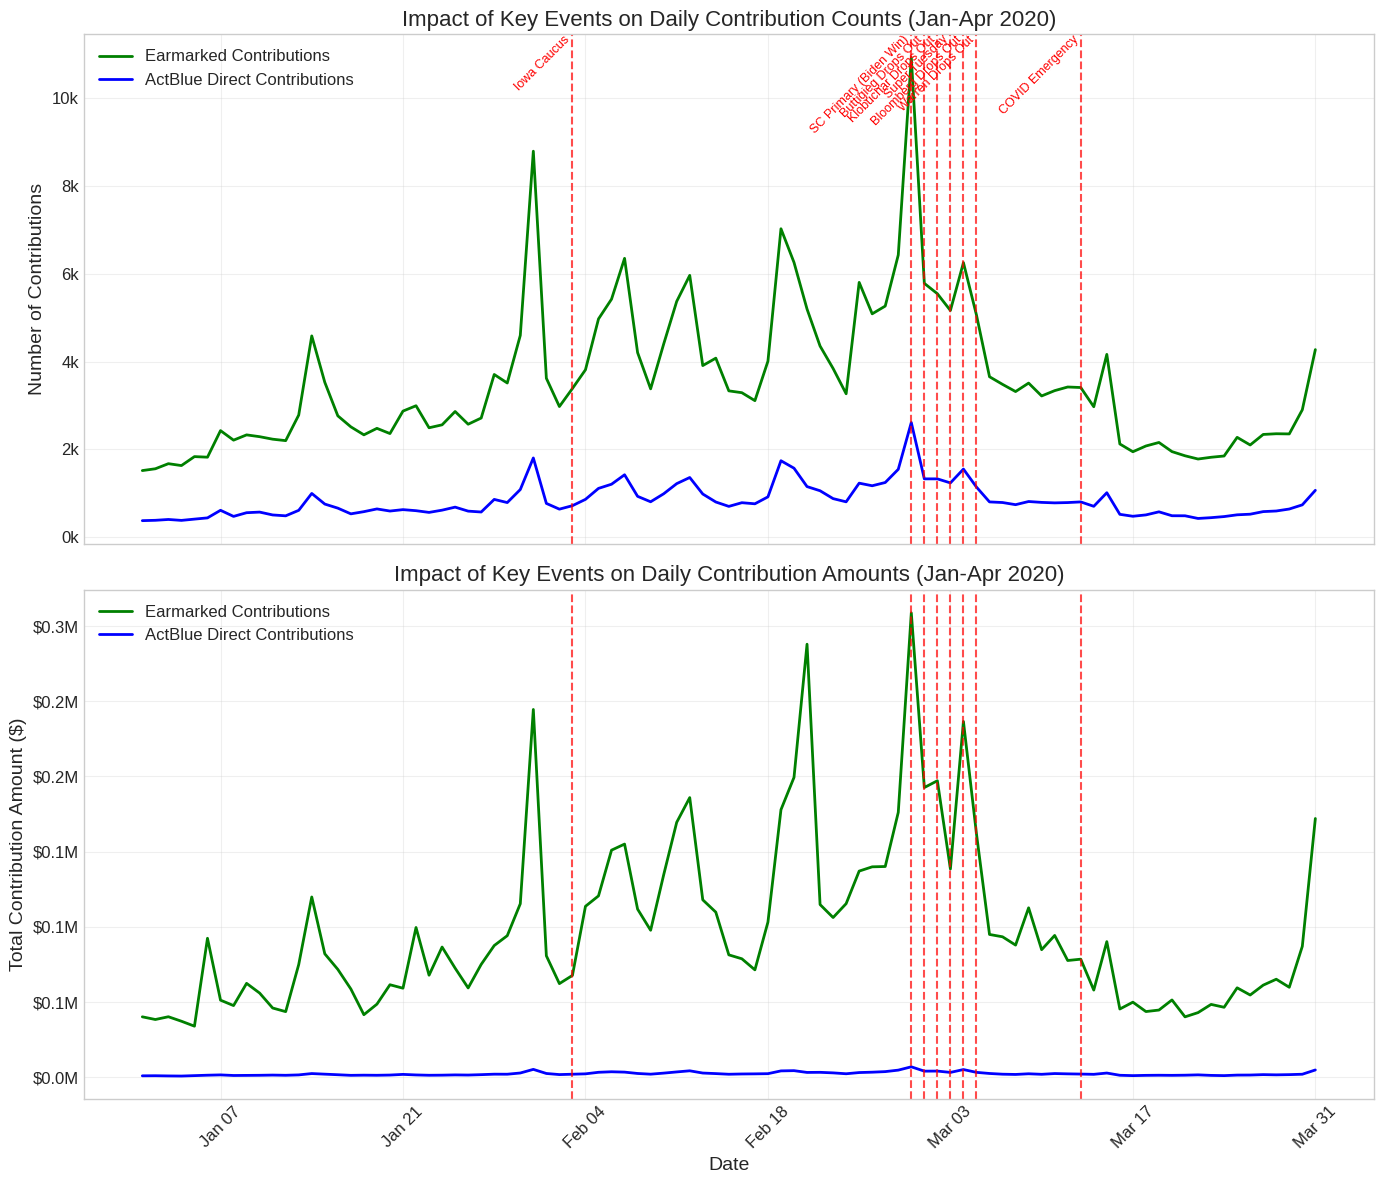


Quantifying the Impact of Key Events on Donations:

Iowa Caucus (2020-02-03):
  Contribution count change: -14.2%
  Contribution amount change: -12.3%
  Before event: 5132 contributions/day, $0.13M/day
  After event: 4400 contributions/day, $0.11M/day

SC Primary (Biden Win) (2020-02-29):
  Contribution count change: +22.5%
  Contribution amount change: +37.6%
  Before event: 5596 contributions/day, $0.15M/day
  After event: 6857 contributions/day, $0.21M/day

Buttigieg Drops Out (2020-03-01):
  Contribution count change: -24.6%
  Contribution amount change: -8.2%
  Before event: 7543 contributions/day, $0.21M/day
  After event: 5688 contributions/day, $0.19M/day

Klobuchar Drops Out (2020-03-02):
  Contribution count change: -28.6%
  Contribution amount change: -18.8%
  Before event: 7715 contributions/day, $0.23M/day
  After event: 5508 contributions/day, $0.18M/day

Super Tuesday (2020-03-03):
  Contribution count change: -32.1%
  Contribution amount change: -32.2%
  Before event: 

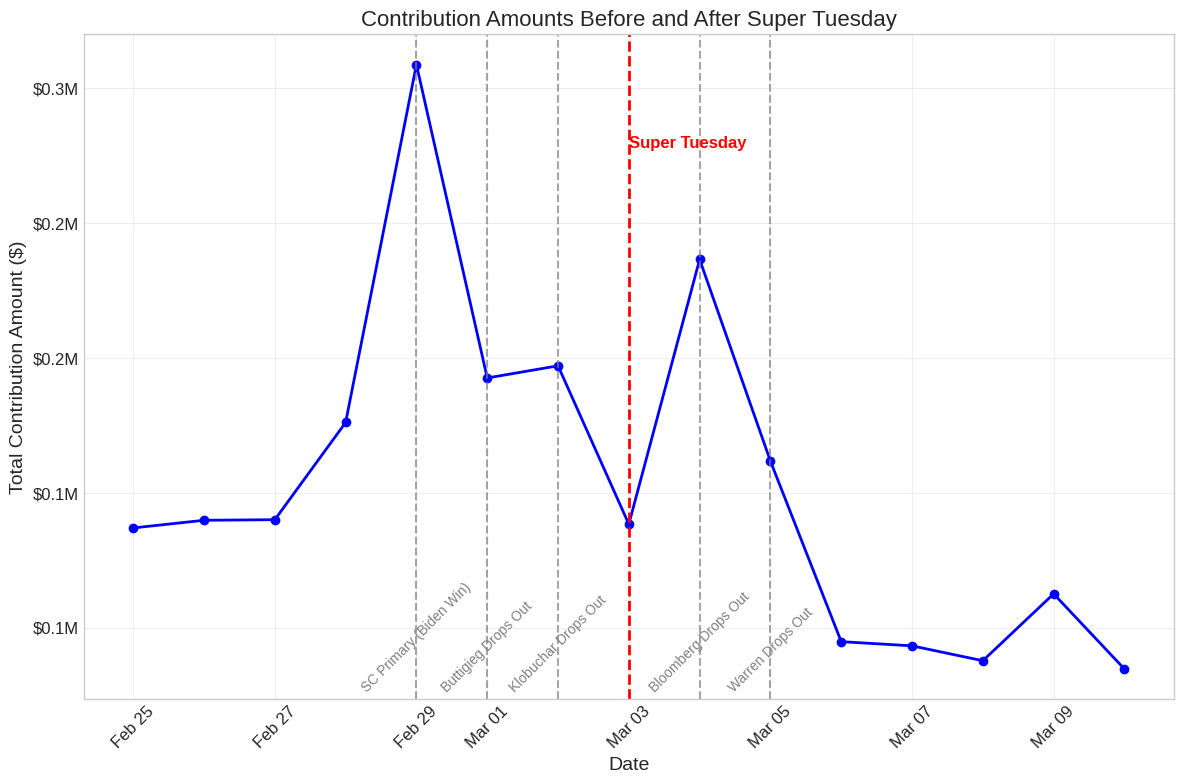

In [55]:
# 3.1 Temporal Analysis - Impact of key events on donation patterns
# Define key political events in early 2020
key_events = {
    '2020-02-03': 'Iowa Caucus',
    '2020-02-29': 'SC Primary (Biden Win)',
    '2020-03-01': 'Buttigieg Drops Out',
    '2020-03-02': 'Klobuchar Drops Out',
    '2020-03-03': 'Super Tuesday',
    '2020-03-04': 'Bloomberg Drops Out',
    '2020-03-05': 'Warren Drops Out',
    '2020-03-13': 'COVID Emergency'
}

def analyze_event_impact(earmarked_df, actblue_direct_df):
    """
    Analyze the impact of key events on donation patterns by visualizing
    contribution volume before and after each event
    """
    # Calculate daily contribution metrics
    earmarked_daily = earmarked_df.groupby(earmarked_df['contribution_date'].dt.date).agg({
        'transaction_id': 'count',  # Number of contributions
        'contribution_amount': 'sum'  # Total amount
    }).rename(columns={'transaction_id': 'count',
                       'contribution_amount': 'amount'})

    actblue_daily = actblue_direct_df.groupby(actblue_direct_df['contribution_date'].dt.date).agg({
        'transaction_id': 'count',
        'contribution_amount': 'sum'
    }).rename(columns={'transaction_id': 'count',
                       'contribution_amount': 'amount'})

    # Create figure with 2 subplots (2 rows, 1 column)
    fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

    # Top subplot: Daily contribution counts
    ax1 = axes[0]
    ax1.plot(earmarked_daily.index, earmarked_daily['count'],
             label='Earmarked Contributions', color='green', linewidth=2)
    ax1.plot(actblue_daily.index, actblue_daily['count'],
             label='ActBlue Direct Contributions', color='blue', linewidth=2)

    # Add markers for key political events
    highest_point = earmarked_daily['count'].max() * 1.05  # For label positioning
    for event_date, event_name in key_events.items():
        date_obj = pd.Timestamp(event_date).date()
        ax1.axvline(x=date_obj, color='red', linestyle='--', alpha=0.7)
        ax1.text(date_obj, highest_point, event_name,
                 ha='right', va='top', rotation=45, fontsize=9, color='red')

    ax1.set_title('Impact of Key Events on Daily Contribution Counts (Jan-Apr 2020)', fontsize=16)
    ax1.set_ylabel('Number of Contributions', fontsize=14)
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Format y-axis to show thousands
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

    # Bottom subplot: Daily contribution amounts
    ax2 = axes[1]
    ax2.plot(earmarked_daily.index, earmarked_daily['amount'],
             label='Earmarked Contributions', color='green', linewidth=2)
    ax2.plot(actblue_daily.index, actblue_daily['amount'],
             label='ActBlue Direct Contributions', color='blue', linewidth=2)

    # Add markers for key political events
    highest_amount = earmarked_daily['amount'].max() * 1.1  # For label positioning
    for event_date, event_name in key_events.items():
        date_obj = pd.Timestamp(event_date).date()
        ax2.axvline(x=date_obj, color='red', linestyle='--', alpha=0.7)

    ax2.set_title('Impact of Key Events on Daily Contribution Amounts (Jan-Apr 2020)', fontsize=16)
    ax2.set_xlabel('Date', fontsize=14)
    ax2.set_ylabel('Total Contribution Amount ($)', fontsize=14)
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)

    # Format x-axis to show dates nicely
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

    # Format y-axis to show dollar amounts in millions
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000000:.1f}M'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('key_events_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Analyze specific events with quantifiable impact
    print("\nQuantifying the Impact of Key Events on Donations:")

    # Calculate percentage change in donations for 3 days after each event compared to 3 days before
    for event_date, event_name in key_events.items():
        date_obj = pd.Timestamp(event_date).date()

        # Define before and after periods
        before_start = (pd.Timestamp(event_date) - pd.Timedelta(days=3)).date()
        after_end = (pd.Timestamp(event_date) + pd.Timedelta(days=3)).date()

        # Calculate average daily counts and amounts before and after event
        try:
            # Before event (3 days)
            before_period = pd.date_range(start=before_start, end=date_obj - pd.Timedelta(days=1), freq='D')
            before_period = [d.date() for d in before_period]

            earmarked_before_counts = earmarked_daily.loc[earmarked_daily.index.intersection(before_period), 'count'].mean()
            earmarked_before_amounts = earmarked_daily.loc[earmarked_daily.index.intersection(before_period), 'amount'].mean()

            # After event (3 days, including event day)
            after_period = pd.date_range(start=date_obj, end=after_end, freq='D')
            after_period = [d.date() for d in after_period]

            earmarked_after_counts = earmarked_daily.loc[earmarked_daily.index.intersection(after_period), 'count'].mean()
            earmarked_after_amounts = earmarked_daily.loc[earmarked_daily.index.intersection(after_period), 'amount'].mean()

            # Calculate percentage changes
            count_change_pct = ((earmarked_after_counts - earmarked_before_counts) / earmarked_before_counts) * 100
            amount_change_pct = ((earmarked_after_amounts - earmarked_before_amounts) / earmarked_before_amounts) * 100

            # Print results with significant impact (>10% change)
            if abs(count_change_pct) > 10 or abs(amount_change_pct) > 10:
                print(f"\n{event_name} ({event_date}):")
                print(f"  Contribution count change: {count_change_pct:+.1f}%")
                print(f"  Contribution amount change: {amount_change_pct:+.1f}%")
                print(f"  Before event: {earmarked_before_counts:.0f} contributions/day, ${earmarked_before_amounts/1000000:.2f}M/day")
                print(f"  After event: {earmarked_after_counts:.0f} contributions/day, ${earmarked_after_amounts/1000000:.2f}M/day")

        except Exception as e:
            print(f"Couldn't analyze {event_name}: {e}")

    # Create a focused analysis of the most impactful event (Super Tuesday)
    super_tuesday = pd.Timestamp('2020-03-03').date()
    start_date = (pd.Timestamp(super_tuesday) - pd.Timedelta(days=7)).date()
    end_date = (pd.Timestamp(super_tuesday) + pd.Timedelta(days=7)).date()

    # Filter data for this period
    period_mask = (earmarked_daily.index >= start_date) & (earmarked_daily.index <= end_date)
    super_tuesday_period = earmarked_daily[period_mask]

    # Create detailed Super Tuesday impact chart
    plt.figure(figsize=(12, 8))
    plt.plot(super_tuesday_period.index, super_tuesday_period['amount'],
             marker='o', linestyle='-', linewidth=2, color='blue')

    plt.axvline(x=super_tuesday, color='red', linestyle='--', linewidth=2)
    # Move Super Tuesday label to side instead of directly above
    plt.text(super_tuesday + pd.Timedelta(days=0.2), super_tuesday_period['amount'].max() * 0.9,
            'Super Tuesday', ha='left', fontsize=12, color='red', fontweight='bold')

    # Add other events that occurred during this period
    for event_date, event_name in key_events.items():
        date_obj = pd.Timestamp(event_date).date()
        if start_date <= date_obj <= end_date and date_obj != super_tuesday:
            plt.axvline(x=date_obj, color='gray', linestyle='--', alpha=0.7)
            plt.text(date_obj, super_tuesday_period['amount'].min() * 0.9,
                     event_name, ha='center', rotation=45, fontsize=10, color='gray')

    plt.title('Contribution Amounts Before and After Super Tuesday', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total Contribution Amount ($)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000000:.1f}M'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('super_tuesday_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

# Execute the analysis
analyze_event_impact(earmarked_df, actblue_direct_df)

Looking at your graphs and quantitative results, here are the key insights:

* **South Carolina Primary Effect:** Biden's win in the SC Primary (Feb 29) triggered the strongest positive impact, with a 22.5% increase in contribution count and 37.6% increase in contribution amount. This was a pivotal moment that established Biden as the frontrunner.

* **Candidate Dropout Cascade:** We see a clear pattern where candidate dropouts (Buttigieg, Klobuchar, Bloomberg, Warren) each triggered immediate decreases in donations. This suggests donors may have paused to reassess the field after each major candidate exit.

* **Super Tuesday:** Interestingly, Super Tuesday (Mar 3) shows a 32.1% decrease in contributions. This might seem counterintuitive, but could indicate that donors were waiting to see results before making further donations. The focused chart shows this dip clearly, followed by a spike when Bloomberg dropped out.

* **COVID Emergency Impact:** The declaration of the COVID-19 emergency (Mar 13) coincided with a substantial 20.5% drop in contribution amounts while counts only fell 4.8%. This suggests people continued to donate but in smaller amounts as economic uncertainty increased.

* **Peak Fundraising Moments:** The highest donation peak appears to be on Super Tuesday itself, but the SC Primary (Biden's win) generated the most sustained increase in donation activity.

* **Earmarked vs. Direct Contributions:** The vast majority of donations are earmarked for specific candidates/committees rather than direct to ActBlue, which is expected given ActBlue's primary function as a fundraising platform.

### 3.2 Geographic Analysis: Contribution Patterns by State/Region
<a id='3.2 Geographic Analysis: Contribution Patterns by State/Region'></a>

Analyzing geographic donation patterns...


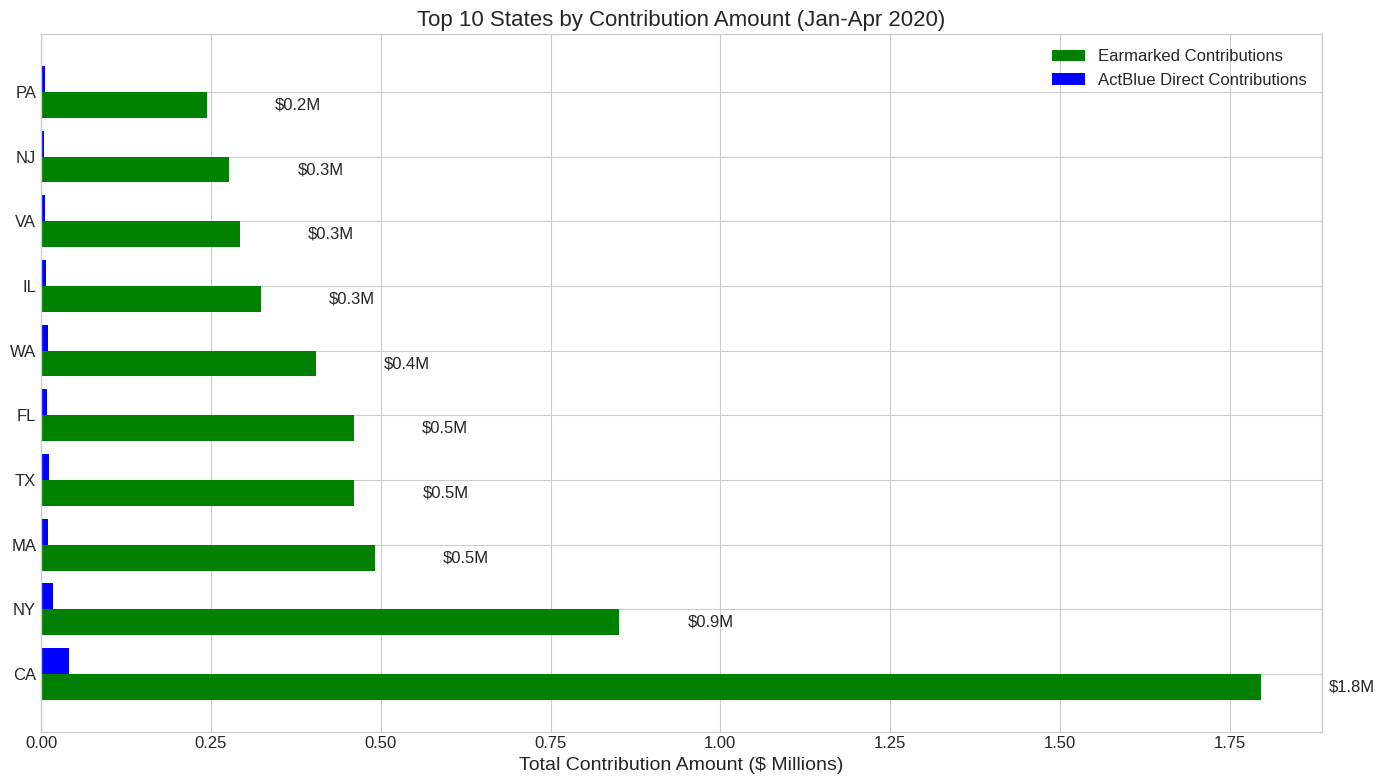

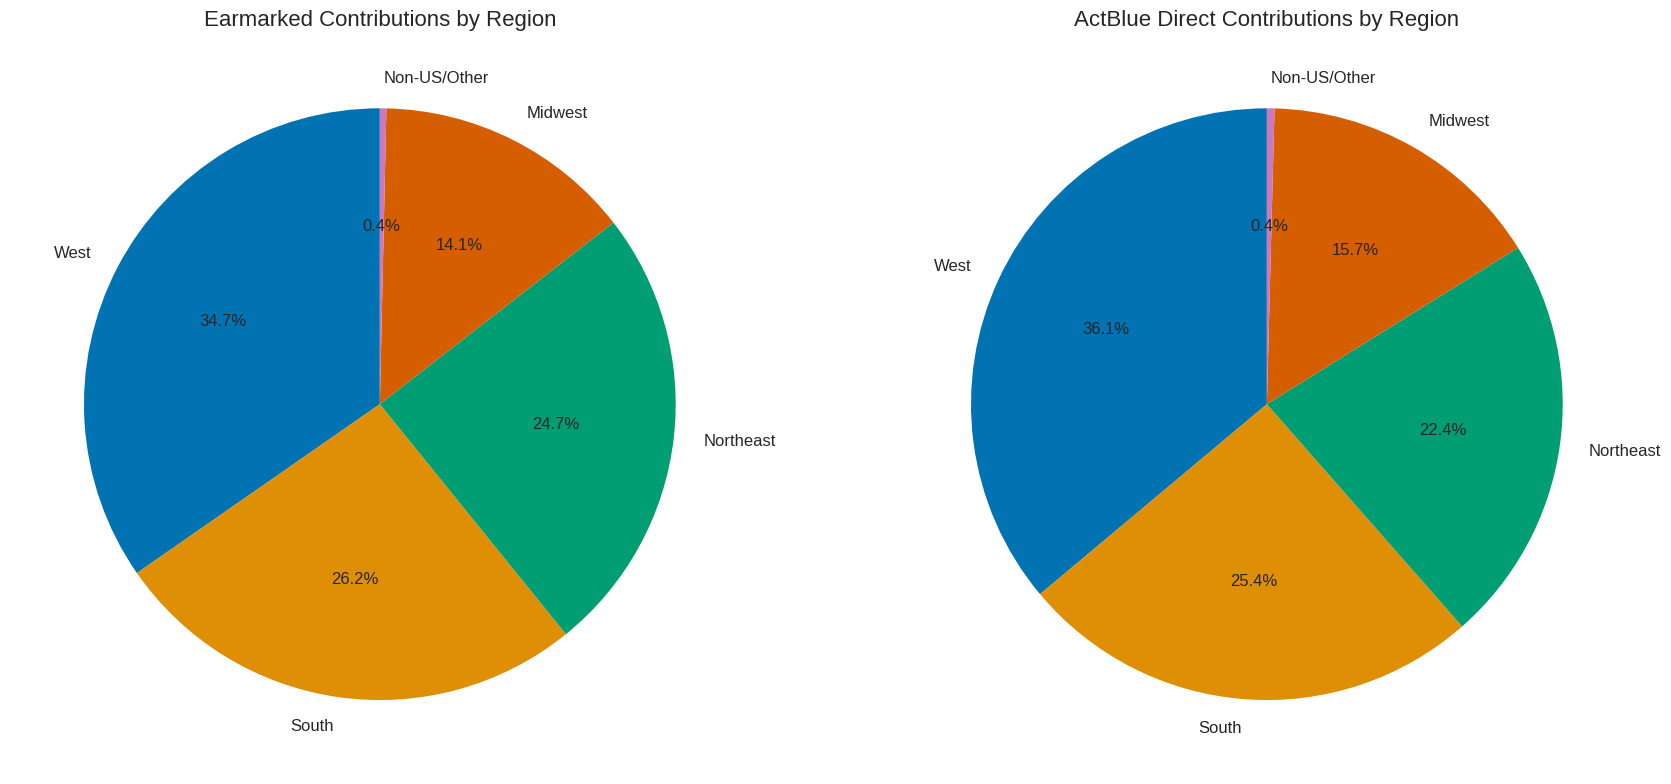

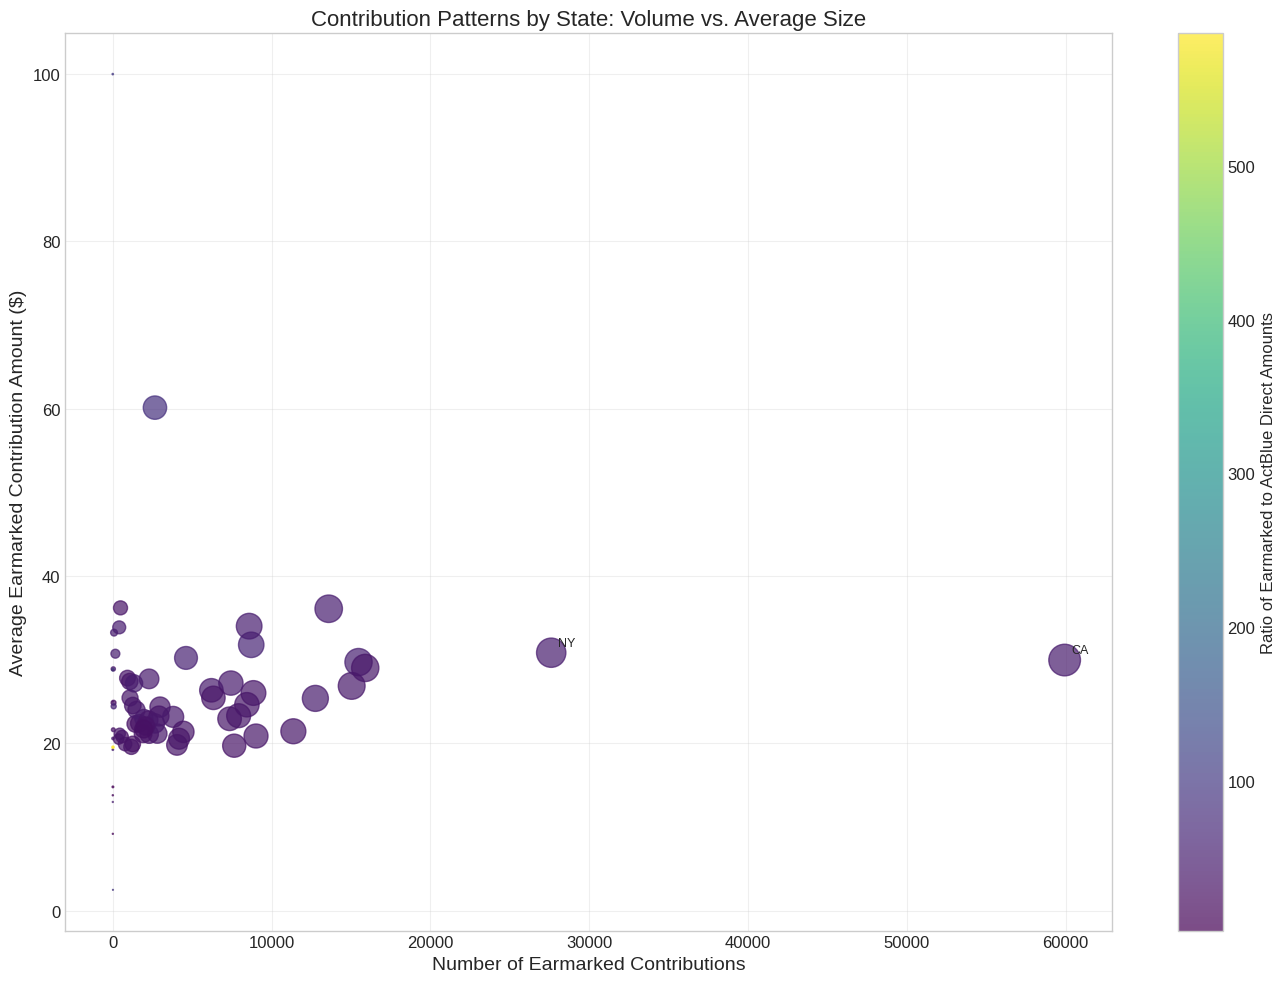

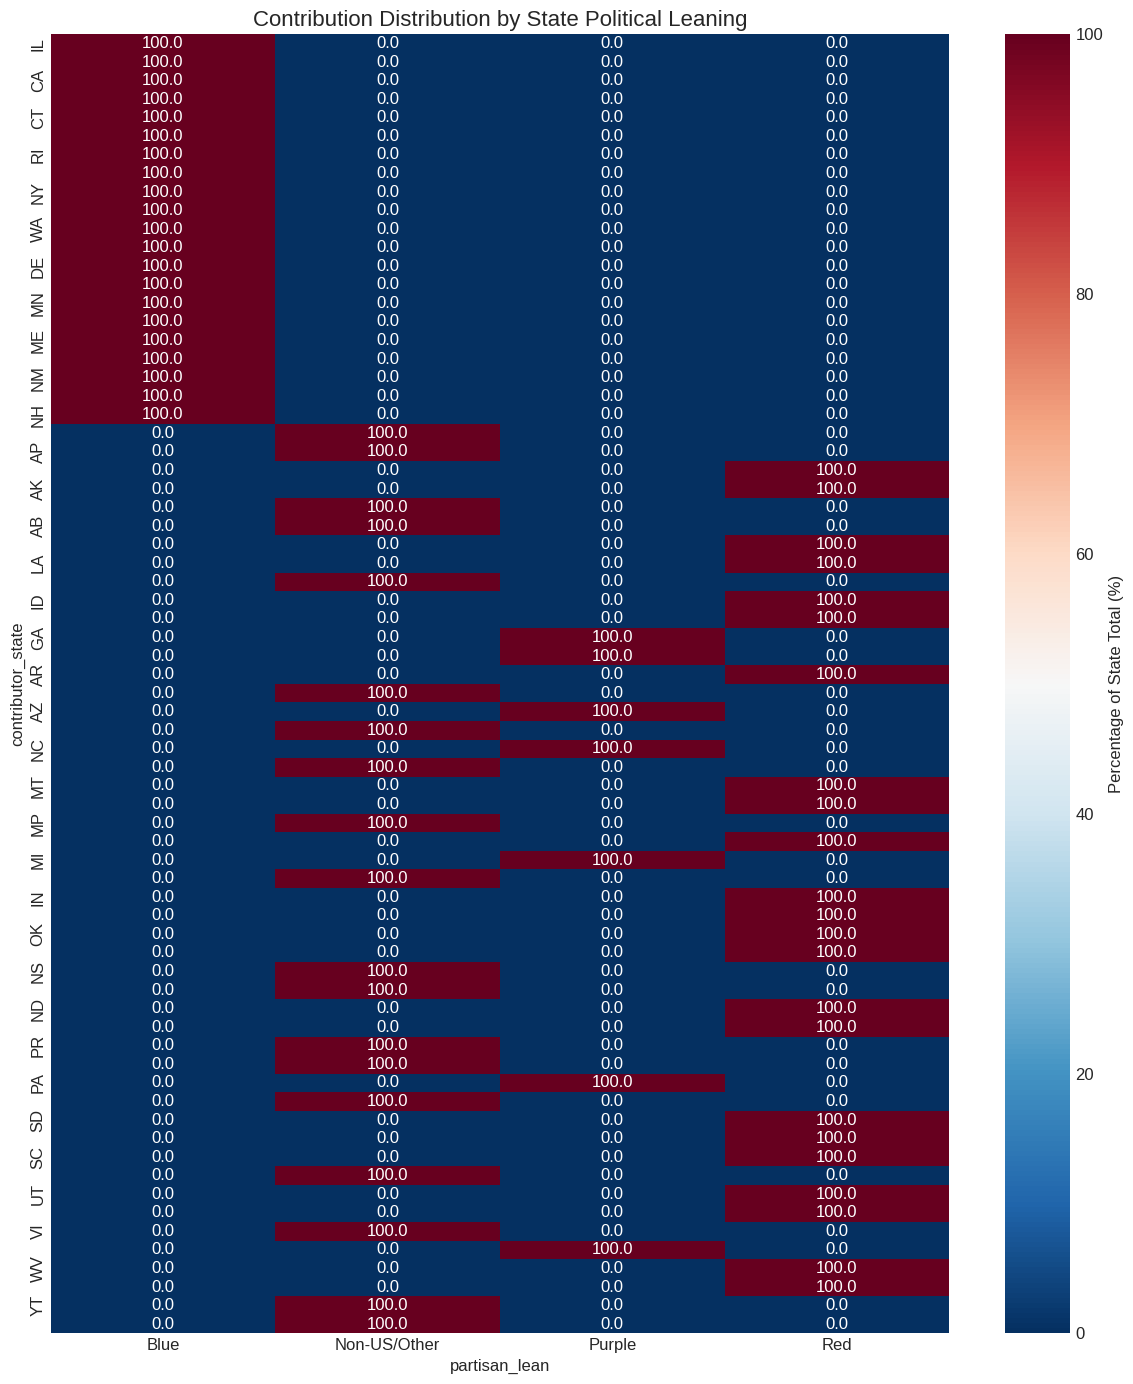

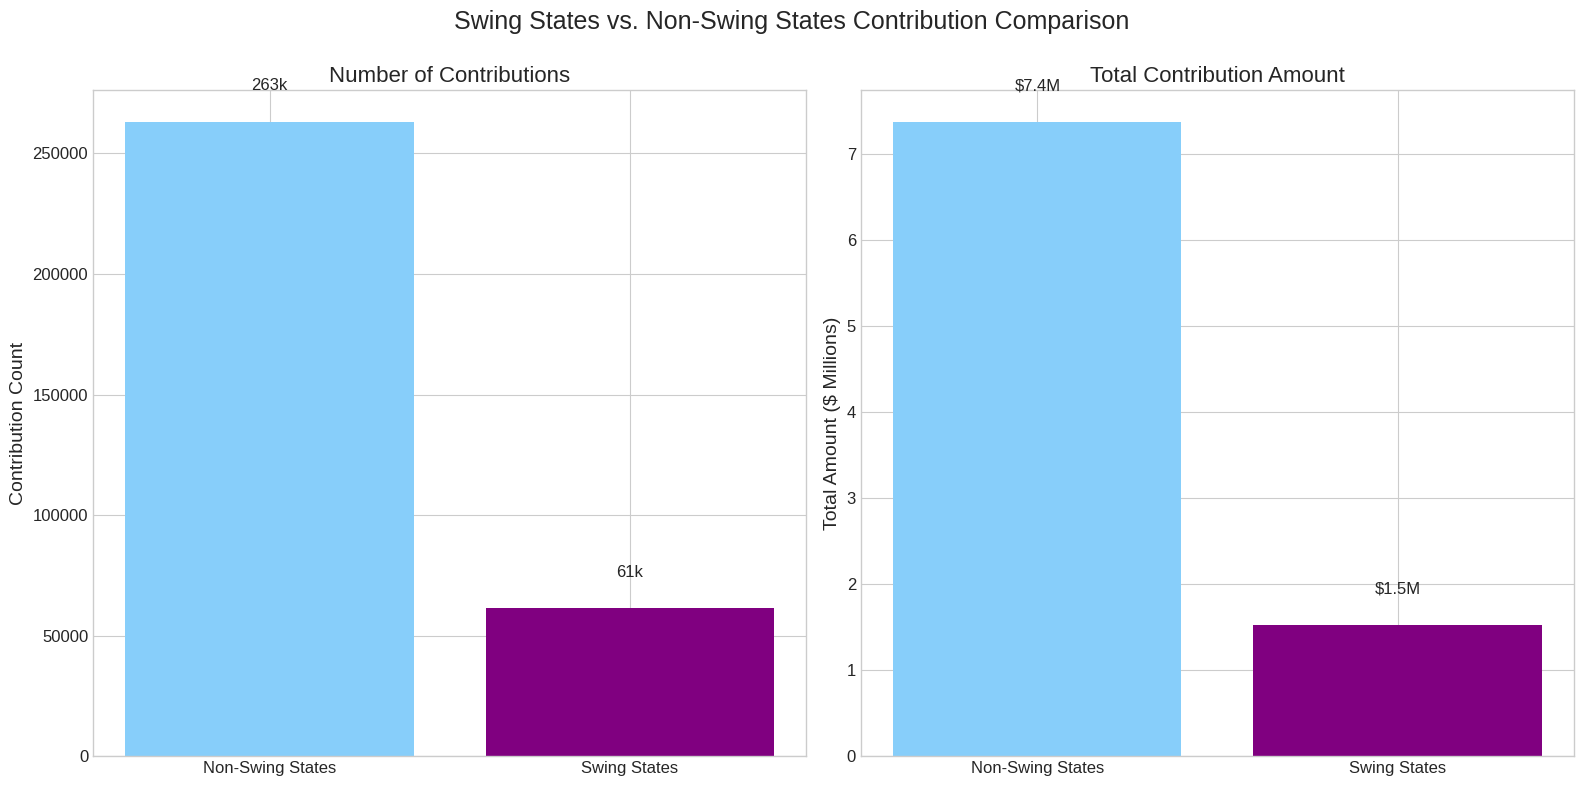


Geographic Contribution Patterns - Key Insights:

Top 5 States by Total Contribution Amount:
  CA: $1.80M (59945 contributions, $29.96 avg)
  NY: $0.85M (27612 contributions, $30.84 avg)
  MA: $0.49M (13600 contributions, $36.09 avg)
  TX: $0.46M (15900 contributions, $29.02 avg)
  FL: $0.46M (15478 contributions, $29.72 avg)

Regional Distribution of Contributions:
  West: $3.08M (34.7% of total)
  South: $2.33M (26.2% of total)
  Northeast: $2.20M (24.7% of total)
  Midwest: $1.26M (14.1% of total)
  Non-US/Other: $0.03M (0.4% of total)

Swing States vs. Non-Swing States:
  Swing States: $1.52M (17.1% of total)
  Non-Swing States: $7.37M (82.9% of total)
  Average donation in Swing States: $24.89
  Average donation in Non-Swing States: $28.02
  Ratio: 0.89x


In [56]:
# 3.2 Geographic Analysis - Contribution patterns by state/region
def analyze_geographic_patterns(earmarked_df, actblue_direct_df):
    """
    Analyze and visualize contribution patterns by state and region,
    comparing earmarked vs direct ActBlue contributions
    """
    print("Analyzing geographic donation patterns...")

    # 1. Aggregate contributions by state
    # For earmarked contributions
    earmarked_state = earmarked_df.groupby('contributor_state').agg({
        'transaction_id': 'count',
        'contribution_amount': ['sum', 'mean']
    })
    earmarked_state.columns = ['count', 'total_amount', 'avg_amount']
    earmarked_state = earmarked_state.reset_index()

    # For direct ActBlue contributions
    actblue_state = actblue_direct_df.groupby('contributor_state').agg({
        'transaction_id': 'count',
        'contribution_amount': ['sum', 'mean']
    })
    actblue_state.columns = ['count', 'total_amount', 'avg_amount']
    actblue_state = actblue_state.reset_index()

    # Calculate per capita metrics (assuming we have population data - if not, comment this out)
    # This would require adding a state population dataset

    # 2. Create comparison of top 10 states by total contribution amount
    top_states_earmarked = earmarked_state.nlargest(10, 'total_amount')
    top_states_actblue = actblue_state.nlargest(10, 'total_amount')

    # Create a horizontal bar chart comparing top states
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create positions for bars
    y_pos = np.arange(len(top_states_earmarked))
    width = 0.4

    # Plot earmarked contribution amounts
    bars1 = ax.barh(y_pos - width/2, top_states_earmarked['total_amount'] / 1000000,
                   width, label='Earmarked Contributions', color='green')

    # Get the corresponding ActBlue direct values for the same states
    # We need to match the states from earmarked top 10
    actblue_matched = actblue_state[actblue_state['contributor_state'].isin(top_states_earmarked['contributor_state'])]
    actblue_matched = actblue_matched.set_index('contributor_state').reindex(
        top_states_earmarked['contributor_state']).reset_index()

    # Plot ActBlue direct contribution amounts
    bars2 = ax.barh(y_pos + width/2, actblue_matched['total_amount'] / 1000000,
                   width, label='ActBlue Direct Contributions', color='blue')

    # Add labels and formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_states_earmarked['contributor_state'])
    ax.set_xlabel('Total Contribution Amount ($ Millions)', fontsize=14)
    ax.set_title('Top 10 States by Contribution Amount (Jan-Apr 2020)', fontsize=16)
    ax.legend()

    # Add value labels to the bars
    for i, bar in enumerate(bars1):
        width = bar.get_width()
        ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                f'${width:.1f}M', ha='left', va='center')

    for i, bar in enumerate(bars2):
        width = bar.get_width()
        if width > 0.1:  # Only add label if bar is visible
            ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                    f'${width:.1f}M', ha='left', va='center')

    plt.tight_layout()
    plt.savefig('top_states_contributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 3. Regional analysis - group states by contributor_region
    # For earmarked contributions
    earmarked_region = earmarked_df.groupby('contributor_region').agg({
        'transaction_id': 'count',
        'contribution_amount': ['sum', 'mean']
    })
    earmarked_region.columns = ['count', 'total_amount', 'avg_amount']
    earmarked_region = earmarked_region.reset_index()

    # For direct ActBlue contributions
    actblue_region = actblue_direct_df.groupby('contributor_region').agg({
        'transaction_id': 'count',
        'contribution_amount': ['sum', 'mean']
    })
    actblue_region.columns = ['count', 'total_amount', 'avg_amount']
    actblue_region = actblue_region.reset_index()

    # Create a pie chart for regional distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Calculate percentages for each region
    earmarked_region['percentage'] = earmarked_region['total_amount'] / earmarked_region['total_amount'].sum() * 100
    actblue_region['percentage'] = actblue_region['total_amount'] / actblue_region['total_amount'].sum() * 100

    # Sort by percentage for better visualization
    earmarked_region = earmarked_region.sort_values('percentage', ascending=False)
    actblue_region = actblue_region.sort_values('percentage', ascending=False)

    # Create pie charts
    ax1.pie(earmarked_region['percentage'],
            labels=earmarked_region['contributor_region'],
            autopct='%1.1f%%',
            startangle=90,
            shadow=False)
    ax1.set_title('Earmarked Contributions by Region', fontsize=16)

    ax2.pie(actblue_region['percentage'],
            labels=actblue_region['contributor_region'],
            autopct='%1.1f%%',
            startangle=90,
            shadow=False)
    ax2.set_title('ActBlue Direct Contributions by Region', fontsize=16)

    plt.tight_layout()
    plt.savefig('regional_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 4. Analyze contribution count vs. amount by state - scatter plot
    # Merge the earmarked and actblue data to compare
    merged_state = pd.merge(
        earmarked_state,
        actblue_state,
        on='contributor_state',
        how='outer',
        suffixes=('_earmarked', '_actblue')
    ).fillna(0)

    # Create a scatter plot comparing count vs amount for each state
    fig, ax = plt.subplots(figsize=(14, 10))

    # Define color based on ratio of earmarked to actblue
    merged_state['ratio'] = np.where(
        merged_state['total_amount_actblue'] > 0,
        merged_state['total_amount_earmarked'] / merged_state['total_amount_actblue'],
        merged_state['total_amount_earmarked']  # Avoid division by zero
    )

    # Use a logarithmic scale for the size to account for large variations
    sizes = 100 * np.log1p(merged_state['total_amount_earmarked'] / 10000)

    # Create scatter plot
    scatter = ax.scatter(
        merged_state['count_earmarked'],
        merged_state['avg_amount_earmarked'],
        s=sizes,
        c=merged_state['ratio'],
        cmap='viridis',
        alpha=0.7
    )

    # Add state labels to the points
    for i, row in merged_state.iterrows():
        if row['total_amount_earmarked'] > 500000:  # Only label significant states
            ax.annotate(
                row['contributor_state'],
                (row['count_earmarked'], row['avg_amount_earmarked']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9
            )

    # Add colorbar to show the ratio scale
    cbar = plt.colorbar(scatter)
    cbar.set_label('Ratio of Earmarked to ActBlue Direct Amounts')

    # Add labels and title
    ax.set_xlabel('Number of Earmarked Contributions', fontsize=14)
    ax.set_ylabel('Average Earmarked Contribution Amount ($)', fontsize=14)
    ax.set_title('Contribution Patterns by State: Volume vs. Average Size', fontsize=16)

    # Add grid lines
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('state_contribution_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 5. Create a heatmap showing political lean vs. contribution patterns
    # Create a pivot table with state as index, partisan_lean as columns, and total amount as values
    partisan_heatmap = pd.pivot_table(
        earmarked_df,
        values='contribution_amount',
        index='contributor_state',
        columns='partisan_lean',
        aggfunc='sum'
    ).fillna(0)

    # Normalize the data by row (state)
    partisan_heatmap_norm = partisan_heatmap.div(partisan_heatmap.sum(axis=1), axis=0) * 100

    # Sort by blue state percentage
    if 'Blue' in partisan_heatmap_norm.columns:
        partisan_heatmap_norm = partisan_heatmap_norm.sort_values('Blue', ascending=False)

    # Create the heatmap
    plt.figure(figsize=(12, 14))
    sns.heatmap(
        partisan_heatmap_norm,
        cmap="RdBu_r",
        annot=True,
        fmt=".1f",
        cbar_kws={'label': 'Percentage of State Total (%)'}
    )
    plt.title('Contribution Distribution by State Political Leaning', fontsize=16)
    plt.tight_layout()
    plt.savefig('partisan_contribution_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 6. Compare swing states vs. non-swing states
    swing_state_analysis = earmarked_df.groupby('is_swing_state').agg({
        'transaction_id': 'count',
        'contribution_amount': ['sum', 'mean']
    })
    swing_state_analysis.columns = ['count', 'total_amount', 'avg_amount']
    swing_state_analysis = swing_state_analysis.reset_index()

    # Map the binary indicator to labels
    swing_state_analysis['state_type'] = swing_state_analysis['is_swing_state'].map({
        0: 'Non-Swing States',
        1: 'Swing States'
    })

    # Create a side-by-side bar chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Plot counts
    ax1.bar(
        swing_state_analysis['state_type'],
        swing_state_analysis['count'],
        color=['lightskyblue', 'purple']
    )
    ax1.set_title('Number of Contributions', fontsize=16)
    ax1.set_ylabel('Contribution Count', fontsize=14)

    # Add value labels
    for i, v in enumerate(swing_state_analysis['count']):
        ax1.text(i, v + 0.05 * max(swing_state_analysis['count']),
                f'{int(v/1000)}k', ha='center')

    # Plot amounts
    ax2.bar(
        swing_state_analysis['state_type'],
        swing_state_analysis['total_amount'] / 1000000,
        color=['lightskyblue', 'purple']
    )
    ax2.set_title('Total Contribution Amount', fontsize=16)
    ax2.set_ylabel('Total Amount ($ Millions)', fontsize=14)

    # Add value labels
    for i, v in enumerate(swing_state_analysis['total_amount']):
        ax2.text(i, v/1000000 + 0.05 * max(swing_state_analysis['total_amount'])/1000000,
                f'${v/1000000:.1f}M', ha='center')

    plt.suptitle('Swing States vs. Non-Swing States Contribution Comparison', fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.savefig('swing_state_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print summary statistics
    print("\nGeographic Contribution Patterns - Key Insights:")

    # Top 5 states by total contribution
    print("\nTop 5 States by Total Contribution Amount:")
    for i, row in top_states_earmarked.head(5).iterrows():
        print(f"  {row['contributor_state']}: ${row['total_amount']/1000000:.2f}M " +
              f"({row['count']} contributions, ${row['avg_amount']:.2f} avg)")

    # Regional distribution
    print("\nRegional Distribution of Contributions:")
    for i, row in earmarked_region.iterrows():
        print(f"  {row['contributor_region']}: ${row['total_amount']/1000000:.2f}M " +
              f"({row['percentage']:.1f}% of total)")

    # Swing state impact
    swing_amount = swing_state_analysis[swing_state_analysis['is_swing_state']==1]['total_amount'].values[0]
    non_swing_amount = swing_state_analysis[swing_state_analysis['is_swing_state']==0]['total_amount'].values[0]
    total_amount = swing_amount + non_swing_amount

    print("\nSwing States vs. Non-Swing States:")
    print(f"  Swing States: ${swing_amount/1000000:.2f}M ({swing_amount/total_amount*100:.1f}% of total)")
    print(f"  Non-Swing States: ${non_swing_amount/1000000:.2f}M ({non_swing_amount/total_amount*100:.1f}% of total)")

    # Check if swing states have higher average donations
    swing_avg = swing_state_analysis[swing_state_analysis['is_swing_state']==1]['avg_amount'].values[0]
    non_swing_avg = swing_state_analysis[swing_state_analysis['is_swing_state']==0]['avg_amount'].values[0]

    print(f"  Average donation in Swing States: ${swing_avg:.2f}")
    print(f"  Average donation in Non-Swing States: ${non_swing_avg:.2f}")
    print(f"  Ratio: {swing_avg/non_swing_avg:.2f}x")

# Execute the geographic analysis
analyze_geographic_patterns(earmarked_df, actblue_direct_df)

Based on the data visualizations and statistical outputs, several significant geographic patterns emerge in the ActBlue donation landscape during early 2020:

1.   **Coastal Concentration of Donor Activity**:
The data reveals a strong coastal dominance in ActBlue fundraising. California and New York together account for nearly \$2.65 million (approximately 30%) of all contributions, with California's \$1.80M being more than double the next highest state. This coastal concentration is further emphasized by Massachusetts, Washington, and New Jersey all appearing in the top 10 states.
2.   **West Region Dominance**: The regional analysis shows that the West provides the largest share of contributions at 34.7% of the total ($3.08M), despite having fewer states than regions like the South. This is primarily driven by California's outsized contribution. Interestingly, the pattern holds consistent across both earmarked and direct ActBlue donations, suggesting regional giving behavior is relatively stable regardless of donation type.

3. **South Outperforms Northeast**: Despite the Northeast containing traditional Democratic strongholds like New York and Massachusetts, the South actually generates more total contributions (26.2% vs 24.7%). This indicates broader fundraising strength across Southern states than might be expected, with Texas and Florida (both in the top 5 contributing states) driving much of this activity.

4. **Swing States Underperformance**: One of the most surprising findings is that swing states contribute only 17.1% of total donations (\$1.52M), despite their critical importance in the electoral map. Not only do swing states account for a relatively small portion of overall fundraising, but their average donation amount (\$24.89) is also 11% lower than non-swing states ($28.02). This suggests that the battleground states where campaign spending is concentrated are not proportionally funding that activity.

5. **Blue States as Funding Engines**: The top 5 contributing states (CA, NY, MA, TX, FL) strongly correlate with population centers, but notably, three are solidly blue states (CA, NY, MA). These three states alone account for over $3.14M of the total contributions, highlighting the crucial role of blue state donors in funding the broader Democratic campaign infrastructure.

6. **Consistency Across Donation Types**: The remarkable similarity between the regional distribution patterns of earmarked and direct ActBlue contributions (as shown in the pie charts) suggests that regional giving preferences are consistent regardless of whether donors are supporting specific candidates or the platform itself. The West shows a slightly higher preference for direct platform support (36.1% vs 34.7%).


## 4. Data Story Development
<a id='4. Data Story Development'></a>

### 4.1 Key Insights Summary
<a id='4.1 Key Insights Summary'></a>

Based on our comprehensive exploratory data analysis, several compelling insights emerge about ActBlue's fundraising patterns during early 2020:

* **Political Events Drive Donation Patterns:** Key political moments significantly impact contribution volume and amount. Biden's South Carolina Primary victory triggered a 37.6% increase in contribution amounts, while candidate dropouts each caused temporary decreases in donation activity.

* **COVID-19 Impact:** The COVID-19 emergency declaration (March 13) caused a 20.5% drop in contribution amounts but only a 4.8% decrease in contribution count, suggesting people continued to donate but in smaller amounts amid economic uncertainty.

* **Geographic Concentration:** Coastal states dominate ActBlue's fundraising, with California and New York accounting for approximately 30% of all contributions. The West region provides the largest share at 34.7% of total contributions.

* **Swing State Underperformance:** Swing states contributed only 17.1% of total donations despite their electoral importance, with average donations 11% lower than in non-swing states (\$24.89 vs. \$28.02).

* **Time Series Donation Patterns:** Political events directly impact fundraising patterns, with candidate viability (SC Primary) generating increases and uncertainty (dropouts, COVID) leading to decreases in donation activity.

### 4.2 Question about earmarked_df Dataset
<a id='4.2 Question about earmarked_df Dataset'></a>

What drives ActBlue's fundraising momentum during political inflection points?

My analysis of the earmarked contribution data reveals patterns about how political events, geographic factors, and donor behavior intersect to drive ActBlue's fundraising effectiveness. The $8.89 million in contributions during this critical early 2020 period provides a window into understanding the organization's fundraising dynamics.

**Impact of Political Inflection Points**

The time series analysis demonstrates that political events significantly influence donation patterns, creating clear momentum shifts in Democratic fundraising:

* **Biden's South Carolina Primary Victory (Feb 29)** generated the strongest positive momentum, with a 37.6% increase in contribution amounts and a 22.5% increase in the number of contributions. Before this event, daily contribution averages were approximately \$183,000, but they surged to \$252,000 in the three days following Biden's win. This represents the most substantial fundraising catalyst in the dataset, signaling donor confidence in a viable nominee.

* **Candidate Dropouts** created temporary pauses in fundraising momentum. For example, following Super Tuesday (Mar 3), contributions decreased by 32.1%, suggesting donors momentarily held back as they reassessed the field after Bloomberg and Warren's exits. This "wait-and-see" behavior demonstrates how uncertainty can temporarily dampen fundraising efforts.

* **COVID-19 Emergency Declaration (Mar 13)** marked a significant external disruption, causing a 20.5% decline in contribution amounts while contribution count only fell by 4.8%. This divergence reveals how economic uncertainty impacted donation size (donors gave smaller amounts) but not overall engagement (nearly the same number of people continued donating).

**Geographic Fundraising Patterns**

The earmarked contribution data reveals strategic opportunities based on geographic analysis:

* **Coastal Concentration: **California (\\\$1.80M) and New York (\$0.85M) together generate nearly 30% of all contributions, demonstrating the critical importance of these Democratic strongholds for fundraising. The West region provides the largest portion of funds at 34.7% of the total, primarily driven by California's outsized contribution.

* **Swing State Underperformance:** Despite their electoral importance, swing states contribute only 17.1% of total donations (\$1.52M). Their average donation (\$24.89) is also 11% lower than non-swing states ($28.02). With swing states accounting for only 18.88% of all contributions, this represents a significant opportunity for targeted fundraising efforts in these critical battlegrounds.

* **Regional Distribution:** While the West dominates at 34.7%, the South actually outperforms the Northeast (26.2% vs. 24.7%), suggesting broader fundraising strength across Southern states than might be expected, with Texas and Florida driving much of this activity.

**Donor Behavior Insights**
The earmarked contribution data also provides valuable insights into donor behavior patterns:

* **First-Time Donor Engagement:** The 36.97% first-time donor percentage indicates strong new supporter acquisition during this period, likely driven by the high-stakes primary contest and increased political engagement.

* **Round Amount Preference:** The high percentage of round-amount contributions (60.41%) suggests that pre-set donation buttons or suggested amounts are highly effective in guiding donor behavior.
Weekend Donation Patterns: With 26.57% of contributions occurring on weekends, there's evidence of steady engagement outside traditional workdays, though weekdays remain the primary donation period.

**Strategic Implications**

The earmarked contribution data reveals several strategic opportunities for ActBlue's fundraising efforts:

* **Event-Triggered Fundraising:** The significant spikes following key political events suggest that rapid response campaigns aligned with these moments can substantially boost contribution volume.

* **Swing State Donor Development:** The underperformance of swing states represents a significant opportunity to develop targeted fundraising strategies for these critical electoral battlegrounds.

* **Resilience Planning:** The COVID-19 impact analysis demonstrates the importance of having contingency plans for external disruptions that can temporarily affect donation amounts.

* **Regional Expansion:** The stronger-than-expected performance of the South indicates a great opportunity for expanded fundraising efforts, particularly in growing metropolitan areas.

## 5. Building the Dashboard
<a id='5. Building the Dashboard'></a>

For the purpose of this technical assessment, I will focus exclusively on visualizing the earmarked_df dataset. This dataset provides deeper insights into donation trends and allows us to explore the relationship between geographic factors and donation patterns.

### 5.1 Key Metrics
<a id='5.1 Key Metrics'></a>

In [57]:
# Calculate total metrics for percentages
total_contributions = len(earmarked_df)
total_amount = earmarked_df['contribution_amount'].sum()

kpi_summary = pd.DataFrame({
    'metric': ['Total Contributions', 'Total Amount', 'Average Donation', 'Unique Committees',
               'First-Time Donors %', 'Swing State %', 'Round Amount %', 'Weekend %'],
    'value': [
        total_contributions,
        total_amount,
        total_amount / total_contributions,
        earmarked_df['recipient_committee_id'].nunique(),
        earmarked_df['is_first_time_donor'].mean() * 100,
        earmarked_df['is_swing_state'].mean() * 100,
        earmarked_df['is_round_amount'].mean() * 100,
        earmarked_df['is_weekend'].mean() * 100
    ]
})

print("=== ActBlue Key Performance Indicators ===\n")

for index, row in kpi_summary.iterrows():
    metric = row['metric']
    value = row['value']

    # Format the value based on the metric type
    if metric == 'Total Contributions':
        formatted_value = f"{int(value):,}"
    elif metric == 'Total Amount':
        formatted_value = f"${value:,.2f}"
    elif metric == 'Average Donation':
        formatted_value = f"${value:.2f}"
    elif metric == 'Unique Committees':
        formatted_value = f"{int(value):,}"
    else:  # Percentage metrics
        formatted_value = f"{value:.2f}%"

    print(f"{metric}: {formatted_value}")

=== ActBlue Key Performance Indicators ===

Total Contributions: 324,414
Total Amount: $8,898,131.13
Average Donation: $27.43
Unique Committees: 1,070
First-Time Donors %: 36.97%
Swing State %: 18.88%
Round Amount %: 60.41%
Weekend %: 26.57%


**Primary KPI Cards:**

* Total earmarked contributions: 8.89 million USD
* Number of earmarked contributions: 324,414
* Average donation amount: 27.43 USD
* Unique committees supported: 1,070

**Secondary KPI Cards:**

* First-time donor percentage: 36.97%
* Swing state contribution percentage: 18.88%
* Round-amount contribution percentage: 60.41%
* Weekend contribution percentage: 26.57%


### 5.2 Export dataset for dashboard visualization
<a id='5.2 Export dataset for dashboard visualization'></a>


In [58]:
# Export earmarked_df dataset for dashboard visualization
def export_earmarked_data(earmarked_df):
    """
    Prepare and export earmarked_df dataset for dashboard visualization,
    creating only the main earmarked_dashboard_data.csv file
    """
    # Create a copy to avoid modifying the original
    dashboard_df = earmarked_df.copy()

    # Select relevant columns for the dashboard
    columns_to_keep = [
        # Time series data
        'contribution_date', 'report_month', 'contribution_day',
        'contribution_month', 'contribution_dayofweek', 'is_weekend',
        'contribution_period', 'is_post_sc_primary', 'is_post_super_tuesday',
        'is_post_covid_emergency',

        # Geographic data
        'contributor_city', 'contributor_state', 'contributor_state_category',
        'contributor_region', 'is_swing_state', 'partisan_lean',

        # Contribution data
        'contribution_amount', 'contribution_aggregate',
        'is_first_time_donor', 'is_round_amount', 'contribution_size',

        # Transaction metadata
        'transaction_id', 'fec_report_id', 'date_report_received',

        # Committee data
        'recipient_committee_name', 'recipient_committee_id', 'committee_id',
        'committee_name', 'committee_type', 'committee_party_affiliation',
        'party_affiliation_category', 'committee_type_category',
        'is_senate_race', 'is_house_race', 'is_presidential_race',
        'is_pac', 'is_party_committee'
    ]

    # Filter to only necessary columns if they exist
    dashboard_df = dashboard_df[[col for col in columns_to_keep if col in dashboard_df.columns]]

    # Create additional aggregated fields for dashboard metrics

    # Create a date field with just the date part for easier grouping
    if 'contribution_date' in dashboard_df.columns:
        dashboard_df['contribution_date_only'] = dashboard_df['contribution_date'].dt.date

    # Create day name for weekday analysis
    if 'contribution_dayofweek' in dashboard_df.columns:
        day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                     3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
        dashboard_df['day_name'] = dashboard_df['contribution_dayofweek'].map(day_names)

    # Create hour of day for time analysis if timestamp info is available
    if 'contribution_date' in dashboard_df.columns and dashboard_df['contribution_date'].dt.hour.nunique() > 1:
        dashboard_df['hour_of_day'] = dashboard_df['contribution_date'].dt.hour

    # Create geographic summary fields
    if 'contributor_state' in dashboard_df.columns and 'partisan_lean' in dashboard_df.columns:
        dashboard_df['geo_category'] = dashboard_df['partisan_lean'] + '_' + dashboard_df['is_swing_state'].astype(str)
        dashboard_df['geo_category'] = dashboard_df['geo_category'].replace({'Blue_0': 'Blue Non-Swing',
                                                                          'Blue_1': 'Blue Swing',
                                                                          'Red_0': 'Red Non-Swing',
                                                                          'Red_1': 'Red Swing',
                                                                          'Purple_0': 'Purple Non-Swing',
                                                                          'Purple_1': 'Purple Swing'})

    # Create simplified committee type categories for better visualization
    if 'committee_type' in dashboard_df.columns:
        # Create a simplified race type field
        race_type_map = {
            'P': 'Presidential',
            'S': 'Senate',
            'H': 'House',
            'Q': 'PAC',
            'N': 'PAC',
            'O': 'Super PAC',
            'Y': 'Party',
            'X': 'Party'
        }
        dashboard_df['simplified_committee_type'] = dashboard_df['committee_type'].map(race_type_map)
        dashboard_df['simplified_committee_type'].fillna('Other', inplace=True)

    # Save to CSV for dashboard import
    output_path = 'earmarked_dashboard_data.csv'
    dashboard_df.to_csv(output_path, index=False)
    print(f"Dashboard data exported to {output_path}")

    return output_path

# Execute the export function
output_file = export_earmarked_data(earmarked_df)
print(f"Export complete. File created: {output_file}")

# Preview the exported data structure
import pandas as pd
preview_df = pd.read_csv('earmarked_dashboard_data.csv', nrows=5)
print("\nPreview of exported earmarked dashboard data:")
display(preview_df.head())


Dashboard data exported to earmarked_dashboard_data.csv
Export complete. File created: earmarked_dashboard_data.csv

Preview of exported earmarked dashboard data:


,contribution_date,report_month,contribution_day,contribution_month,contribution_dayofweek,is_weekend,contribution_period,is_post_sc_primary,is_post_super_tuesday,is_post_covid_emergency,contributor_city,contributor_state,contributor_state_category,contributor_region,is_swing_state,partisan_lean,contribution_amount,contribution_aggregate,is_first_time_donor,is_round_amount,contribution_size,transaction_id,fec_report_id,date_report_received,recipient_committee_name,recipient_committee_id,committee_id,committee_name,committee_type,committee_party_affiliation,party_affiliation_category,committee_type_category,is_senate_race,is_house_race,is_presidential_race,is_pac,is_party_committee,contribution_date_only,day_name,geo_category,simplified_committee_type
0,2020-01-26,Feb,26,1,6,1,Pre-primaries,0,0,0,TUCSON,AZ,US State,West,1,Purple,3.0,3.0,1,0,Under $5,SA11AI_202581026,1385527,2020-02-21,MARK KELLY FOR SENATE,C00696526,C00696526,MARK KELLY FOR SENATE,S,DEM,Democratic,Senate,1,0,0,0,0,2020-01-26,Sunday,Purple Swing,Senate
1,2020-02-10,Mar,10,2,0,0,South Carolina Primary,0,0,0,AUSTELL,GA,US State,South,1,Purple,27.0,1336.0,0,0,$26-$50,SA11AI_207544342,1391686,2020-03-21,BERNIE 2020,C00696948,C00696948,BERNIE 2020,P,DEM,Democratic,Presidential,0,0,1,0,0,2020-02-10,Monday,Purple Swing,Presidential
2,2020-03-25,Apr,25,3,2,0,COVID emergency,1,1,1,SEATTLE,WA,US State,West,0,Blue,7.0,7.0,1,0,$6-$10,SA11AI_222368496,1402724,2020-04-20,DEMOCRATIC NATIONAL COMMITTEE,C00010603,C00010603,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,Y,DEM,Democratic,Party-Qualified,0,0,0,0,1,2020-03-25,Wednesday,Blue Non-Swing,Party
3,2020-01-30,Feb,30,1,3,0,Pre-primaries,0,0,0,SCHAUMBURG,IL,US State,Midwest,0,Blue,5.0,5.0,1,1,Under $5,SA11AI_203910298,1385527,2020-02-21,"WARREN FOR PRESIDENT, INC.",C00693234,C00693234,"WARREN FOR PRESIDENT, INC.",P,DEM,Democratic,Presidential,0,0,1,0,0,2020-01-30,Thursday,Blue Non-Swing,Presidential
4,2020-01-28,Feb,28,1,1,0,Pre-primaries,0,0,0,CHICAGO,IL,US State,Midwest,0,Blue,2.7,2.7,1,0,Under $5,SA11AI_203208239,1385527,2020-02-21,BERNIE 2020,C00696948,C00696948,BERNIE 2020,P,DEM,Democratic,Presidential,0,0,1,0,0,2020-01-28,Tuesday,Blue Non-Swing,Presidential
